In [1]:
working_dir = '/workspace/cell/scPermut_Antoine/'
fig_dir = '/workspace/cell/scPermut_Antoine//analysis_notebooks/figures_review/'

In [2]:
import sys
sys.path.append(working_dir)

In [3]:
import scmusketeers
from notebook_tools import *

/data/scmusk_workflow/scPermut_Antoine/analysis_notebooks


# Task 1 boxplots

In [6]:
import os
import pandas as pd
task1_path = os.path.join(fig_dir,"task_1.pkl")
if os.path.exists(task1_path):
    runs_table_df = pd.read_pickle(task1_path)    
else:
    runs_table_df = load_run_df("task_1")
    runs_table_df.to_pickle(task1_path)

In [7]:
runs_table_df

sys_creation_time sys_description  sys_failed sys_group_tags  \
0    2024-11-15 14:59:33.464                       False                  
1    2024-11-15 14:55:20.605                       False                  
2    2024-11-08 19:48:52.793                       False                  
3    2024-11-08 19:47:22.873                       False                  
4    2024-11-08 15:33:36.485                       False                  
...                      ...             ...         ...            ...   
752  2024-04-27 16:54:40.444                       False            NaN   
1041 2024-03-09 10:56:33.971                       False            NaN   
1045 2024-03-09 10:23:07.201                       False            NaN   
1048 2024-03-09 07:19:54.154                       False            NaN   
1050 2024-03-09 04:32:44.378                        True            NaN   

     sys_hostname     sys_id   sys_modification_time  sys_monitoring_time  \
0           gpu02  BEN-11239 2024-11-15 19:49:46.137                17412   
1           gpu01  BEN-11238 2024-11-15 19:18:02.491                15759   
2           gpu01  BEN-11218 2024-11-09 00:36:13.737                17240   
3           gpu01  BEN-11217 2024-11-09 00:09:39.485                15733   
4           gpu01  BEN-11212 2024-11-08 19:48:45.656                15308   
...           ...        ...                     ...                  ...   
752     compute32   BEN-9639 2024-04-28 14:33:33.853                77930   
1041    compute18   BEN-4962 2024-04-04 08:55:09.135                    7   
1045    compute18   BEN-4951 2024-04-04 08:55:08.826                 2016   
1048    compute18   BEN-4903 2024-04-04 08:55:08.500                13007   
1050    compute18   BEN-4813 2024-05-06 22:15:08.359                23036   

       sys_name       sys_owner  ... monitoring_fef0b104_tid  \
0     BEN-11239  blaireaufurtif  ...                     NaN   
1     BEN-11238  blaireaufurtif  ...                     NaN   
2     BEN-11218  blaireaufurtif  ...                     NaN   
3     BEN-11217  blaireaufurtif  ...                     NaN   
4     BEN-11212  blaireaufurtif  ...                     NaN   
...         ...             ...  ...                     ...   
752    Untitled  blaireaufurtif  ...                     NaN   
1041   Untitled  blaireaufurtif  ...                     NaN   
1045   Untitled  blaireaufurtif  ...                     NaN   
1048   Untitled  blaireaufurtif  ...                     NaN   
1050   Untitled  blaireaufurtif  ...                     NaN   

      monitoring_ff17596b_cpu  monitoring_ff17596b_gpu  \
0                         NaN                      NaN   
1                         NaN                      NaN   
2                         NaN                      NaN   
3                         NaN                      NaN   
4                         NaN                      NaN   
...                       ...                      ...   
752                       NaN                      NaN   
1041                      NaN                      NaN   
1045                      NaN                      NaN   
1048                      NaN                      NaN   
1050                      NaN                      NaN   

     monitoring_ff17596b_gpu_memory monitoring_ff17596b_hostname  \
0                               NaN                          NaN   
1                               NaN                          NaN   
2                               NaN                          NaN   
3                               NaN                          NaN   
4                               NaN                          NaN   
...                             ...                          ...   
752                             NaN                          NaN   
1041                            NaN                          NaN   
1045                            NaN                          NaN   
1048                            NaN    

In [8]:
test_fold_selection = load_json(working_dir + 'experiment_script/benchmark/hp_test_folds')
test_obs = load_json(working_dir + 'experiment_script/benchmark/hp_test_obs')

In [9]:
working_dir

'/workspace/cell/scPermut_Antoine/'

In [10]:
models = ['scPermut', 'scanvi', 'uce', 'pca_svm', 'harmony_svm', 'celltypist', 'scmap_cells', 'scmap_cluster'] #

In [11]:
aestetic_model_name = {'scPermut_default' : '1.scMusketeers',
                       # 'scPermut' : '1.scMusketeers - optimized',
    
                        'scanvi' : '2.scANVI',
                       'uce' : '3.UCE', 
                       'harmony_svm' : '4.Harmony',
                       'pca_svm' : '5.PCA',
                        'celltypist' : '6.Celltypist',
                       'scmap_cells' : '7.scmap - cells',
                       'scmap_cluster' : '8.scmap - cluster'}
colors = {#'scPermut' : "#B15240",
          'scPermut_default' : "#B15240",
          'scanvi':"#C78C3B" ,
          'uce':"#D3A53C" ,
          'harmony_svm': "#5B9DC7",
          'pca_svm':"#264D74",
          # 'pca_knn':"#264D80",
          'celltypist': "#75BAD3",
          'scmap_cells':"#607F6A" ,
          'scmap_cluster':"#707C45"}

colors = {aestetic_model_name[k]: v for k, v in colors.items()}

diff_dict
diff_dict = {'all12':['tosti_2021',
  'yoshida_2021',
  'htap',
  'ajrccm_by_batch', 
    'dominguez_2022_lymph',
  'dominguez_2022_spleen'],
'all22': ['tabula_2022_spleen',
                    'koenig_2022', 'litvinukova_2020', 'lake_2021',
                    'hlca_par_dataset_harmonized', 'hlca_trac_dataset_harmonized']}

metric_names = {'balanced_acc': 'Balanced Accuracy',
                'acc': 'Accuracy',
                'f1_score': 'F1 score',
                'balanced_f1_score': 'Balanced F1 score',
                'mcc': 'MCC',
                'balanced_mcc': 'Balanced MCC',
                'ARI': 'ARI',
                'NMI': 'NMI'
               }

## Supp Figure Task 1 



--------- all12 ---------
--------- all22 ---------
--------- all12 ---------
--------- all22 ---------
--------- all12 ---------
--------- all22 ---------
--------- all12 ---------
--------- all22 ---------
--------- all12 ---------
--------- all22 ---------
--------- all12 ---------
--------- all22 ---------
--------- all12 ---------
--------- all22 ---------


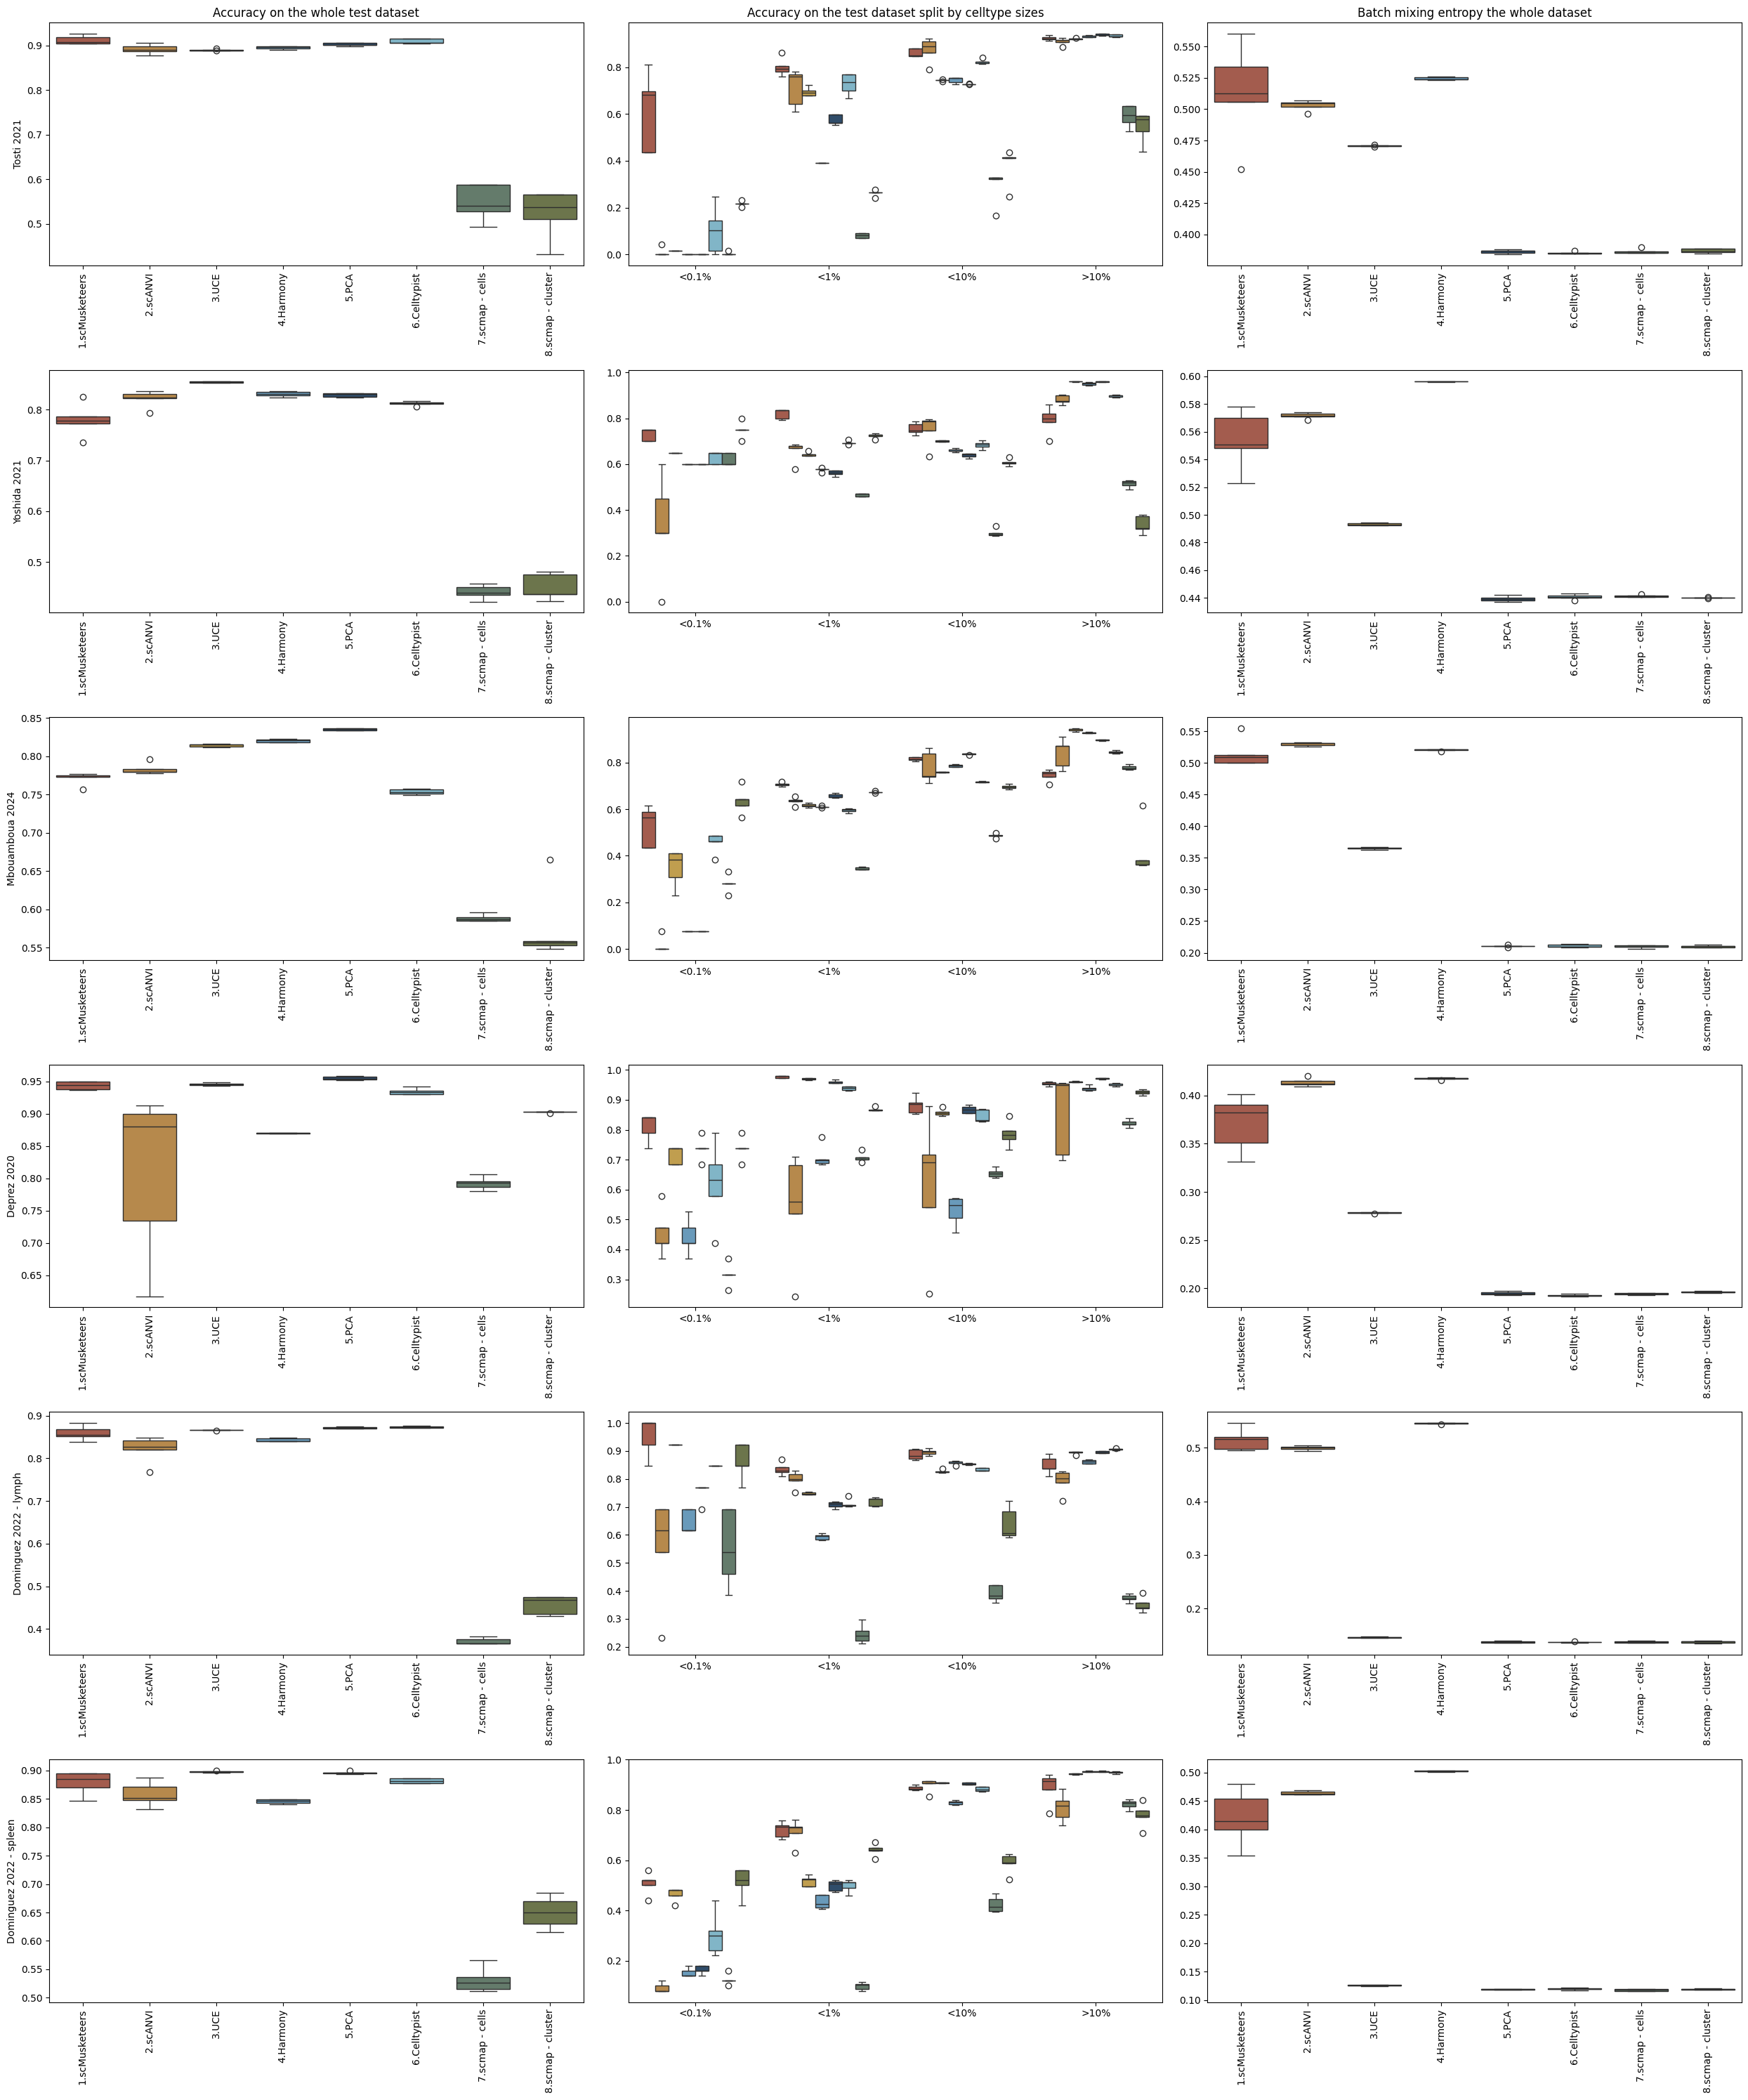

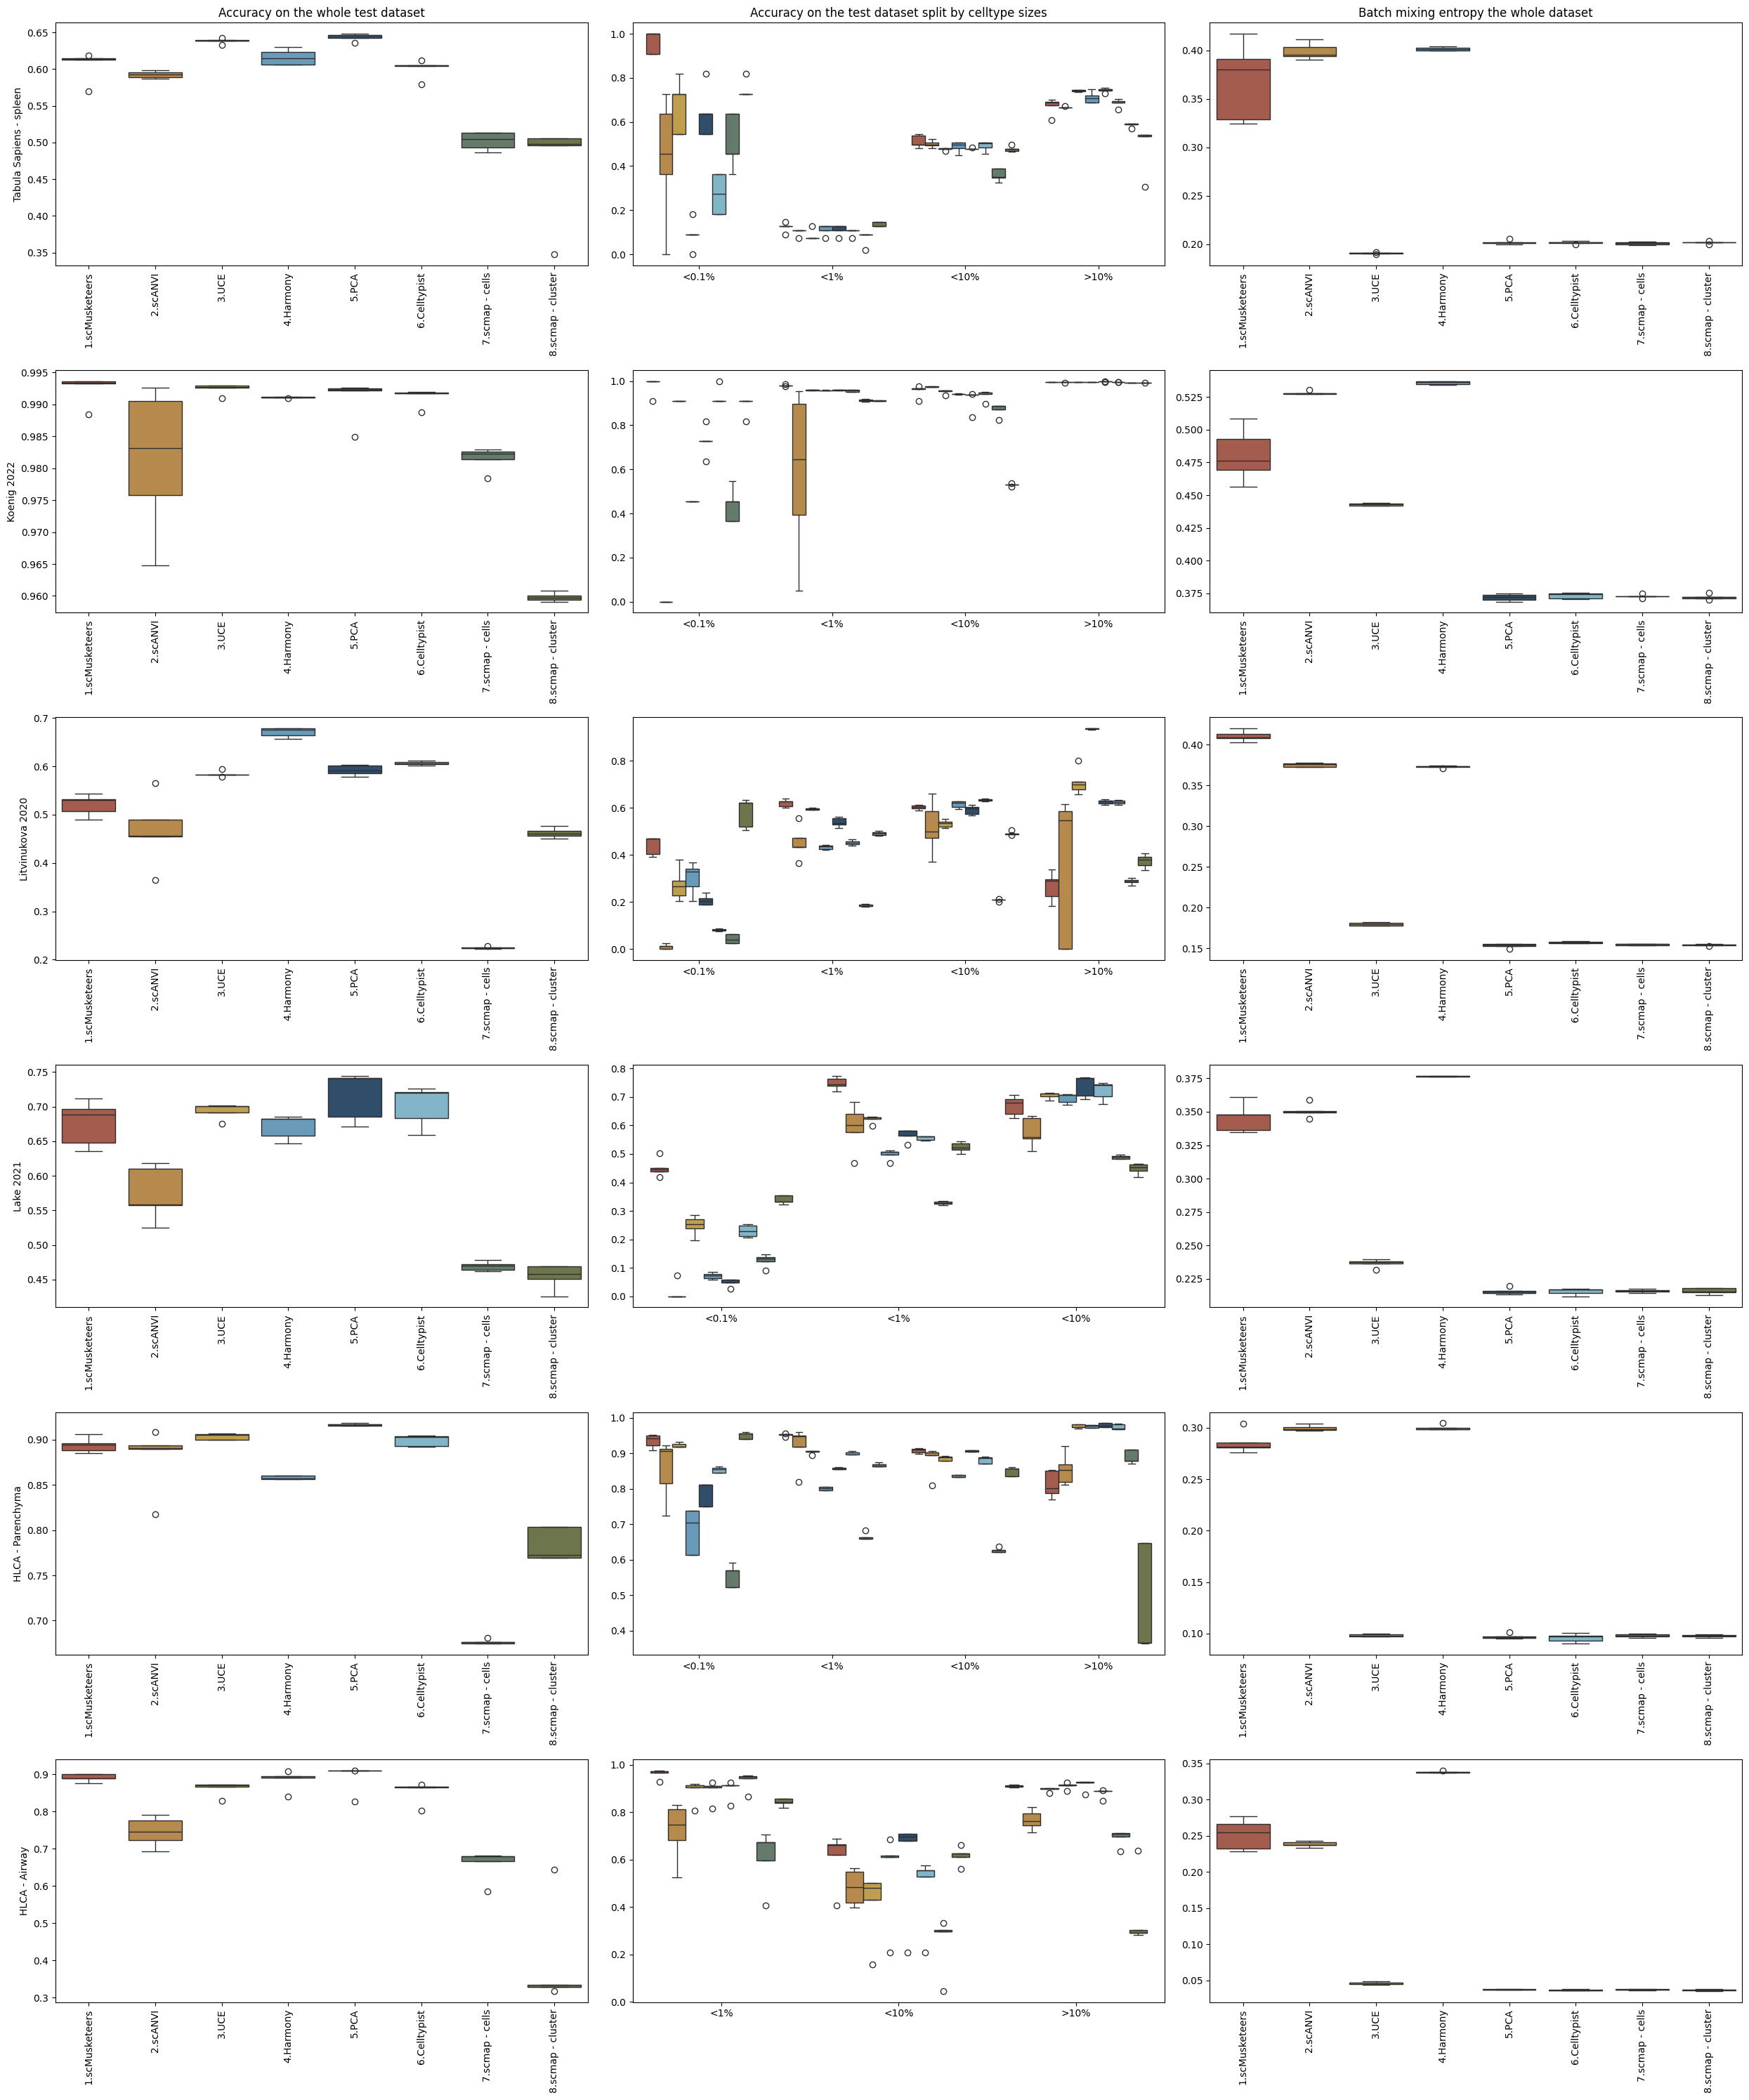

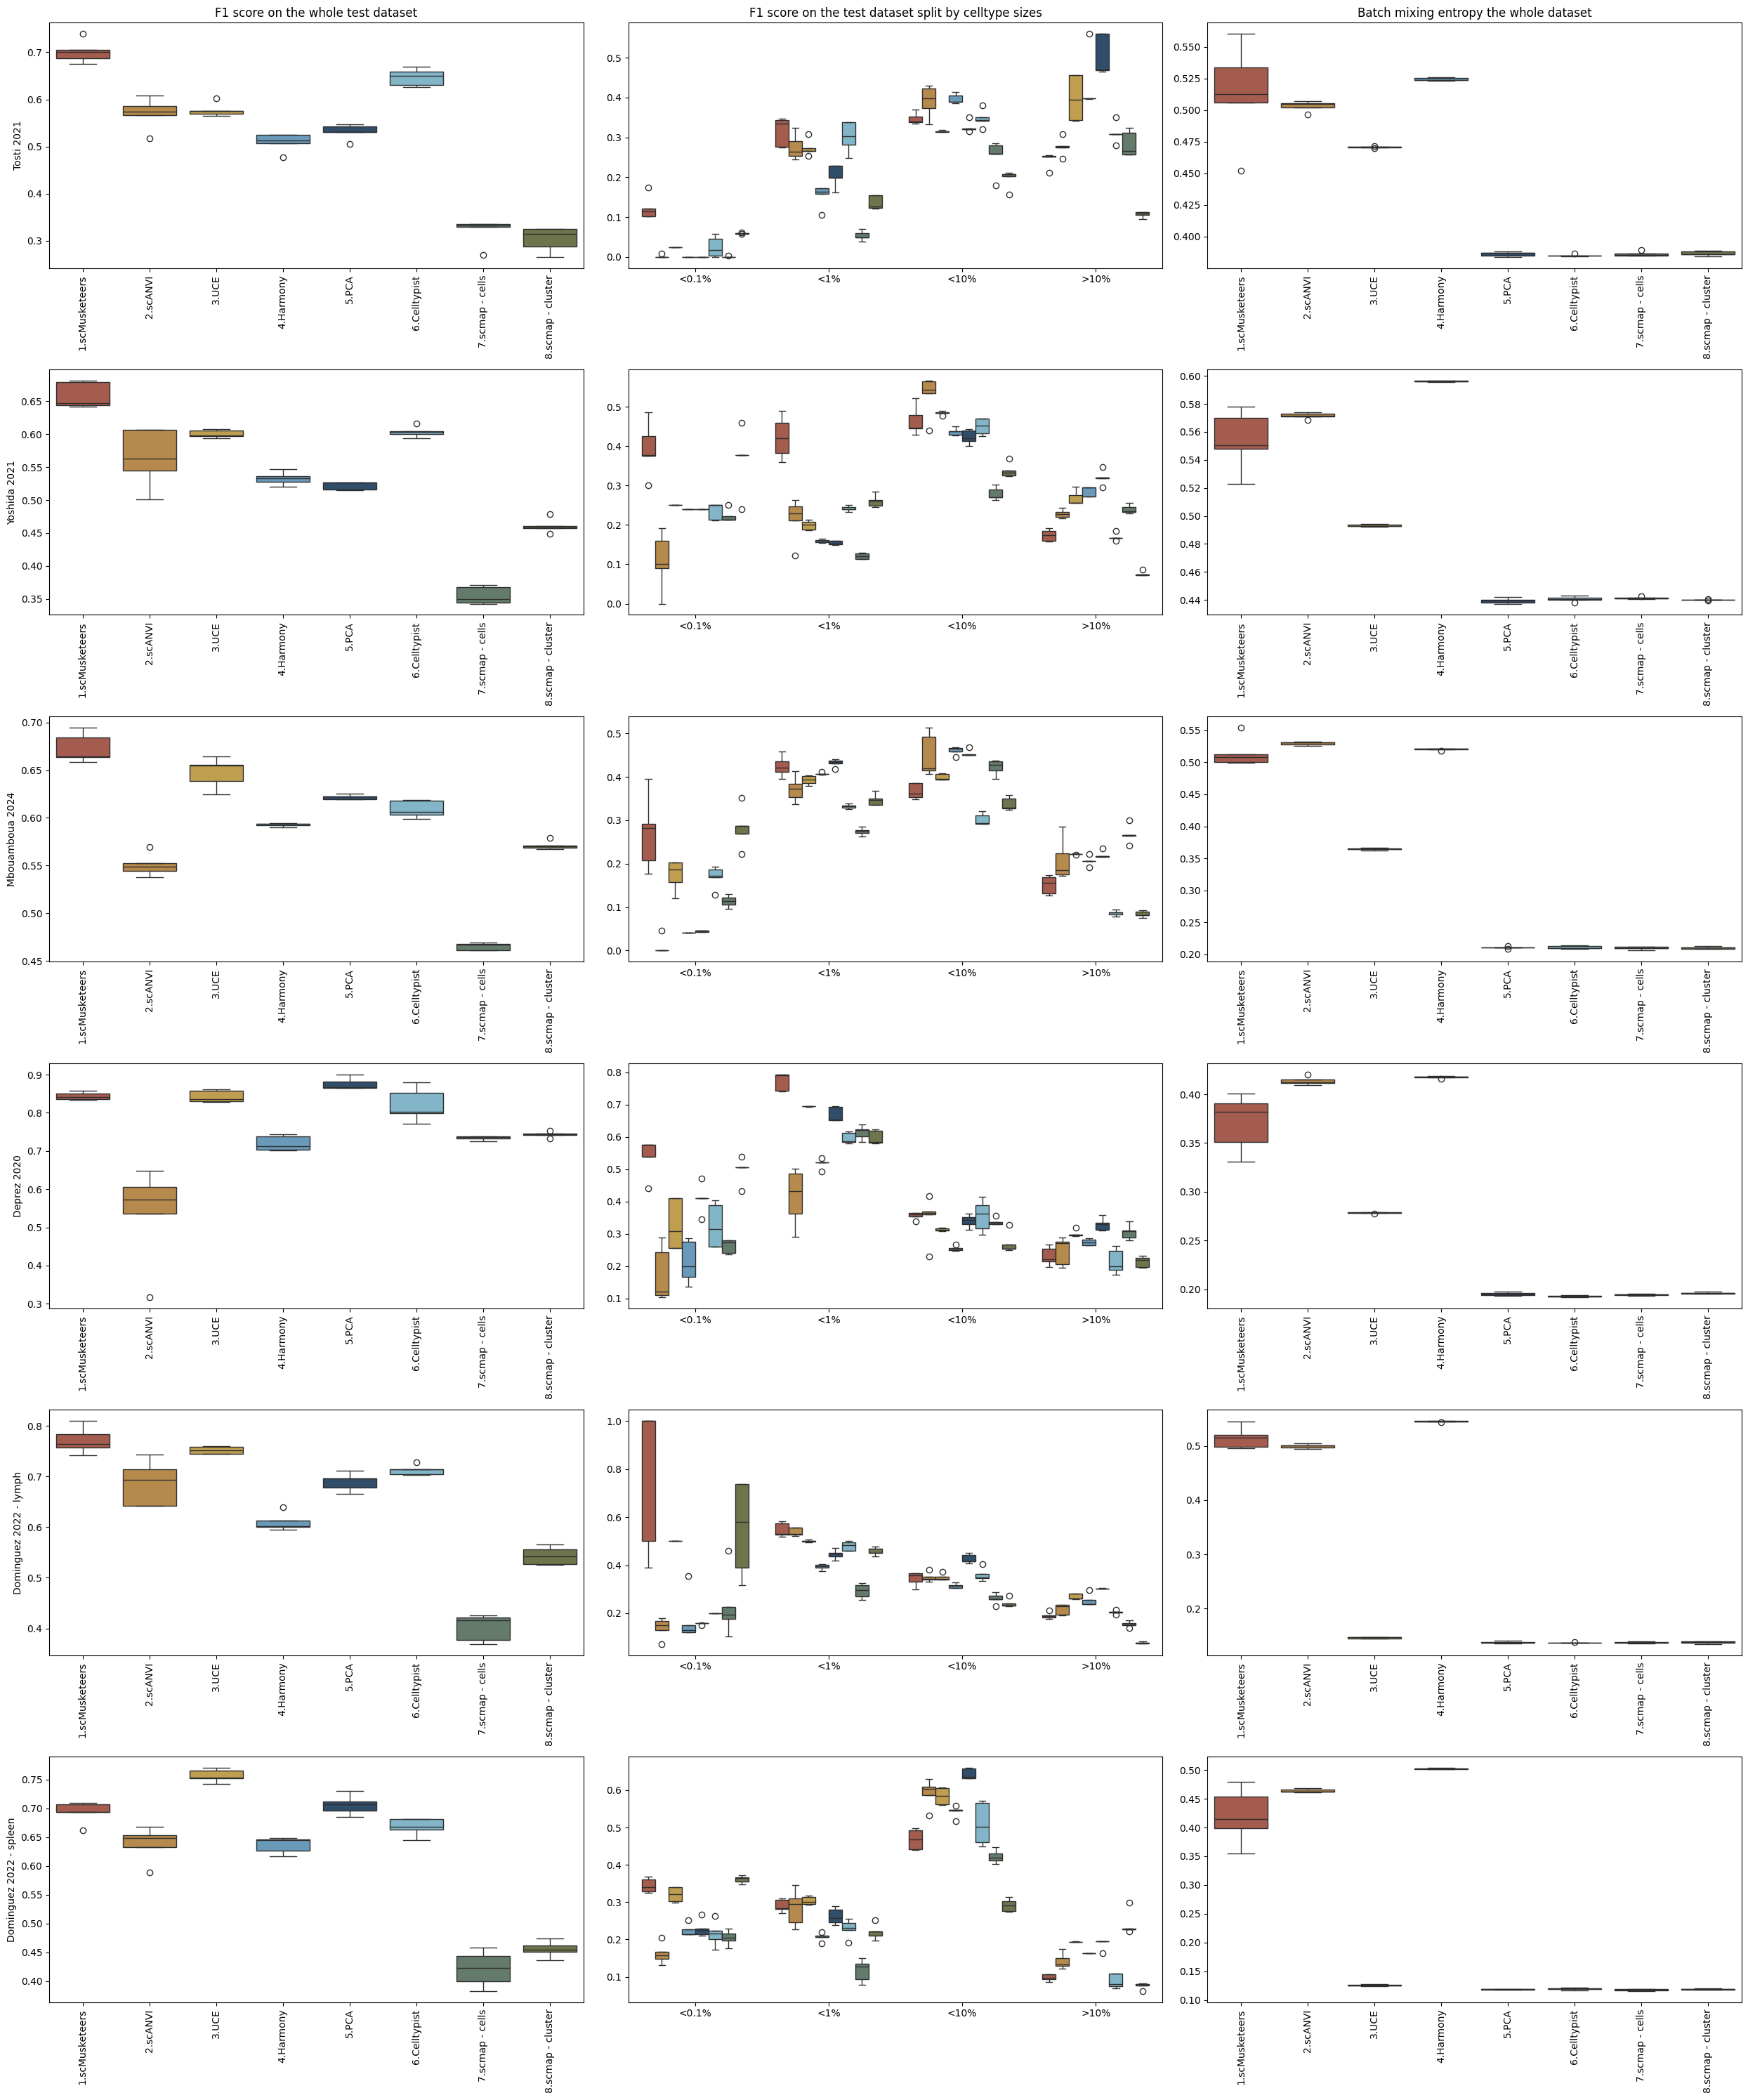

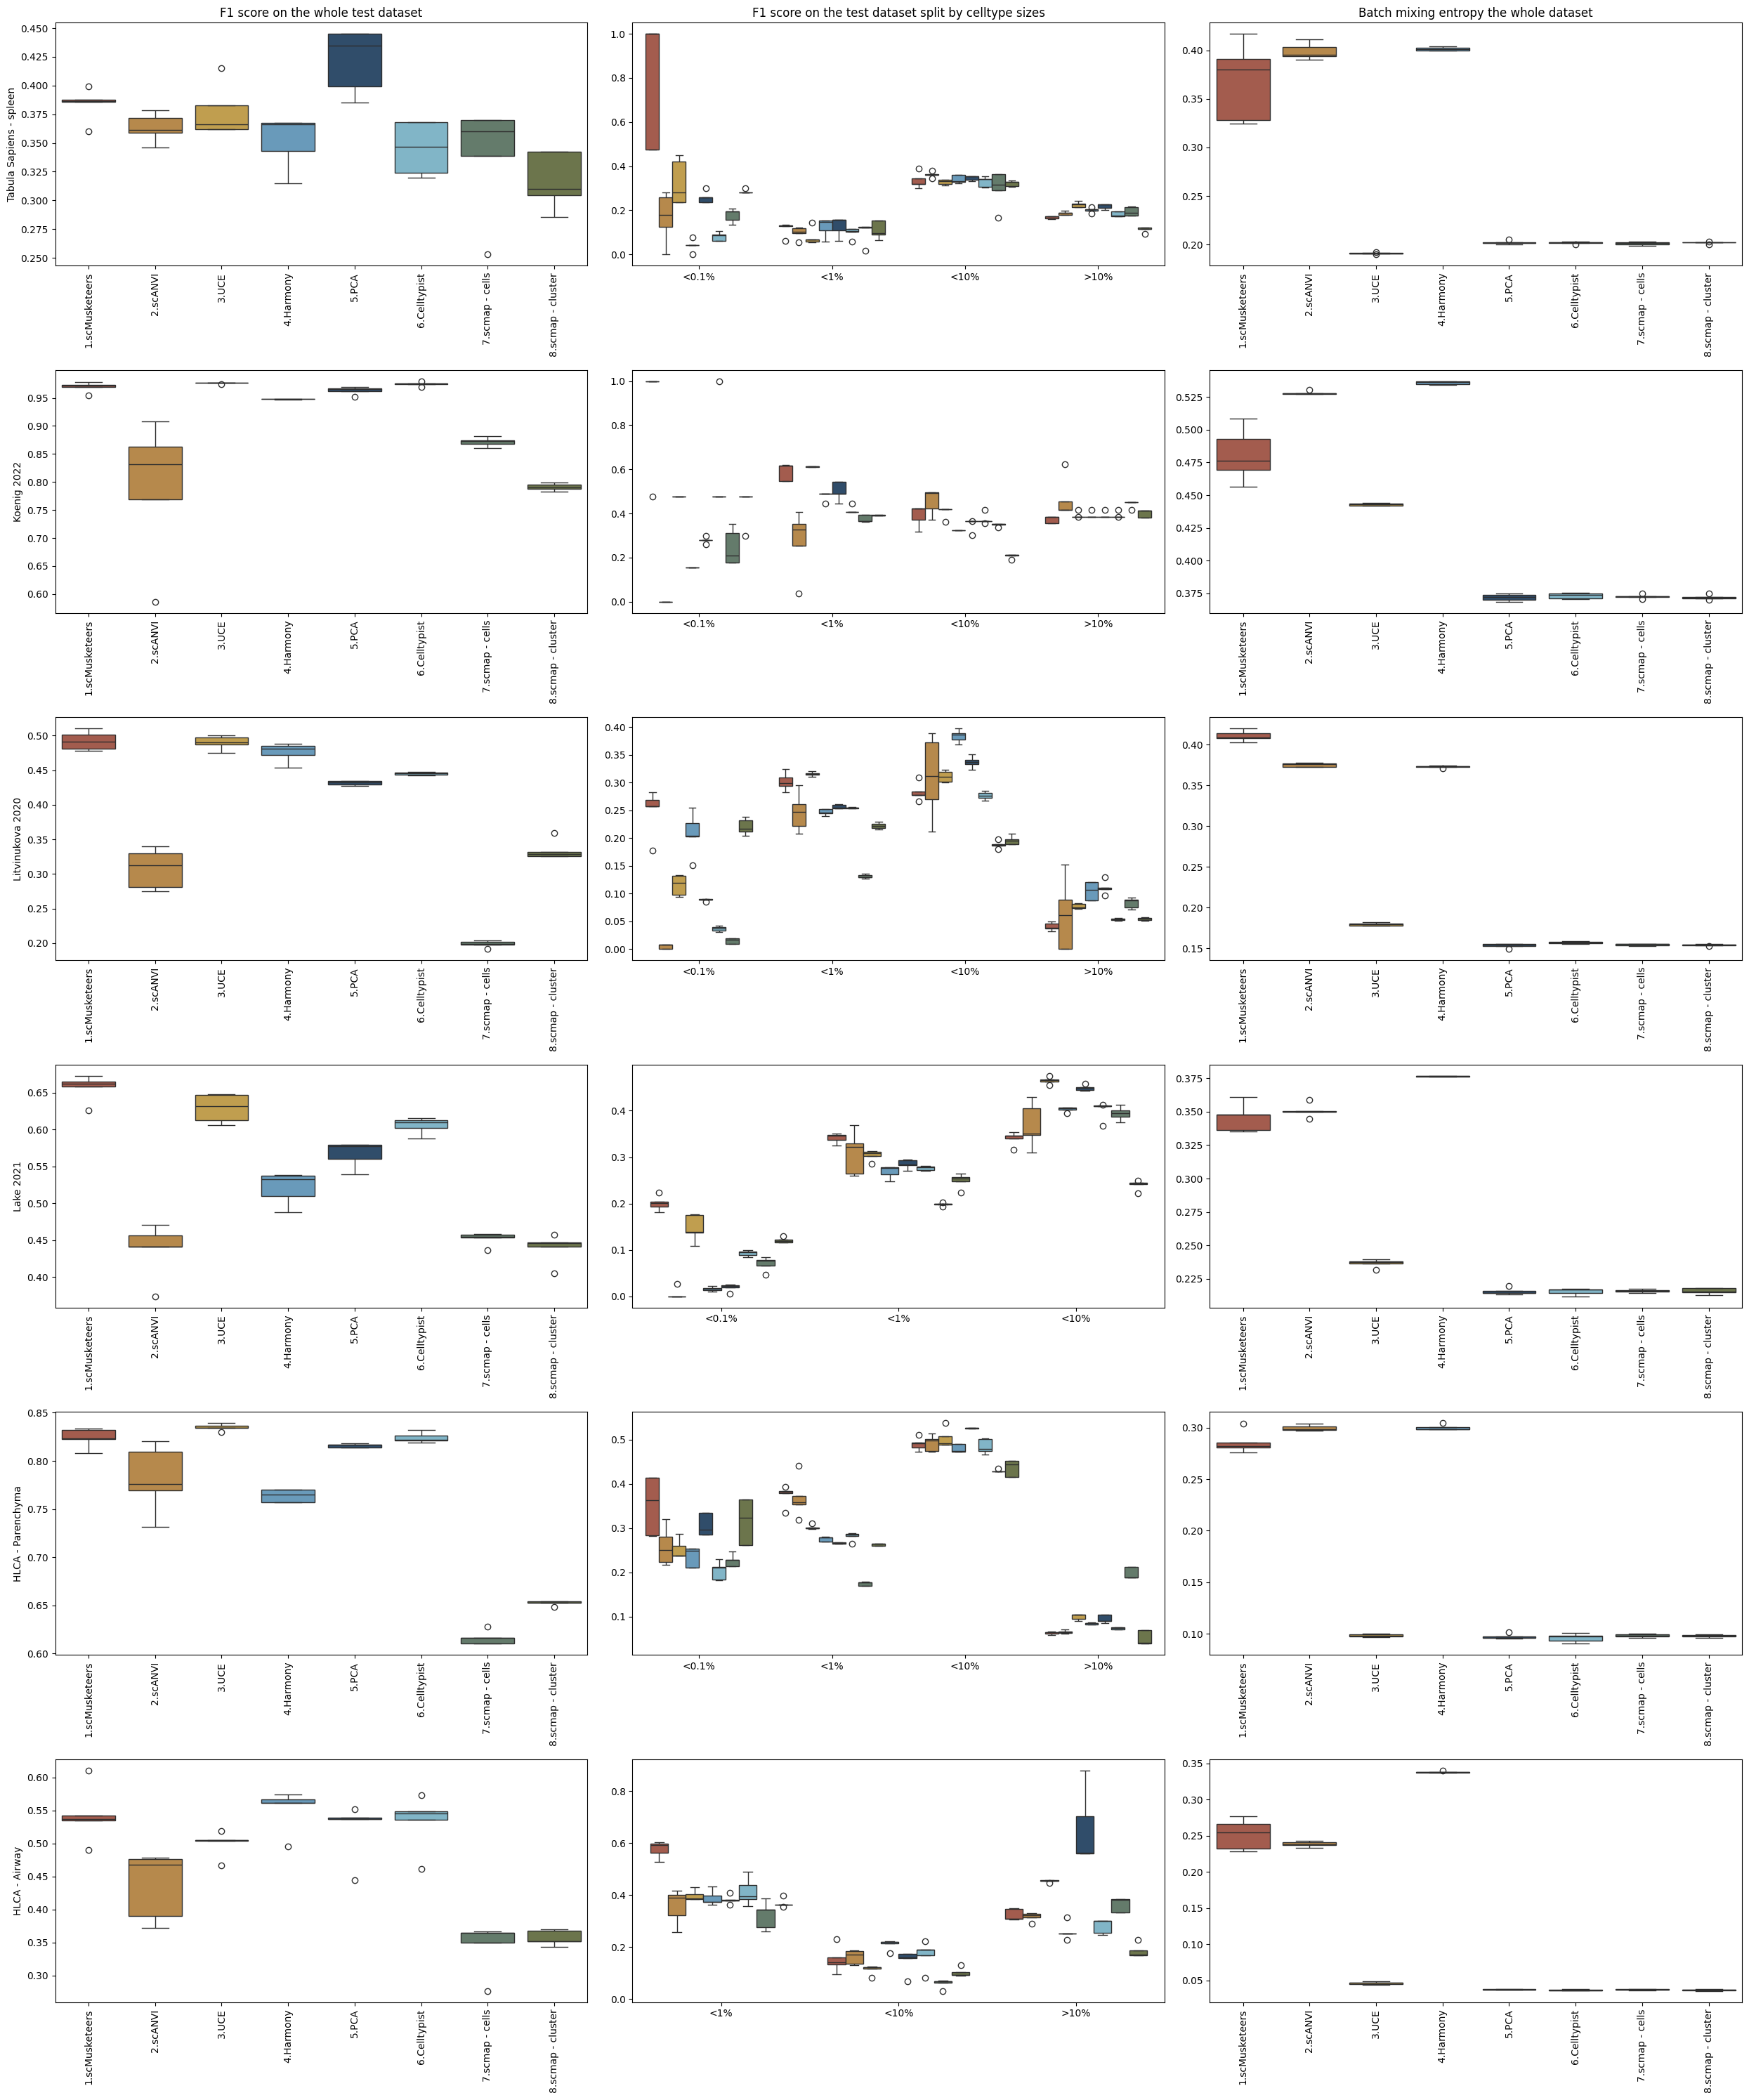

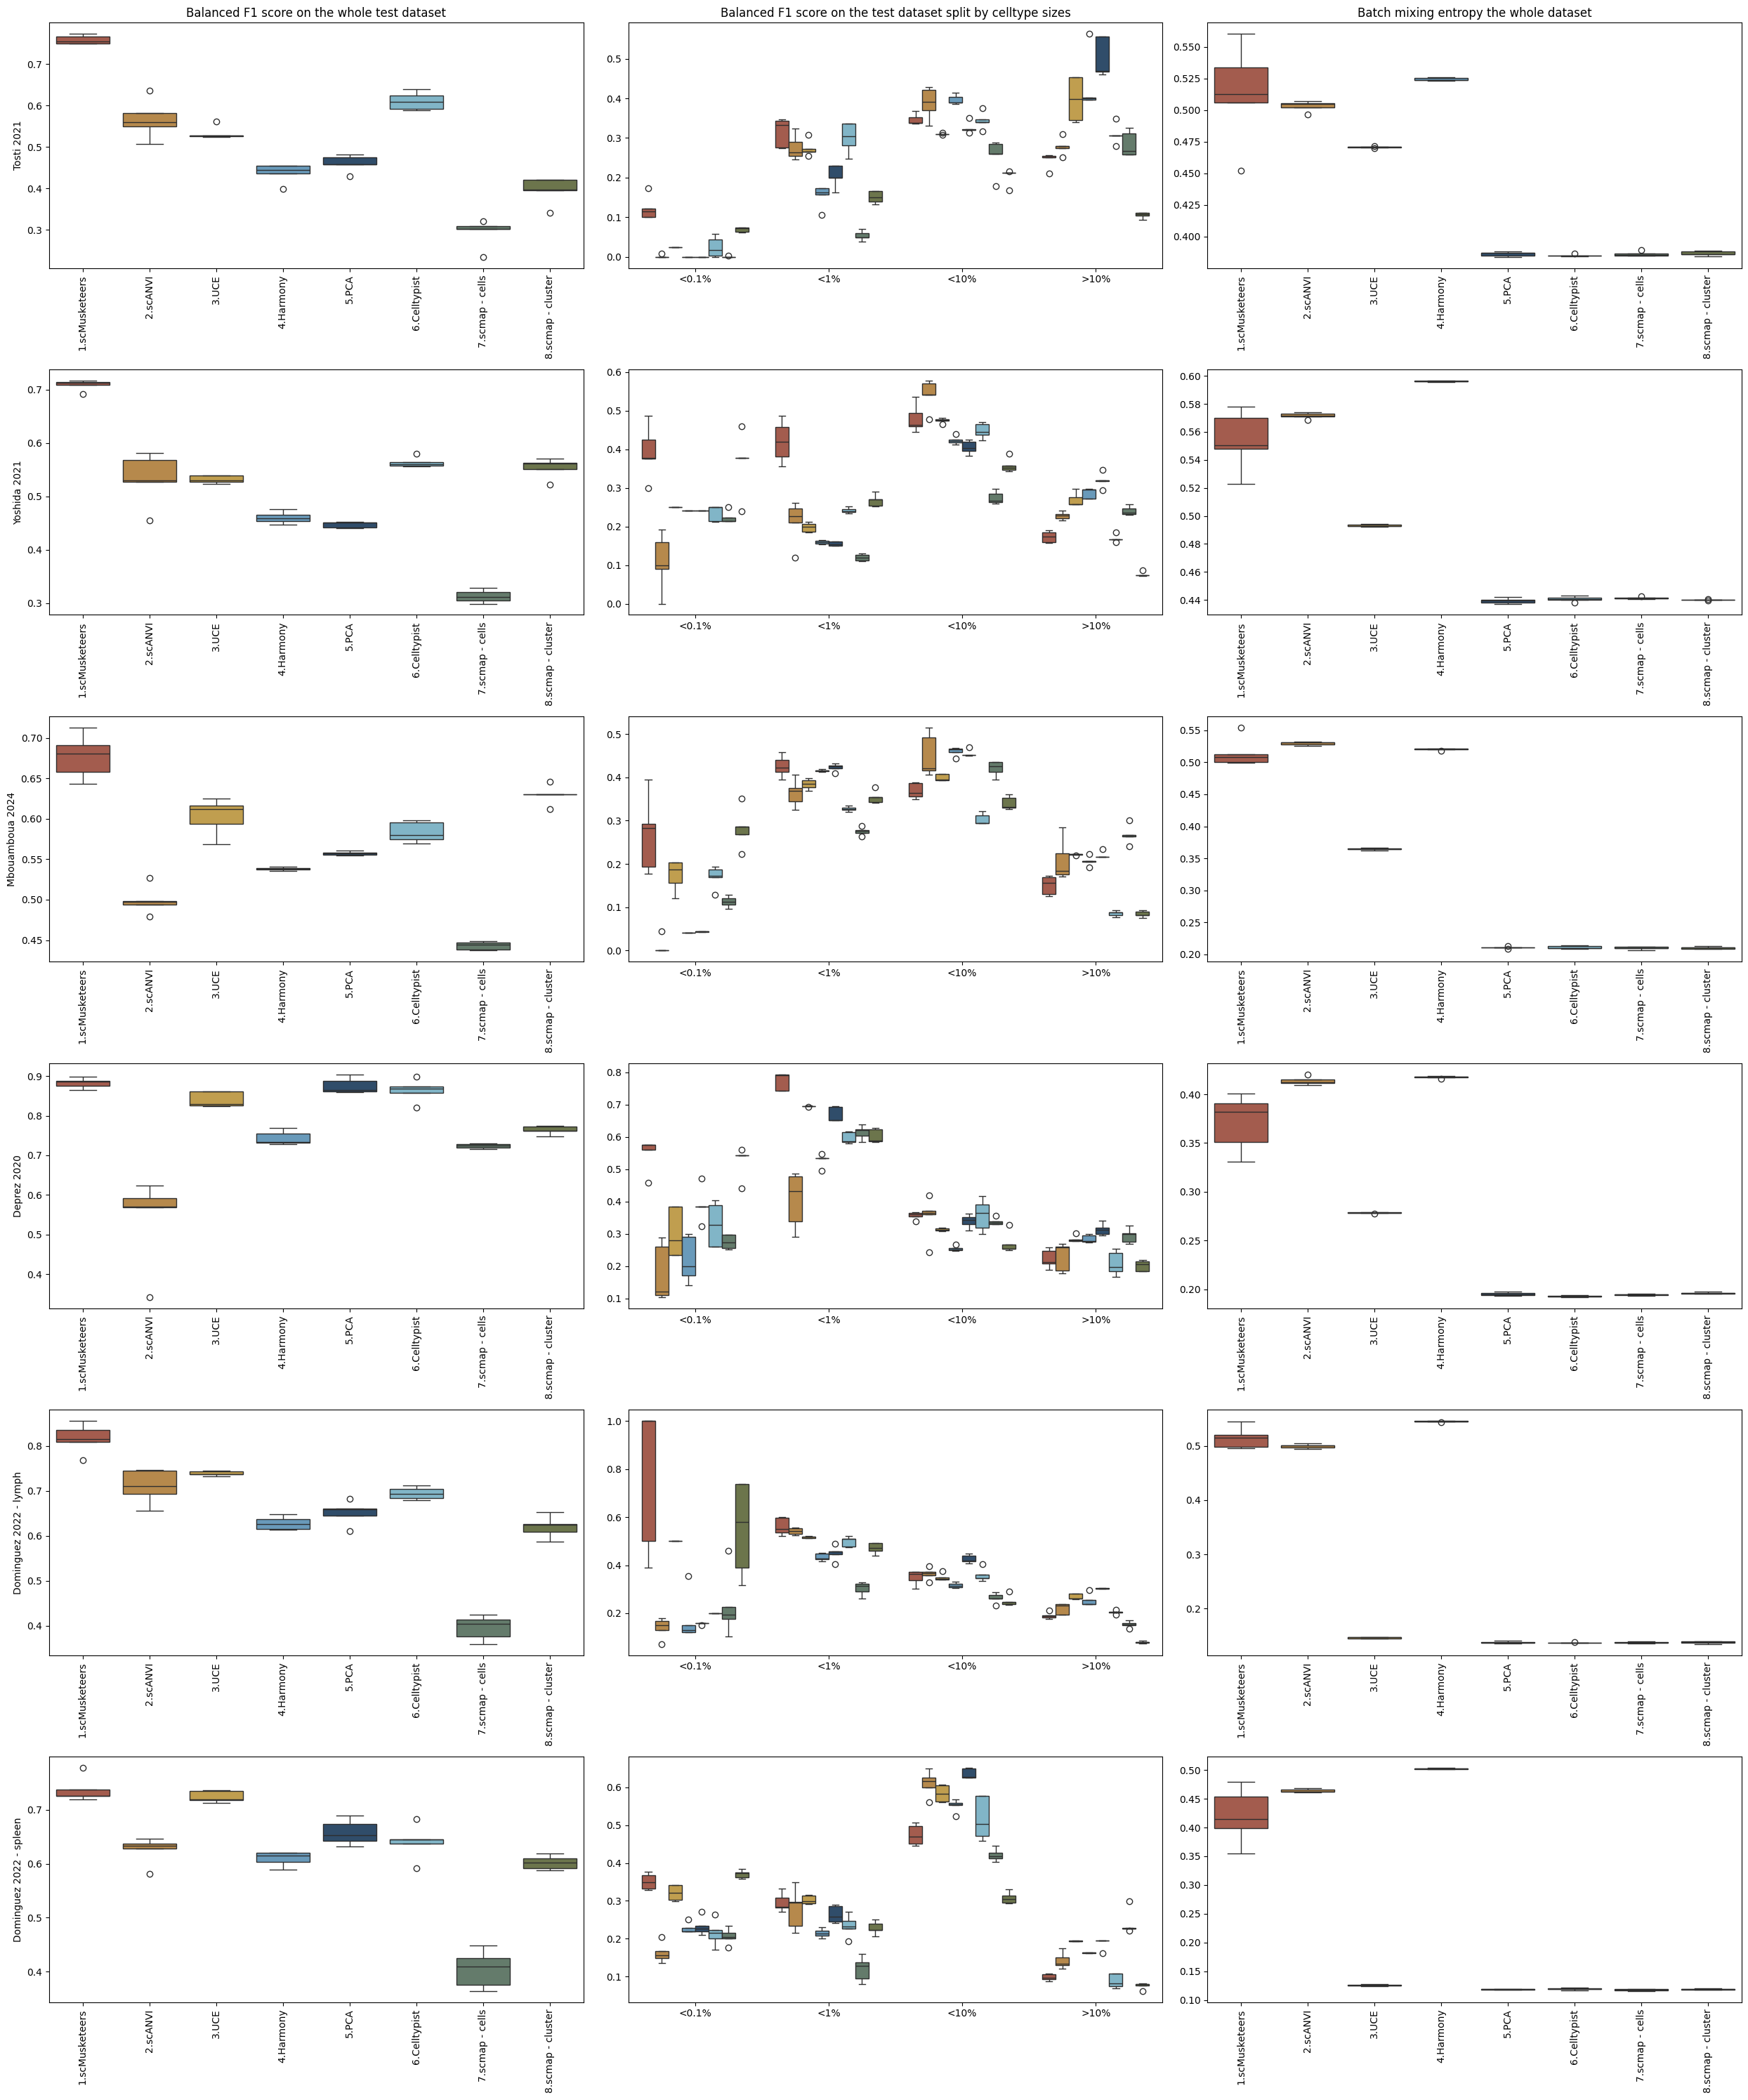

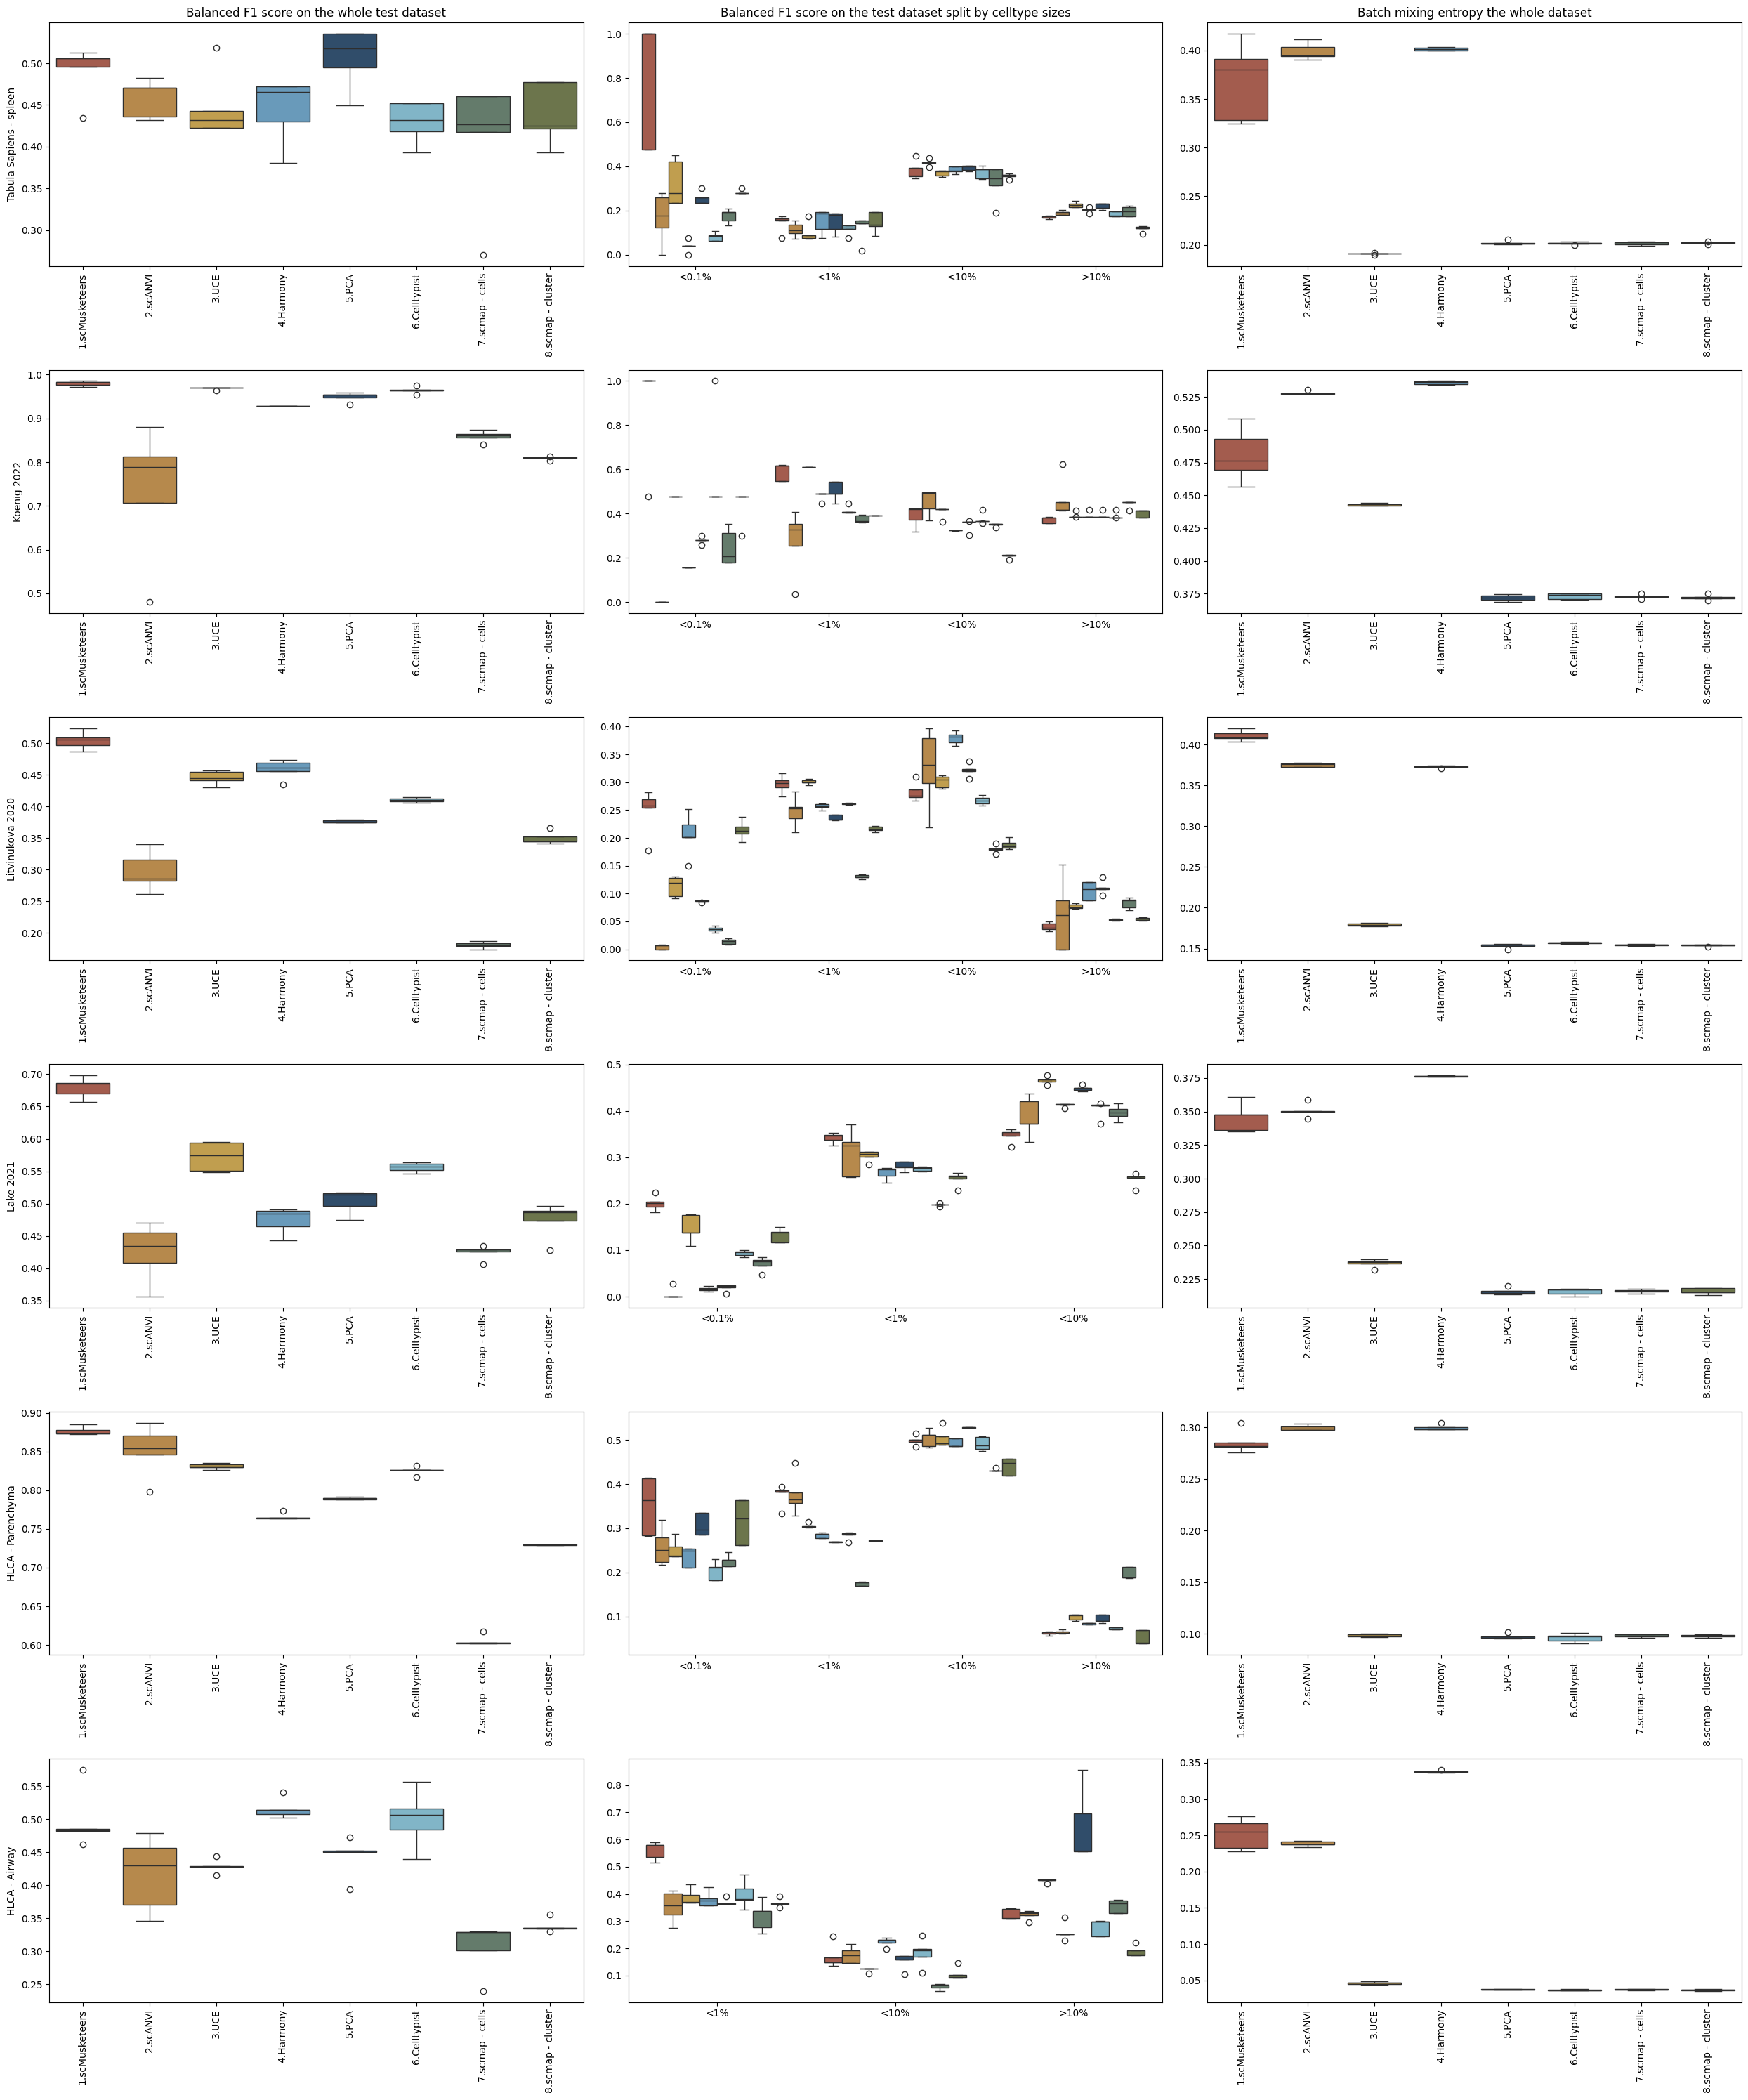

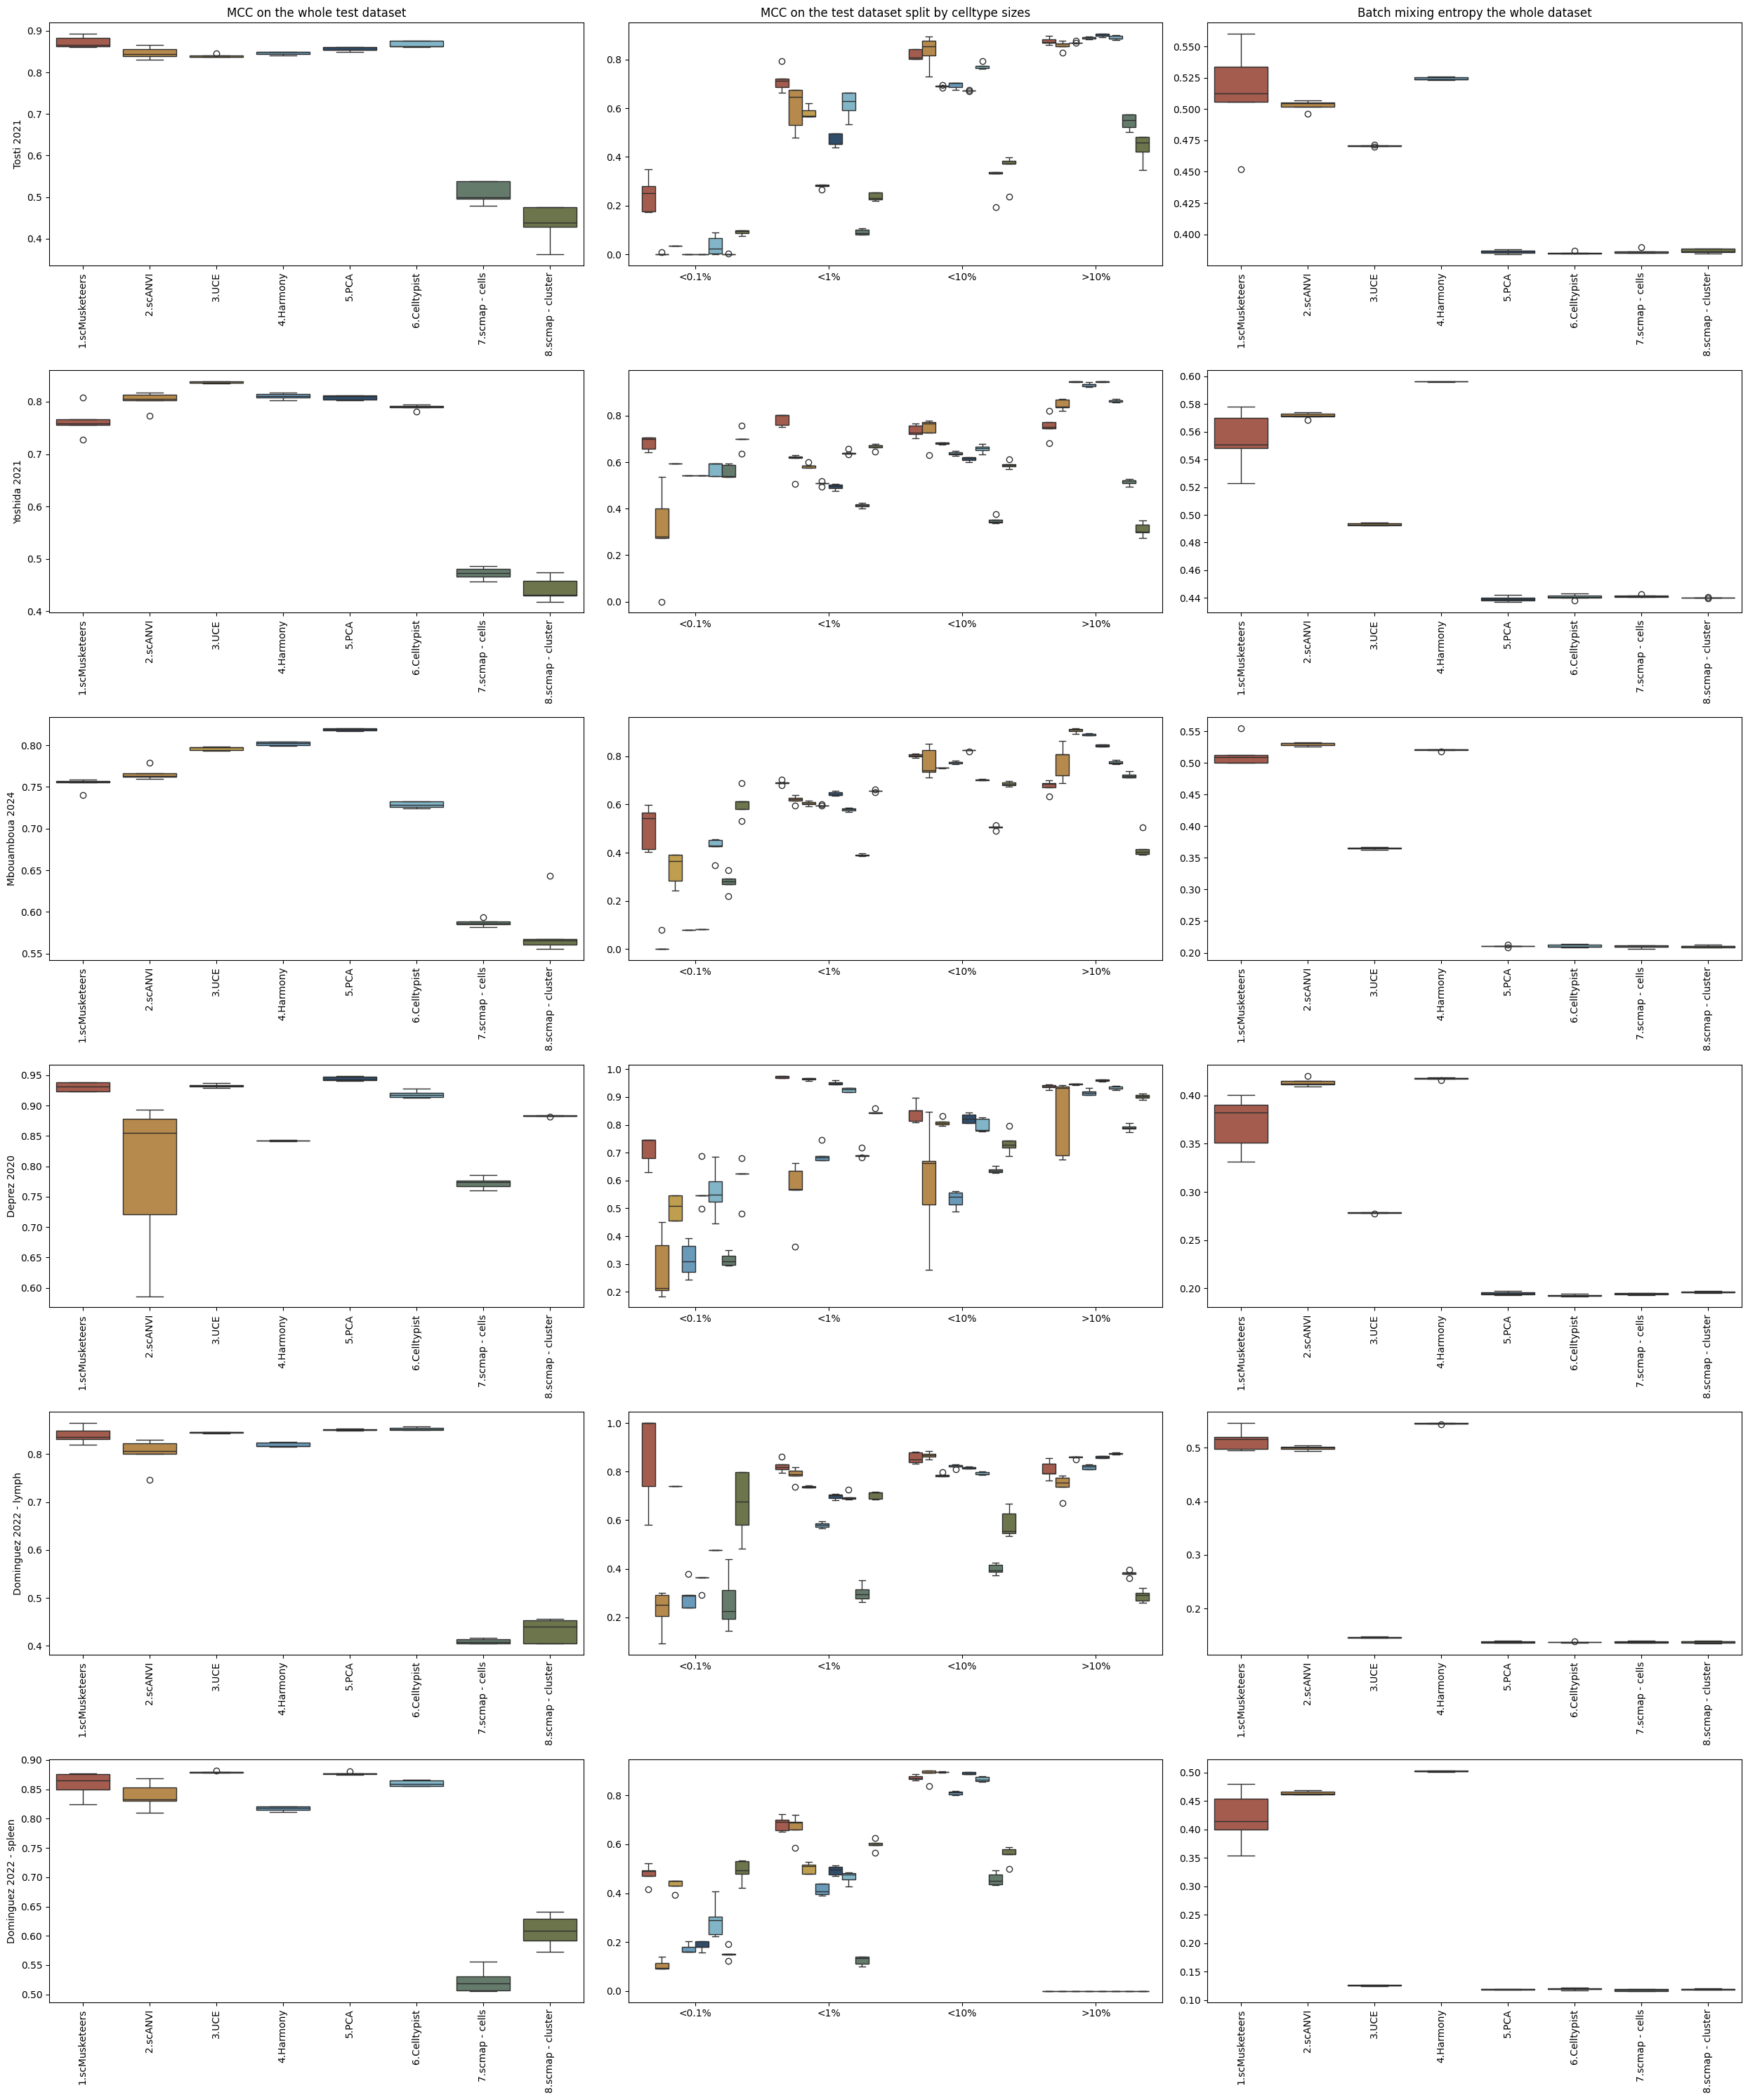

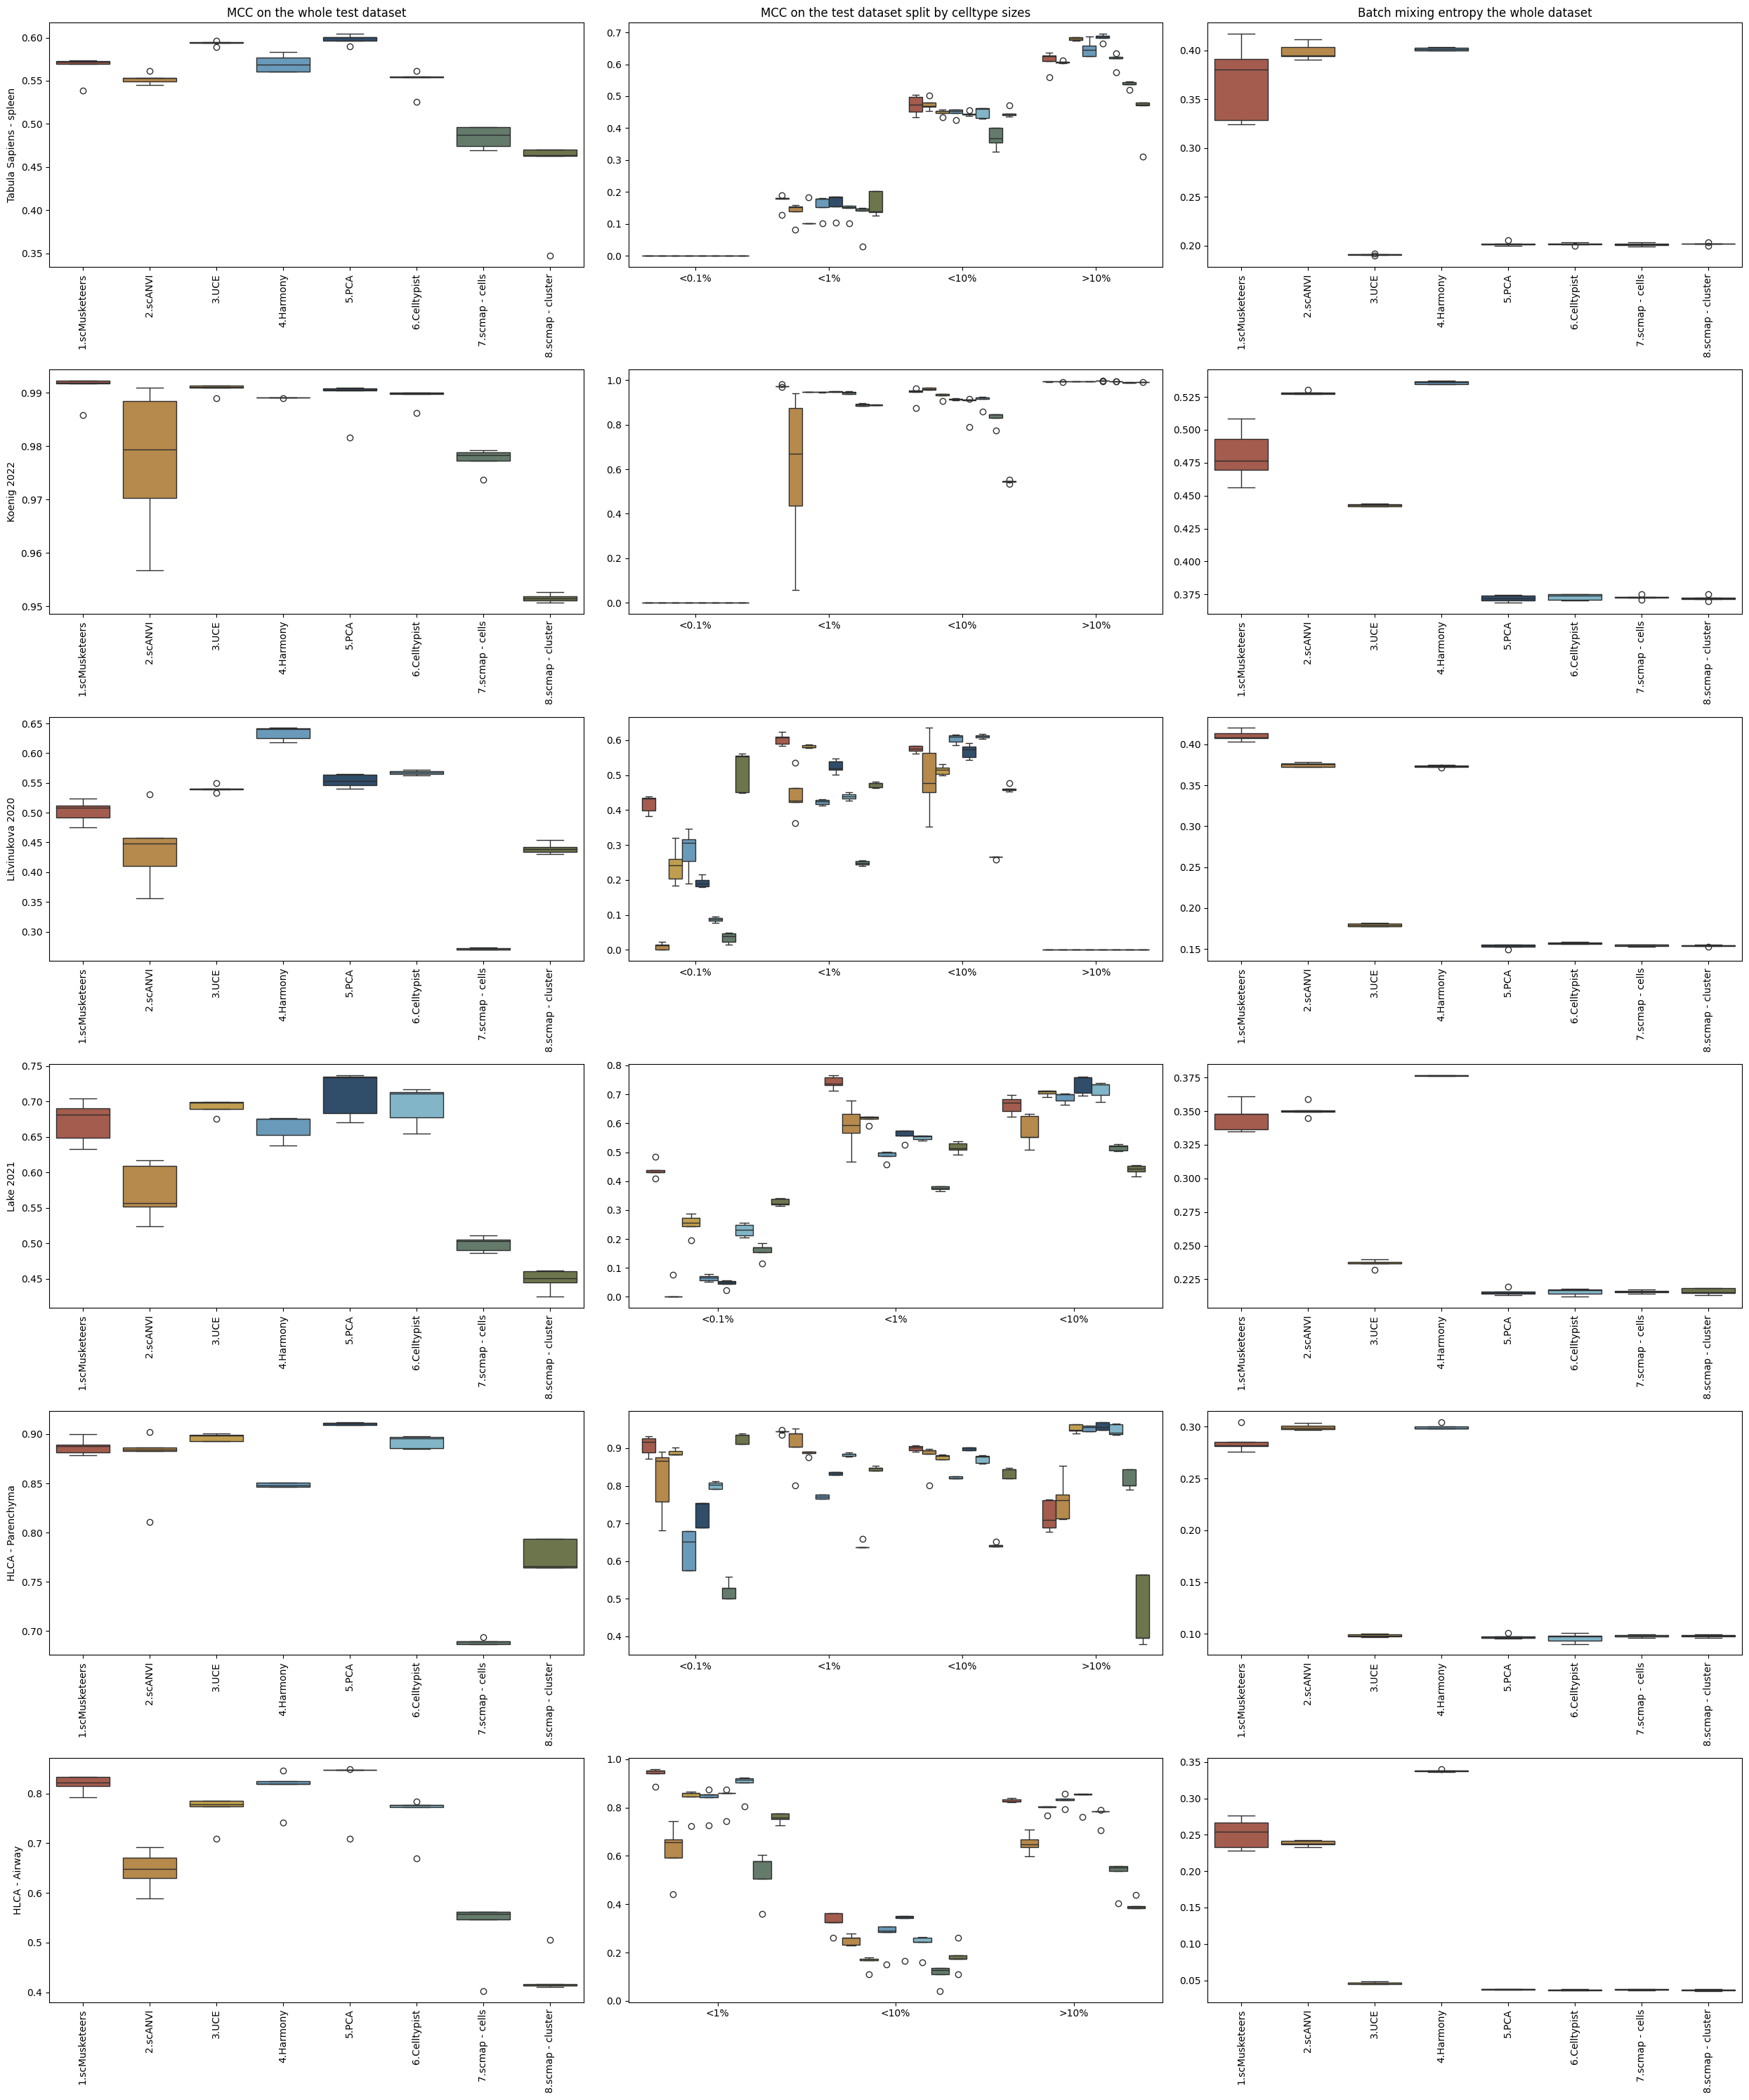

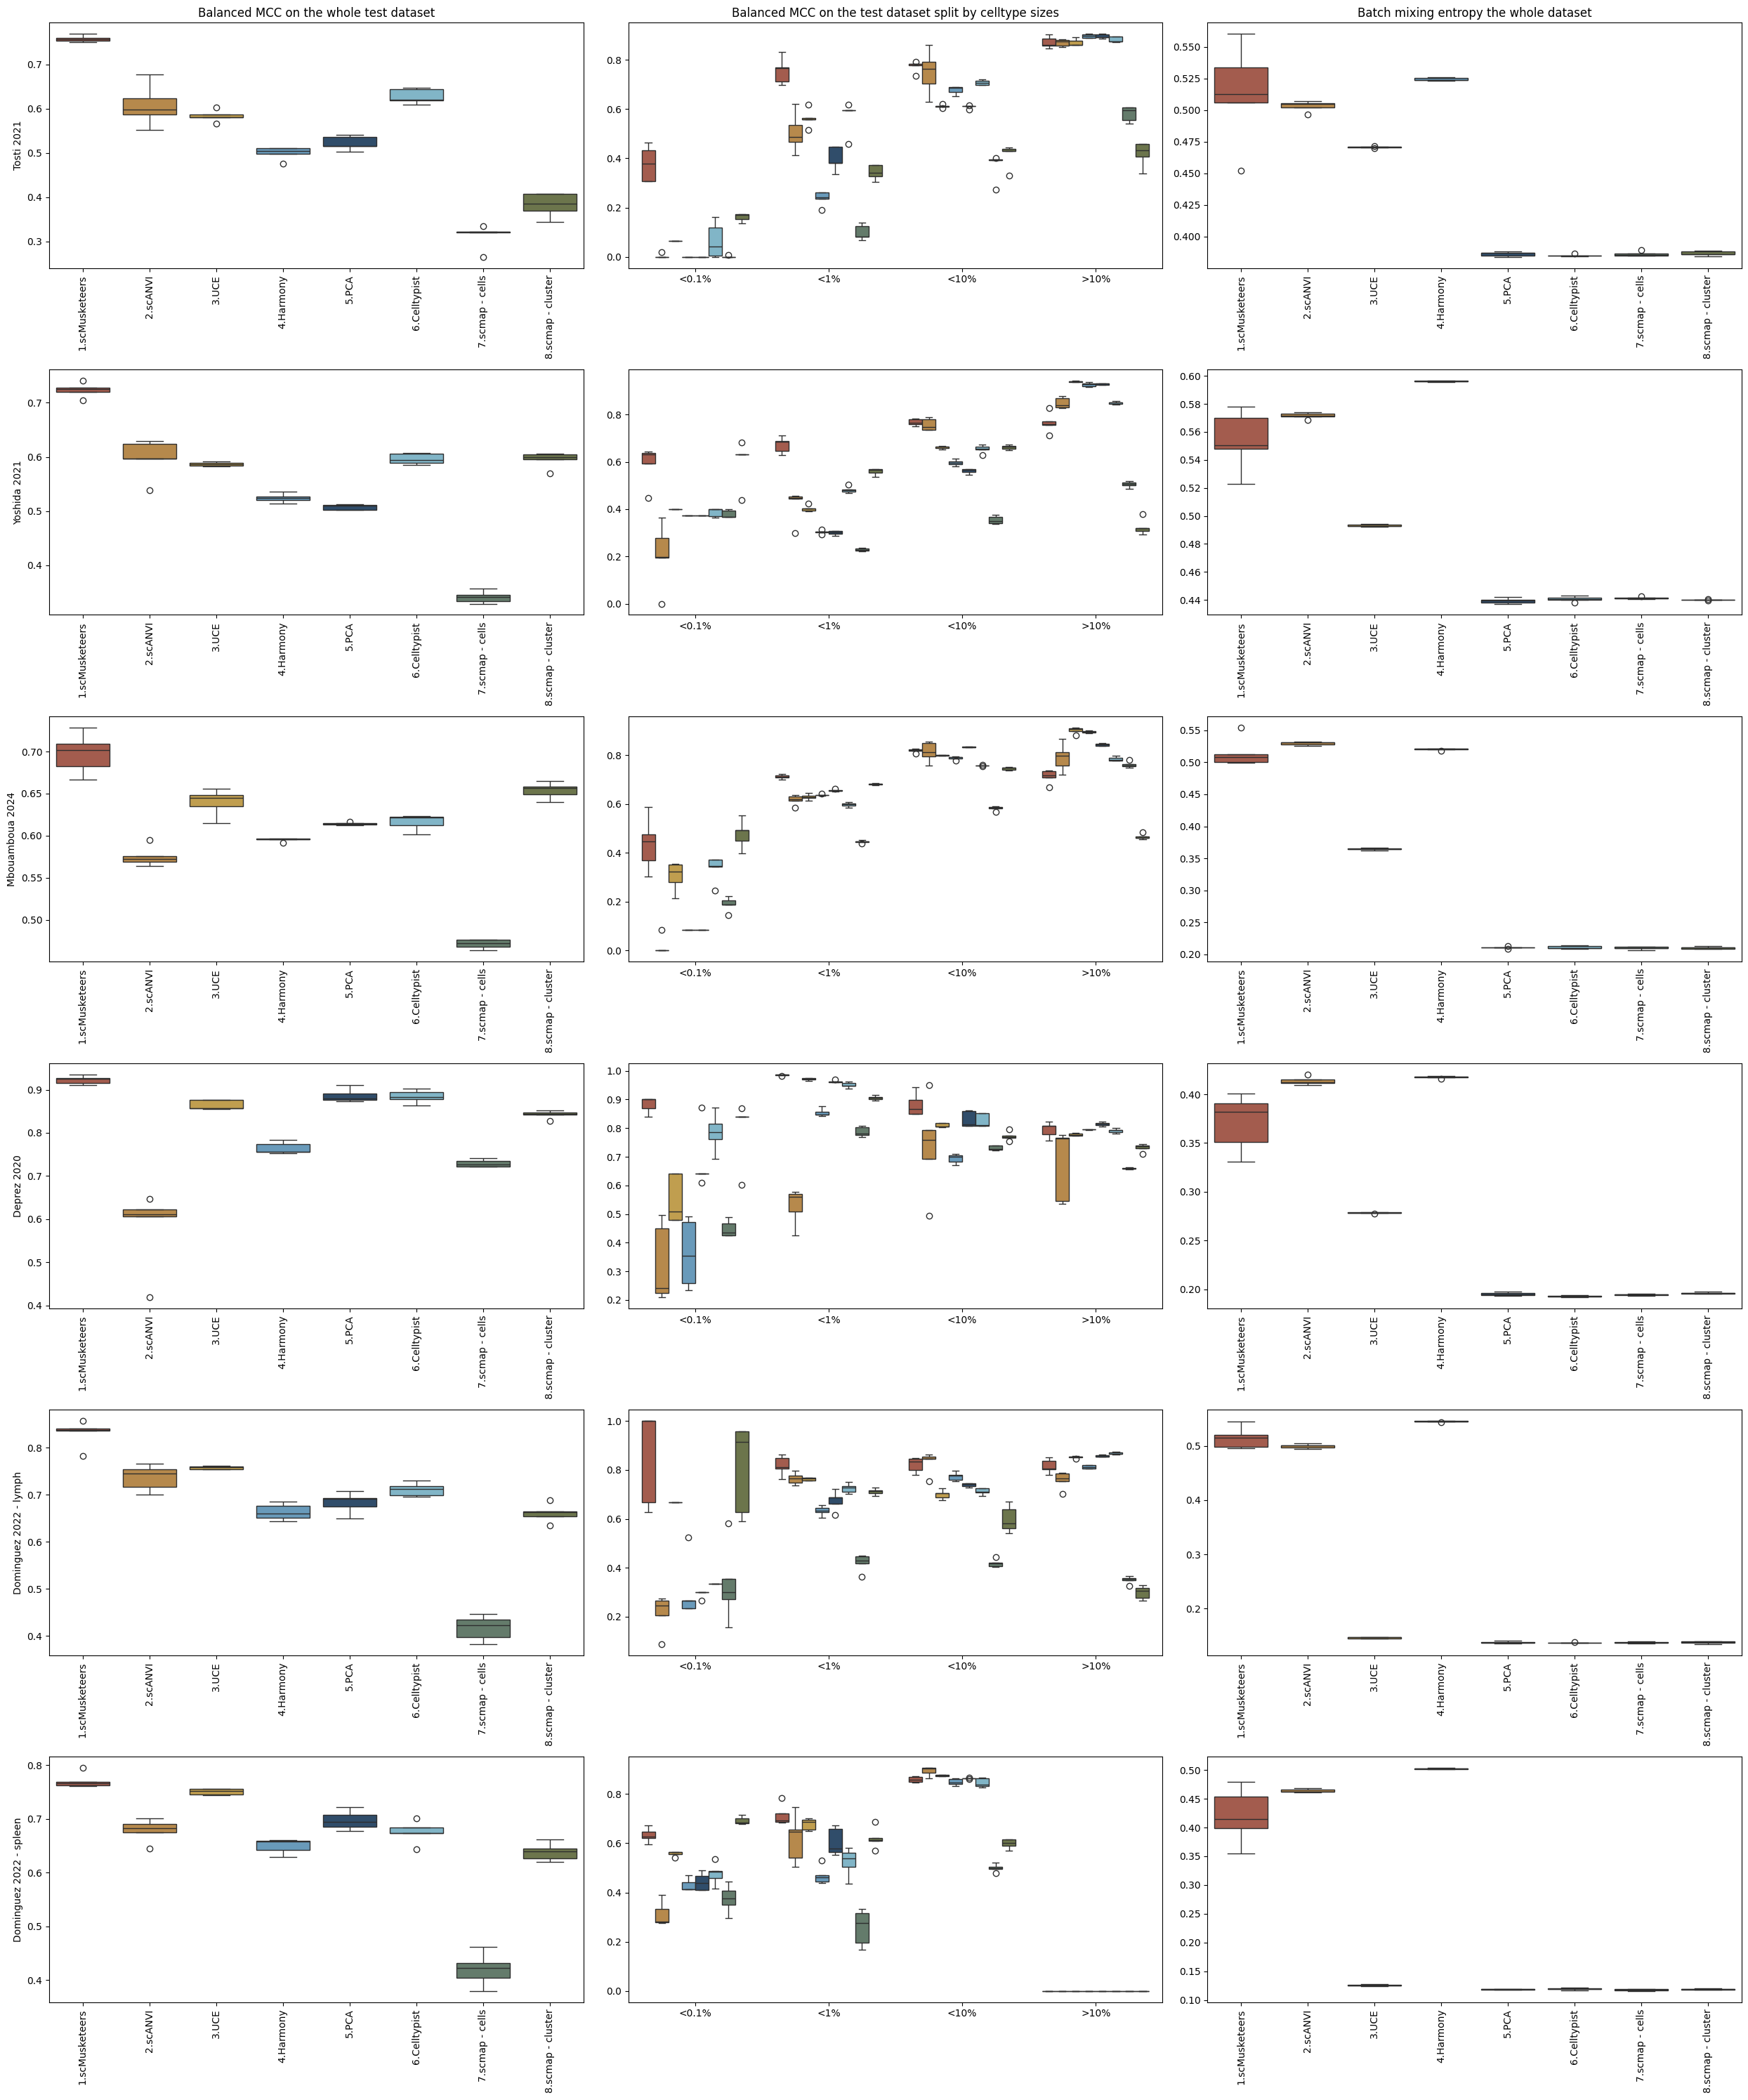

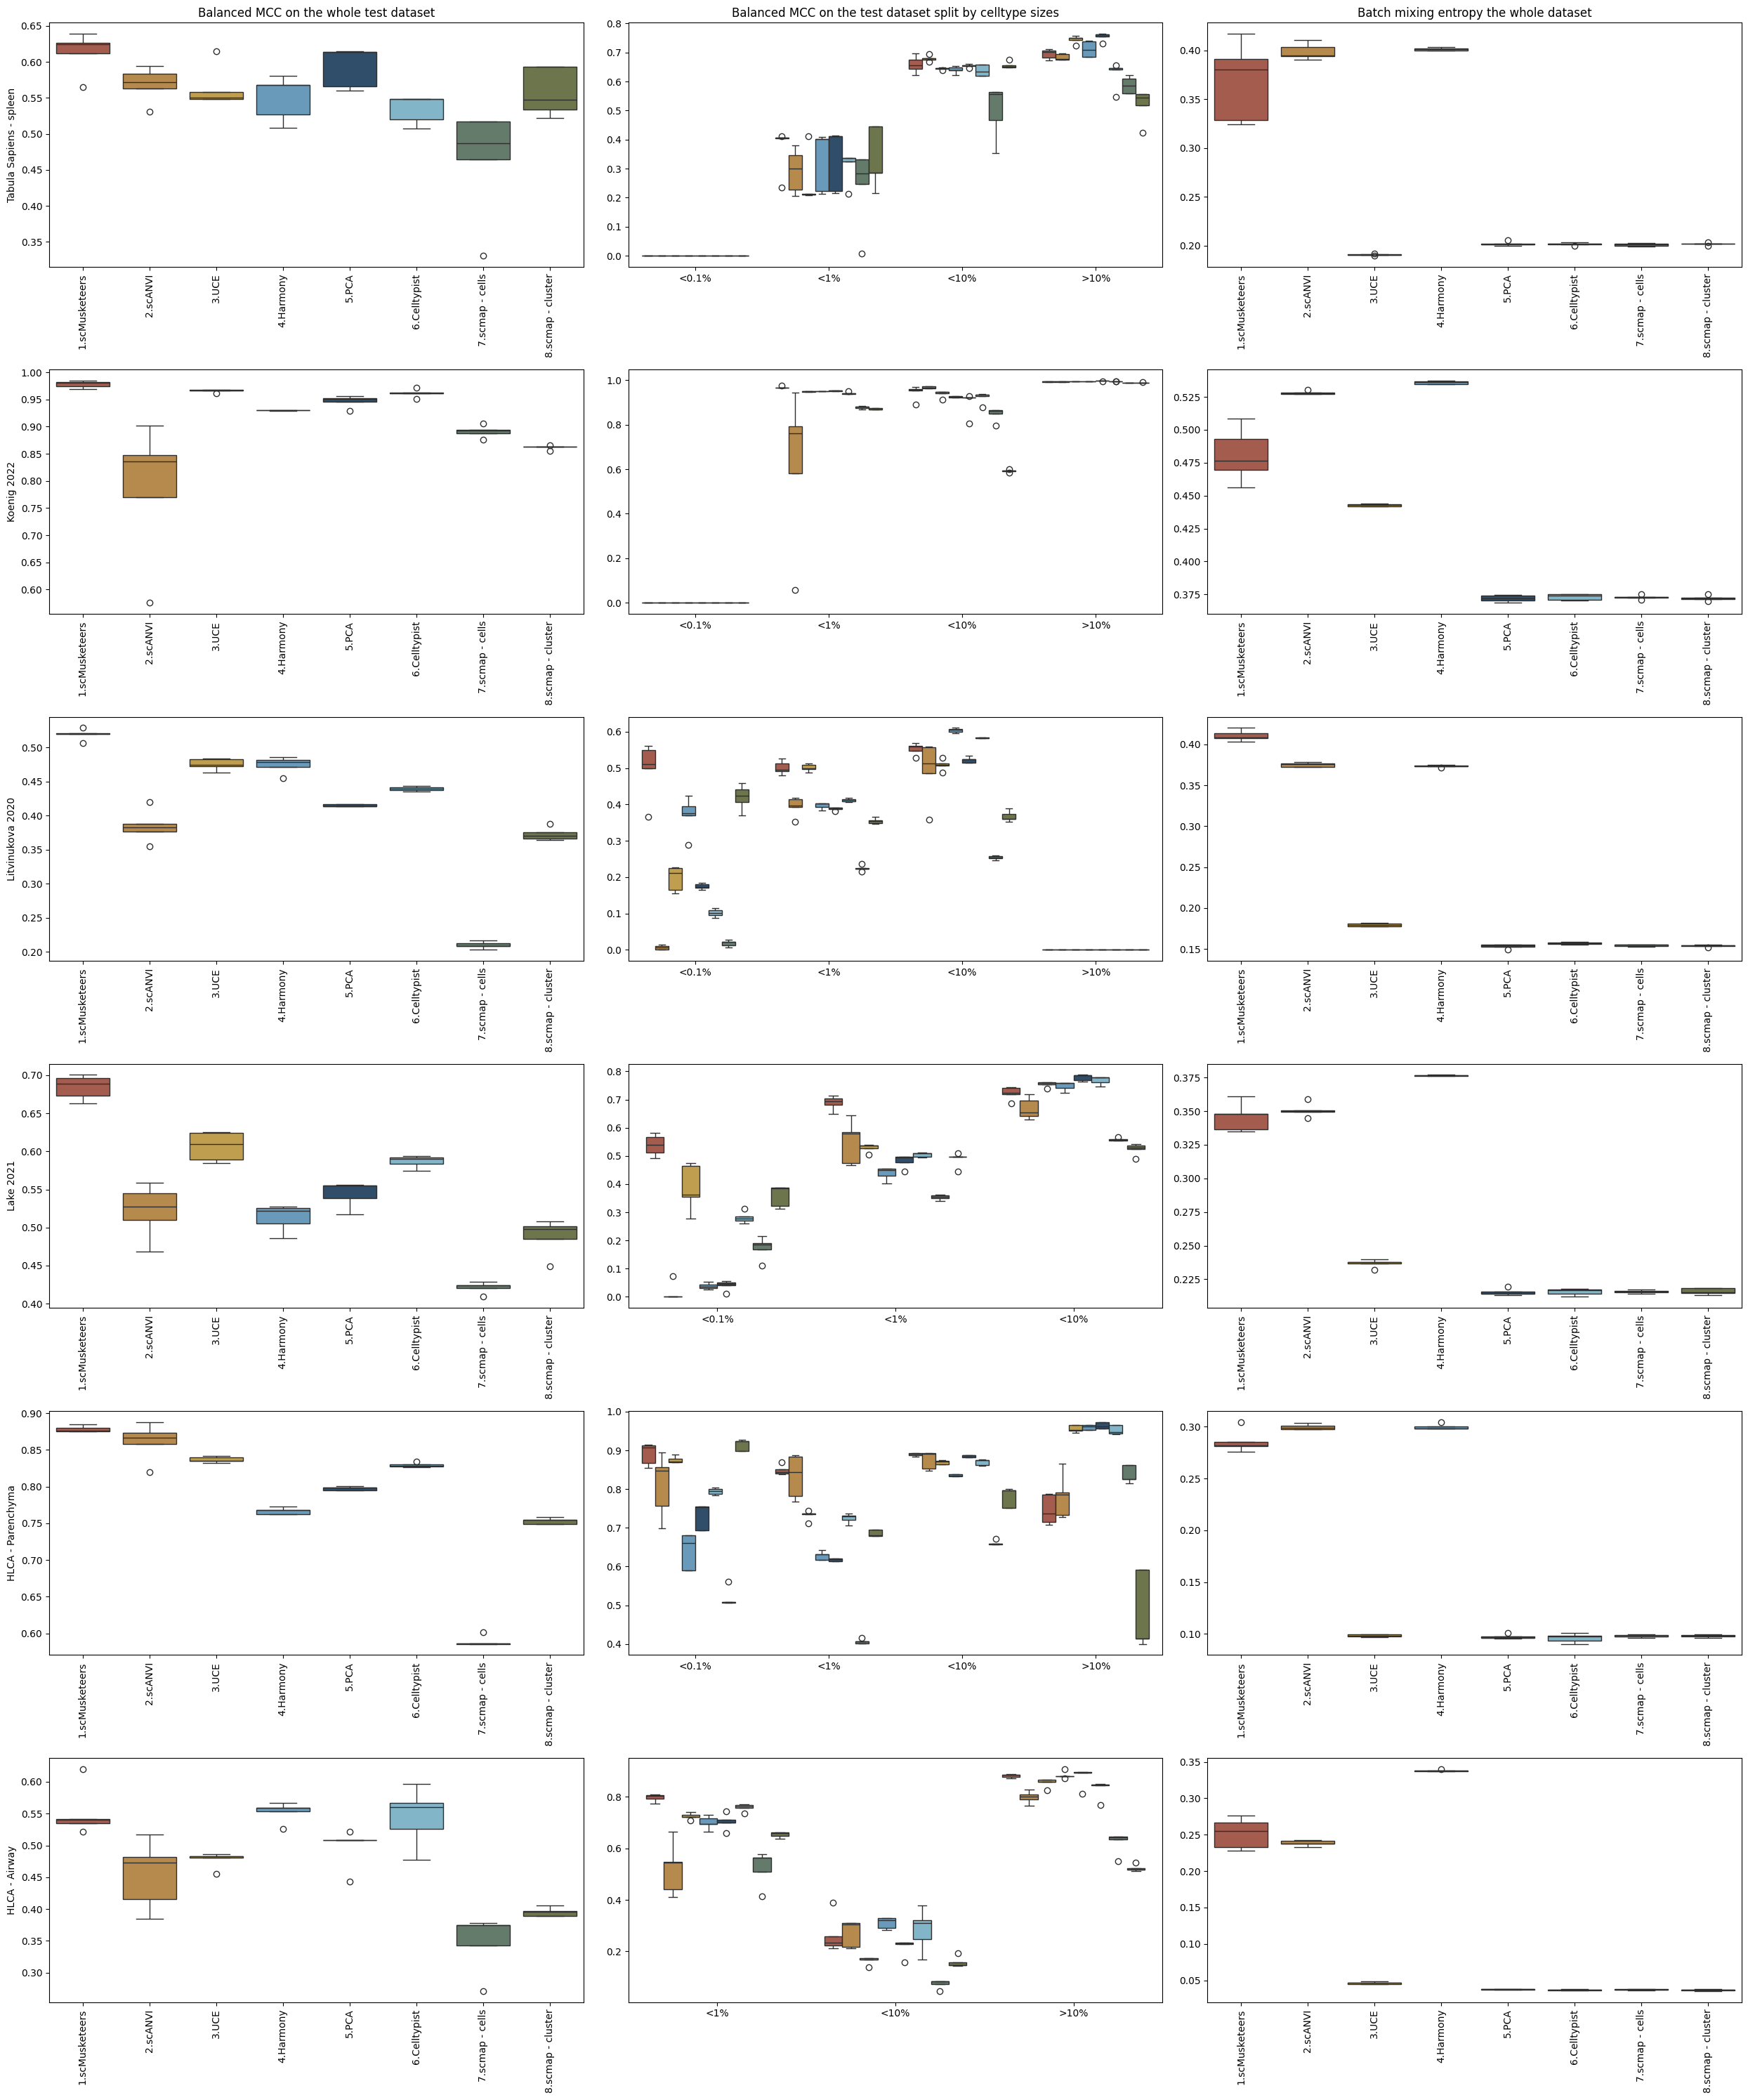

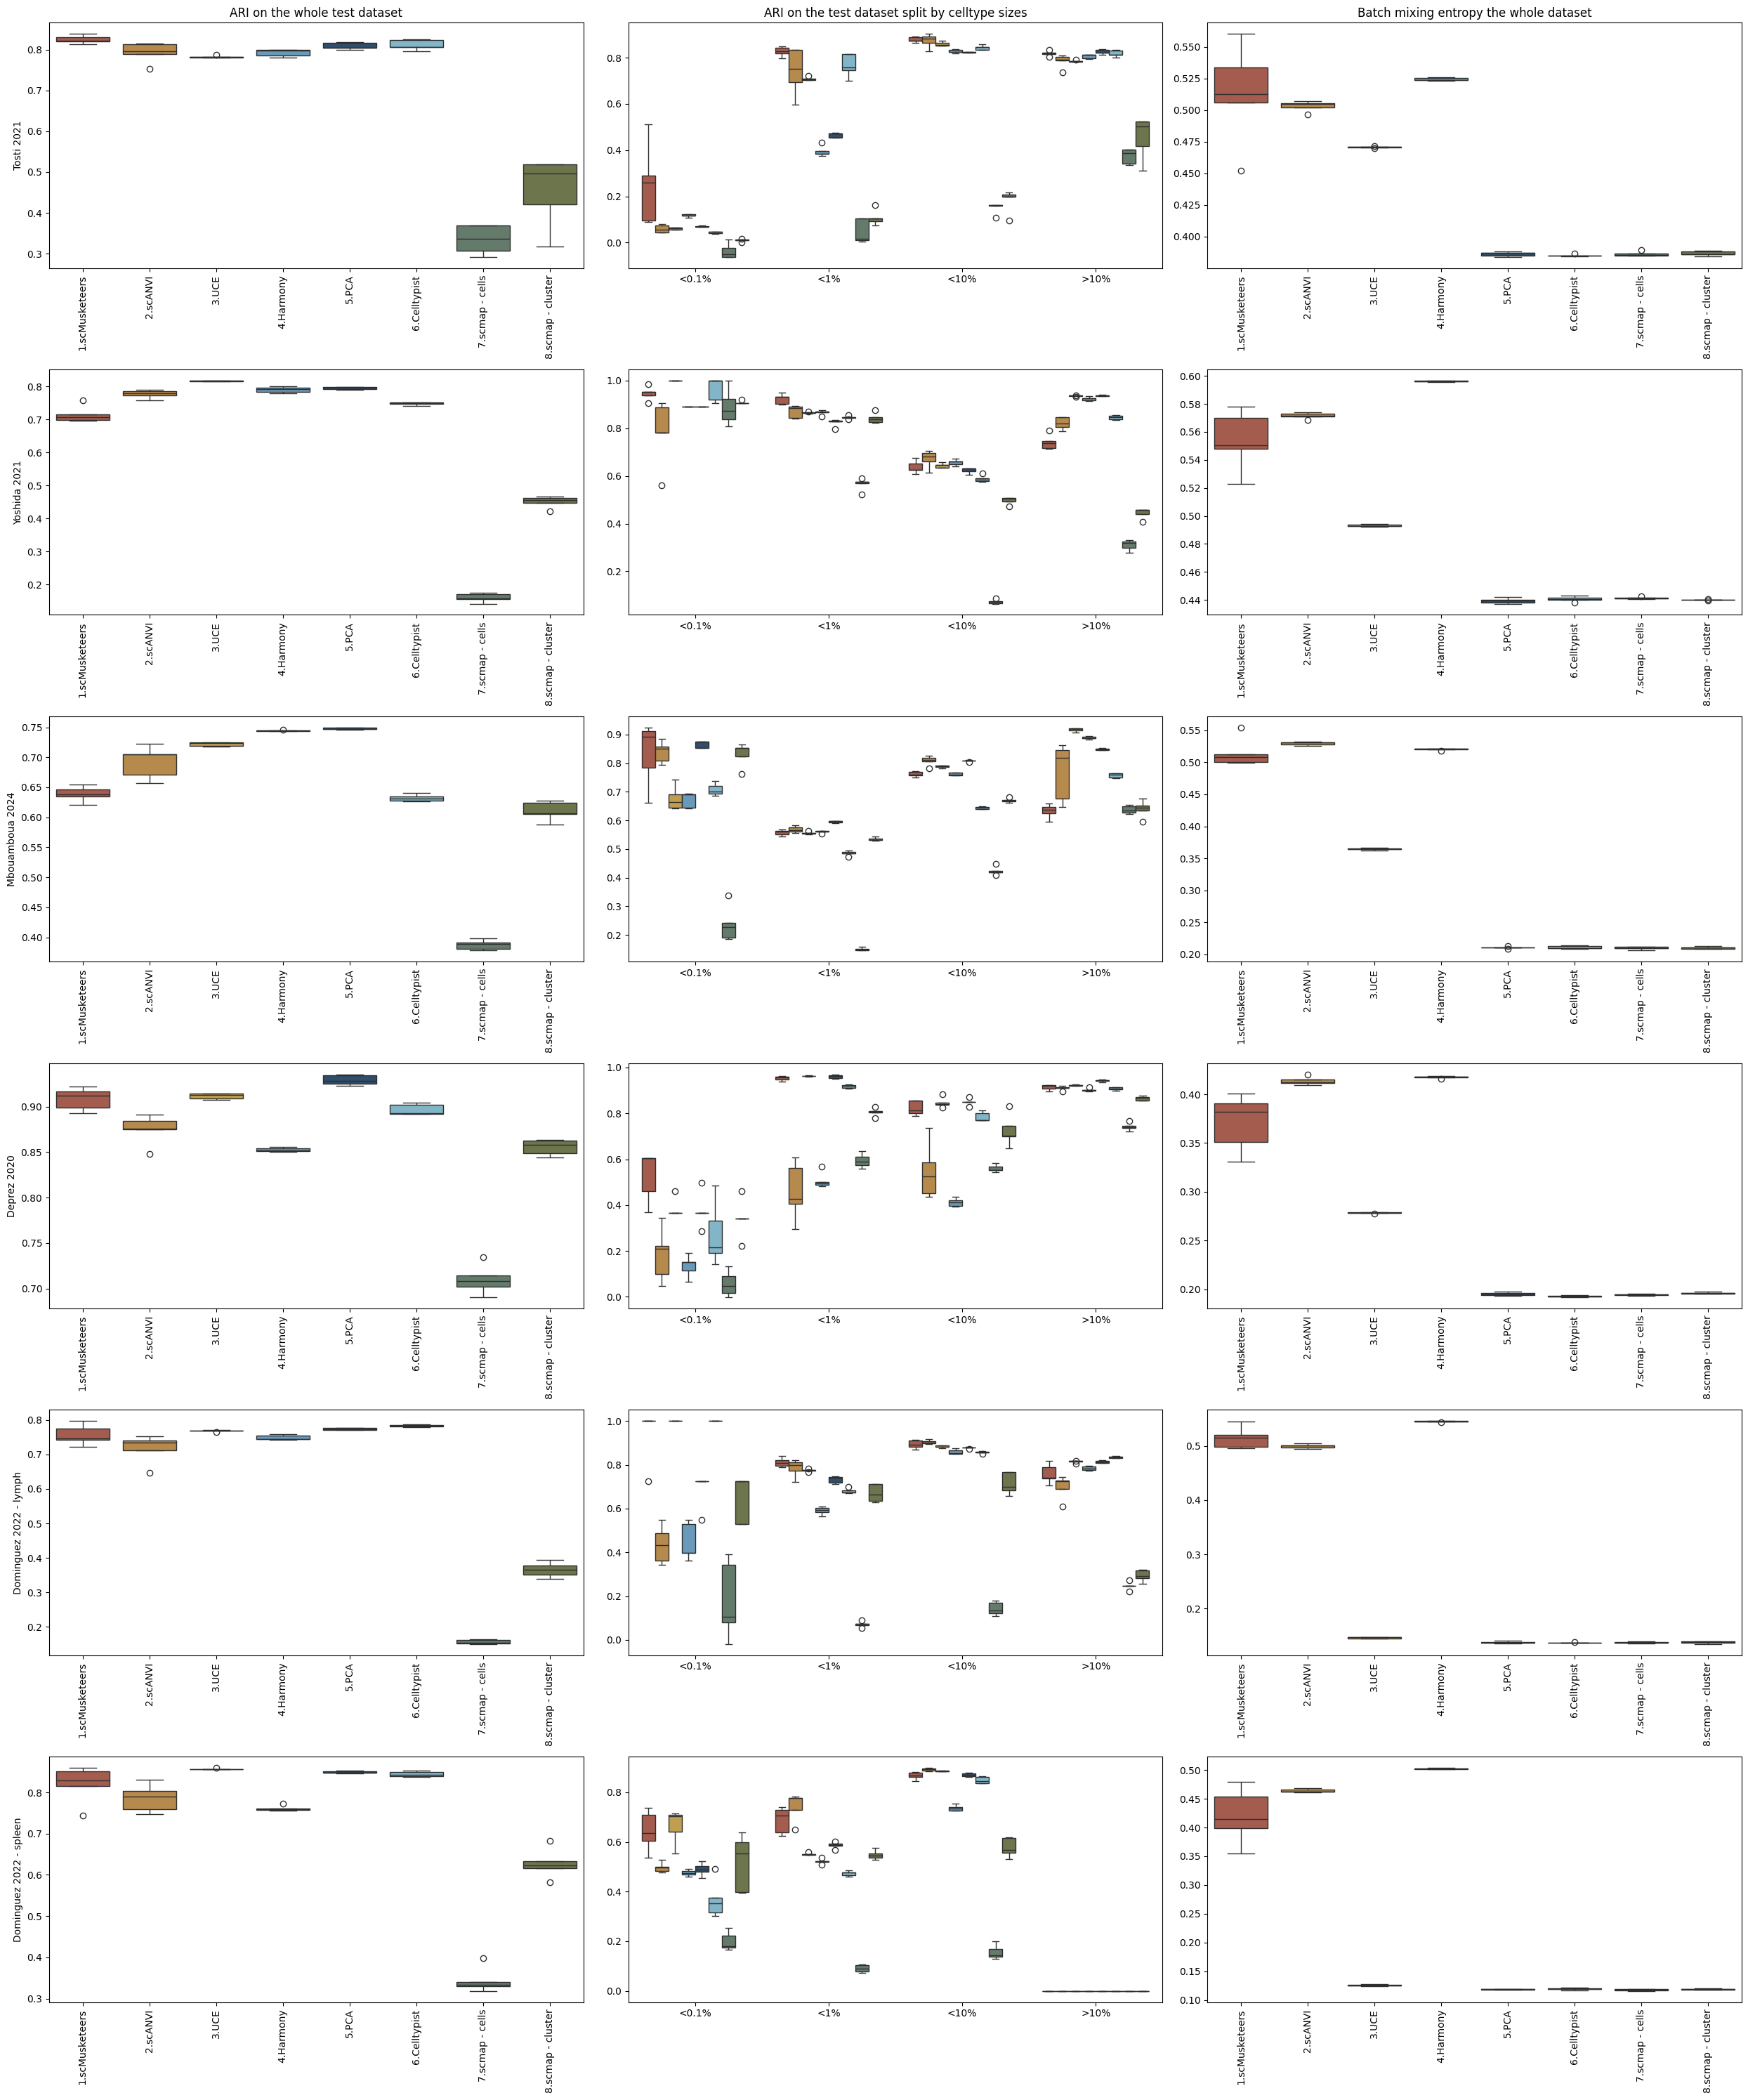

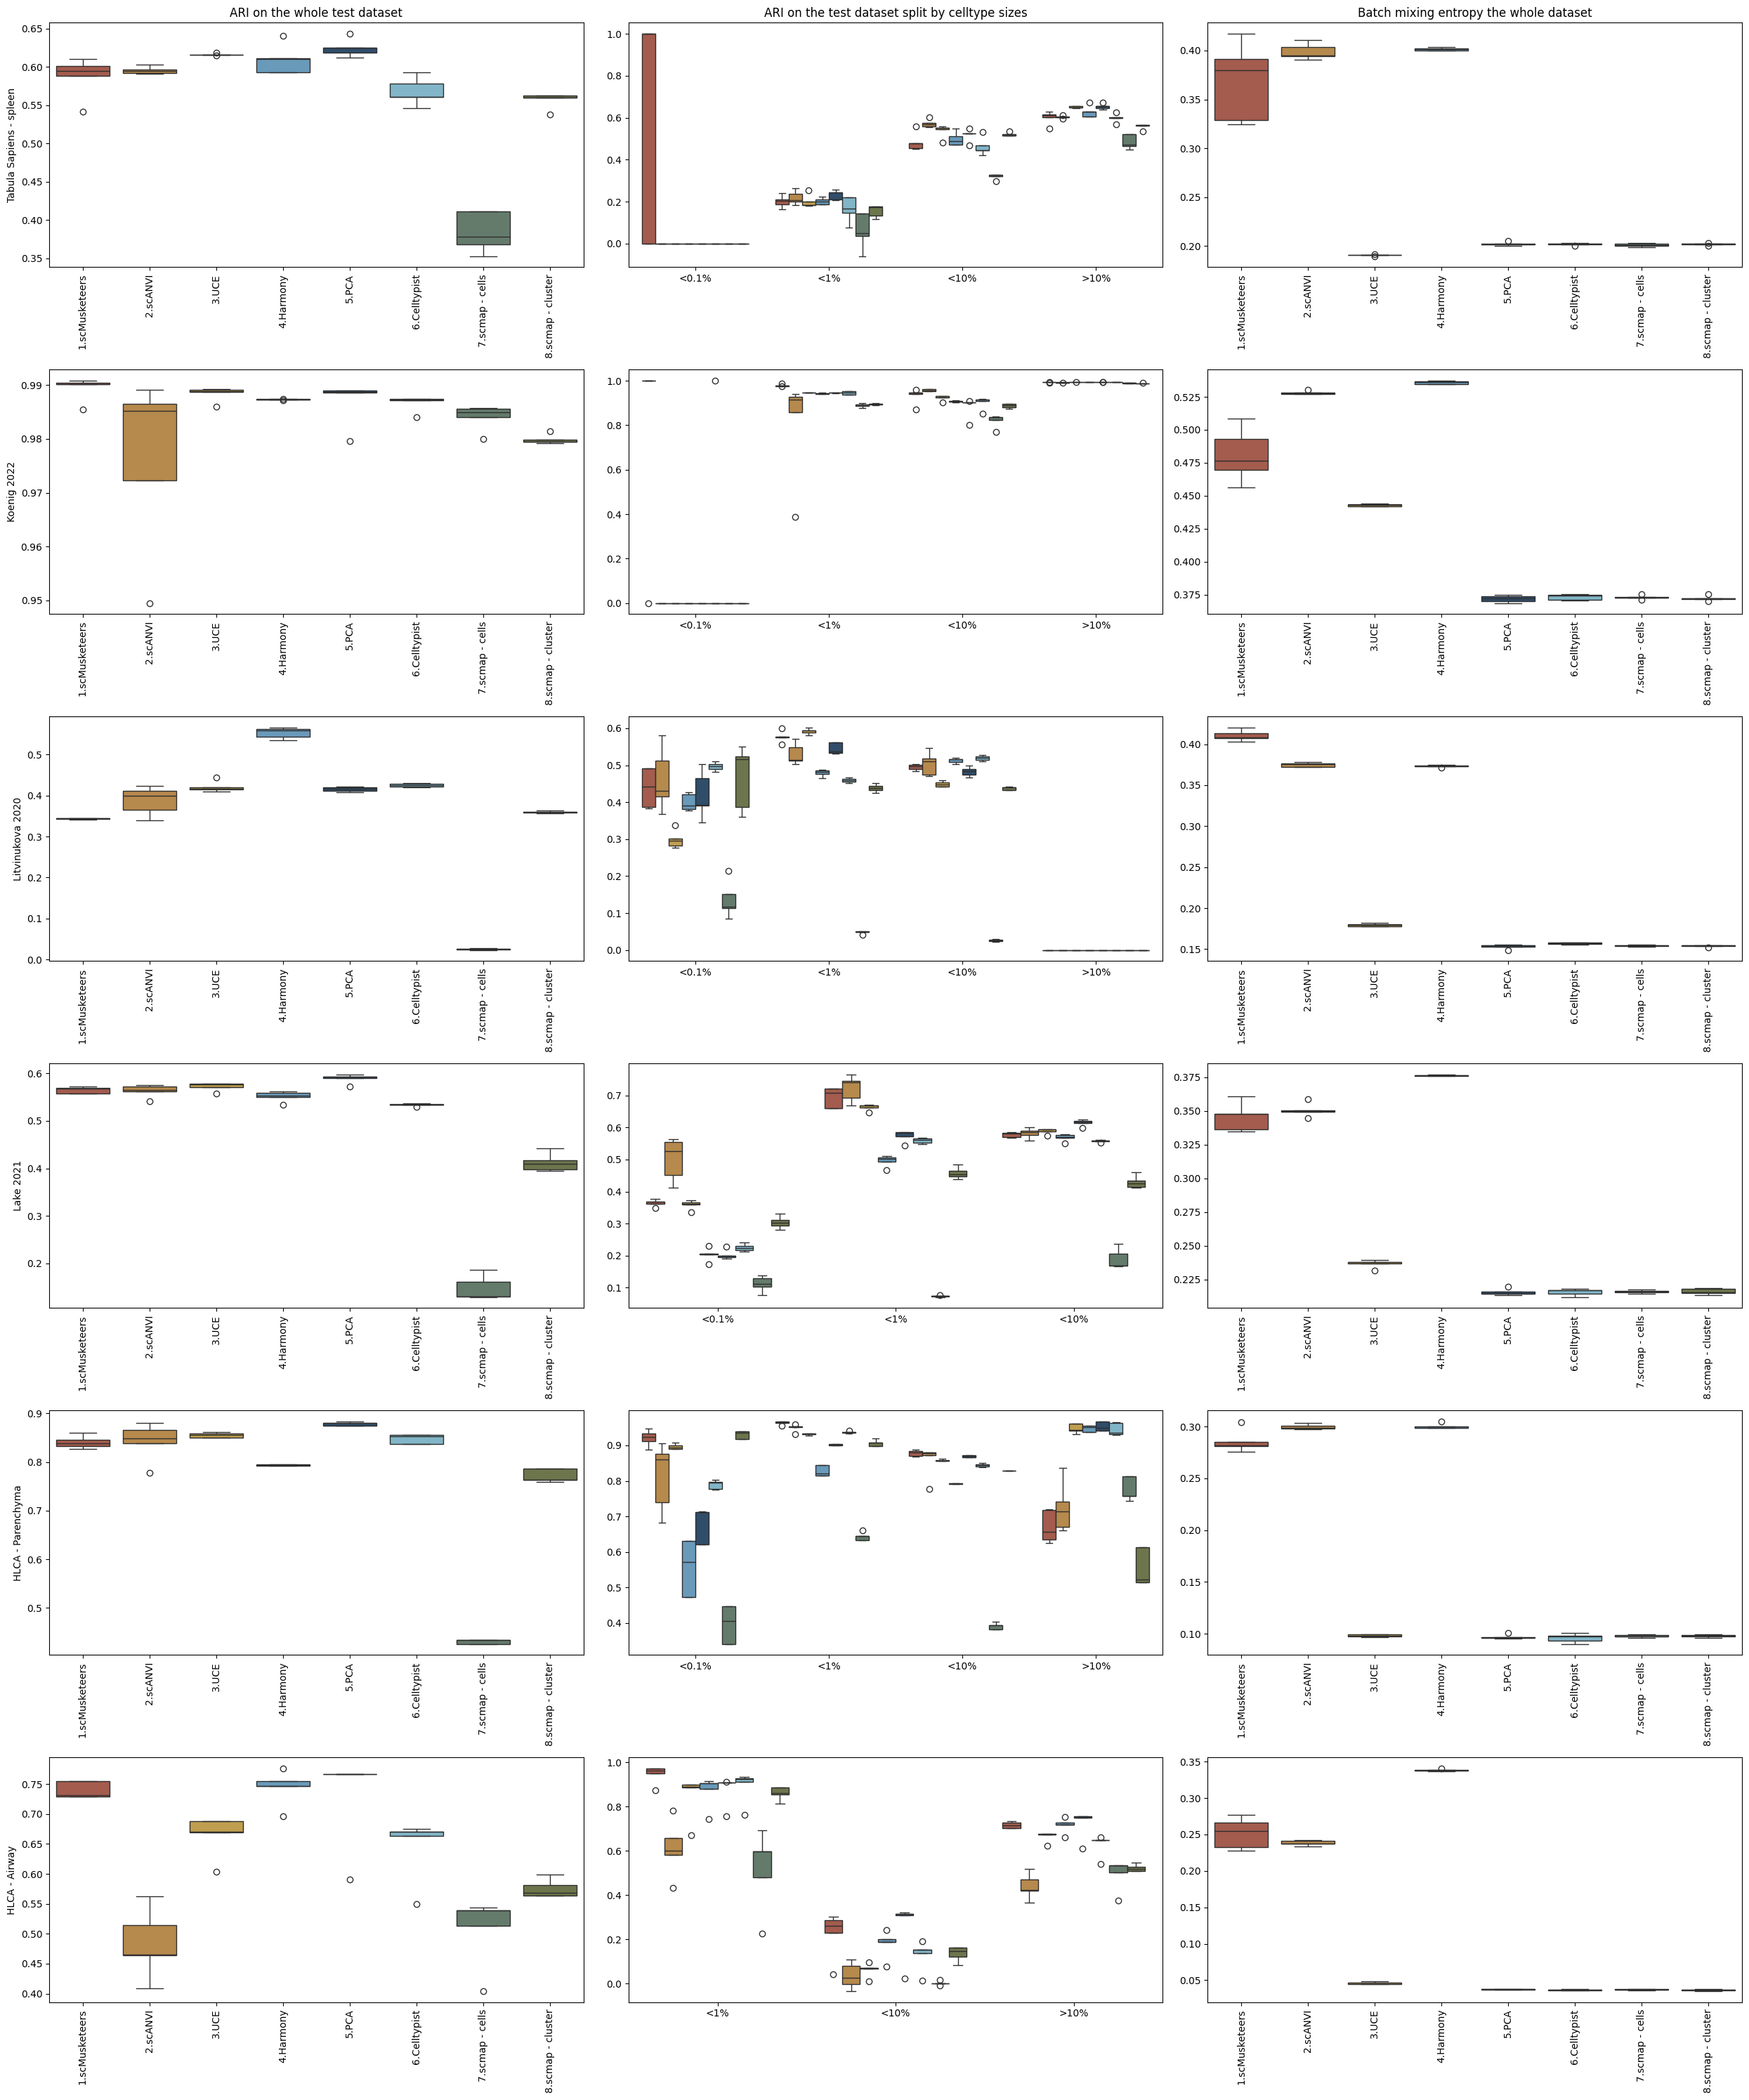

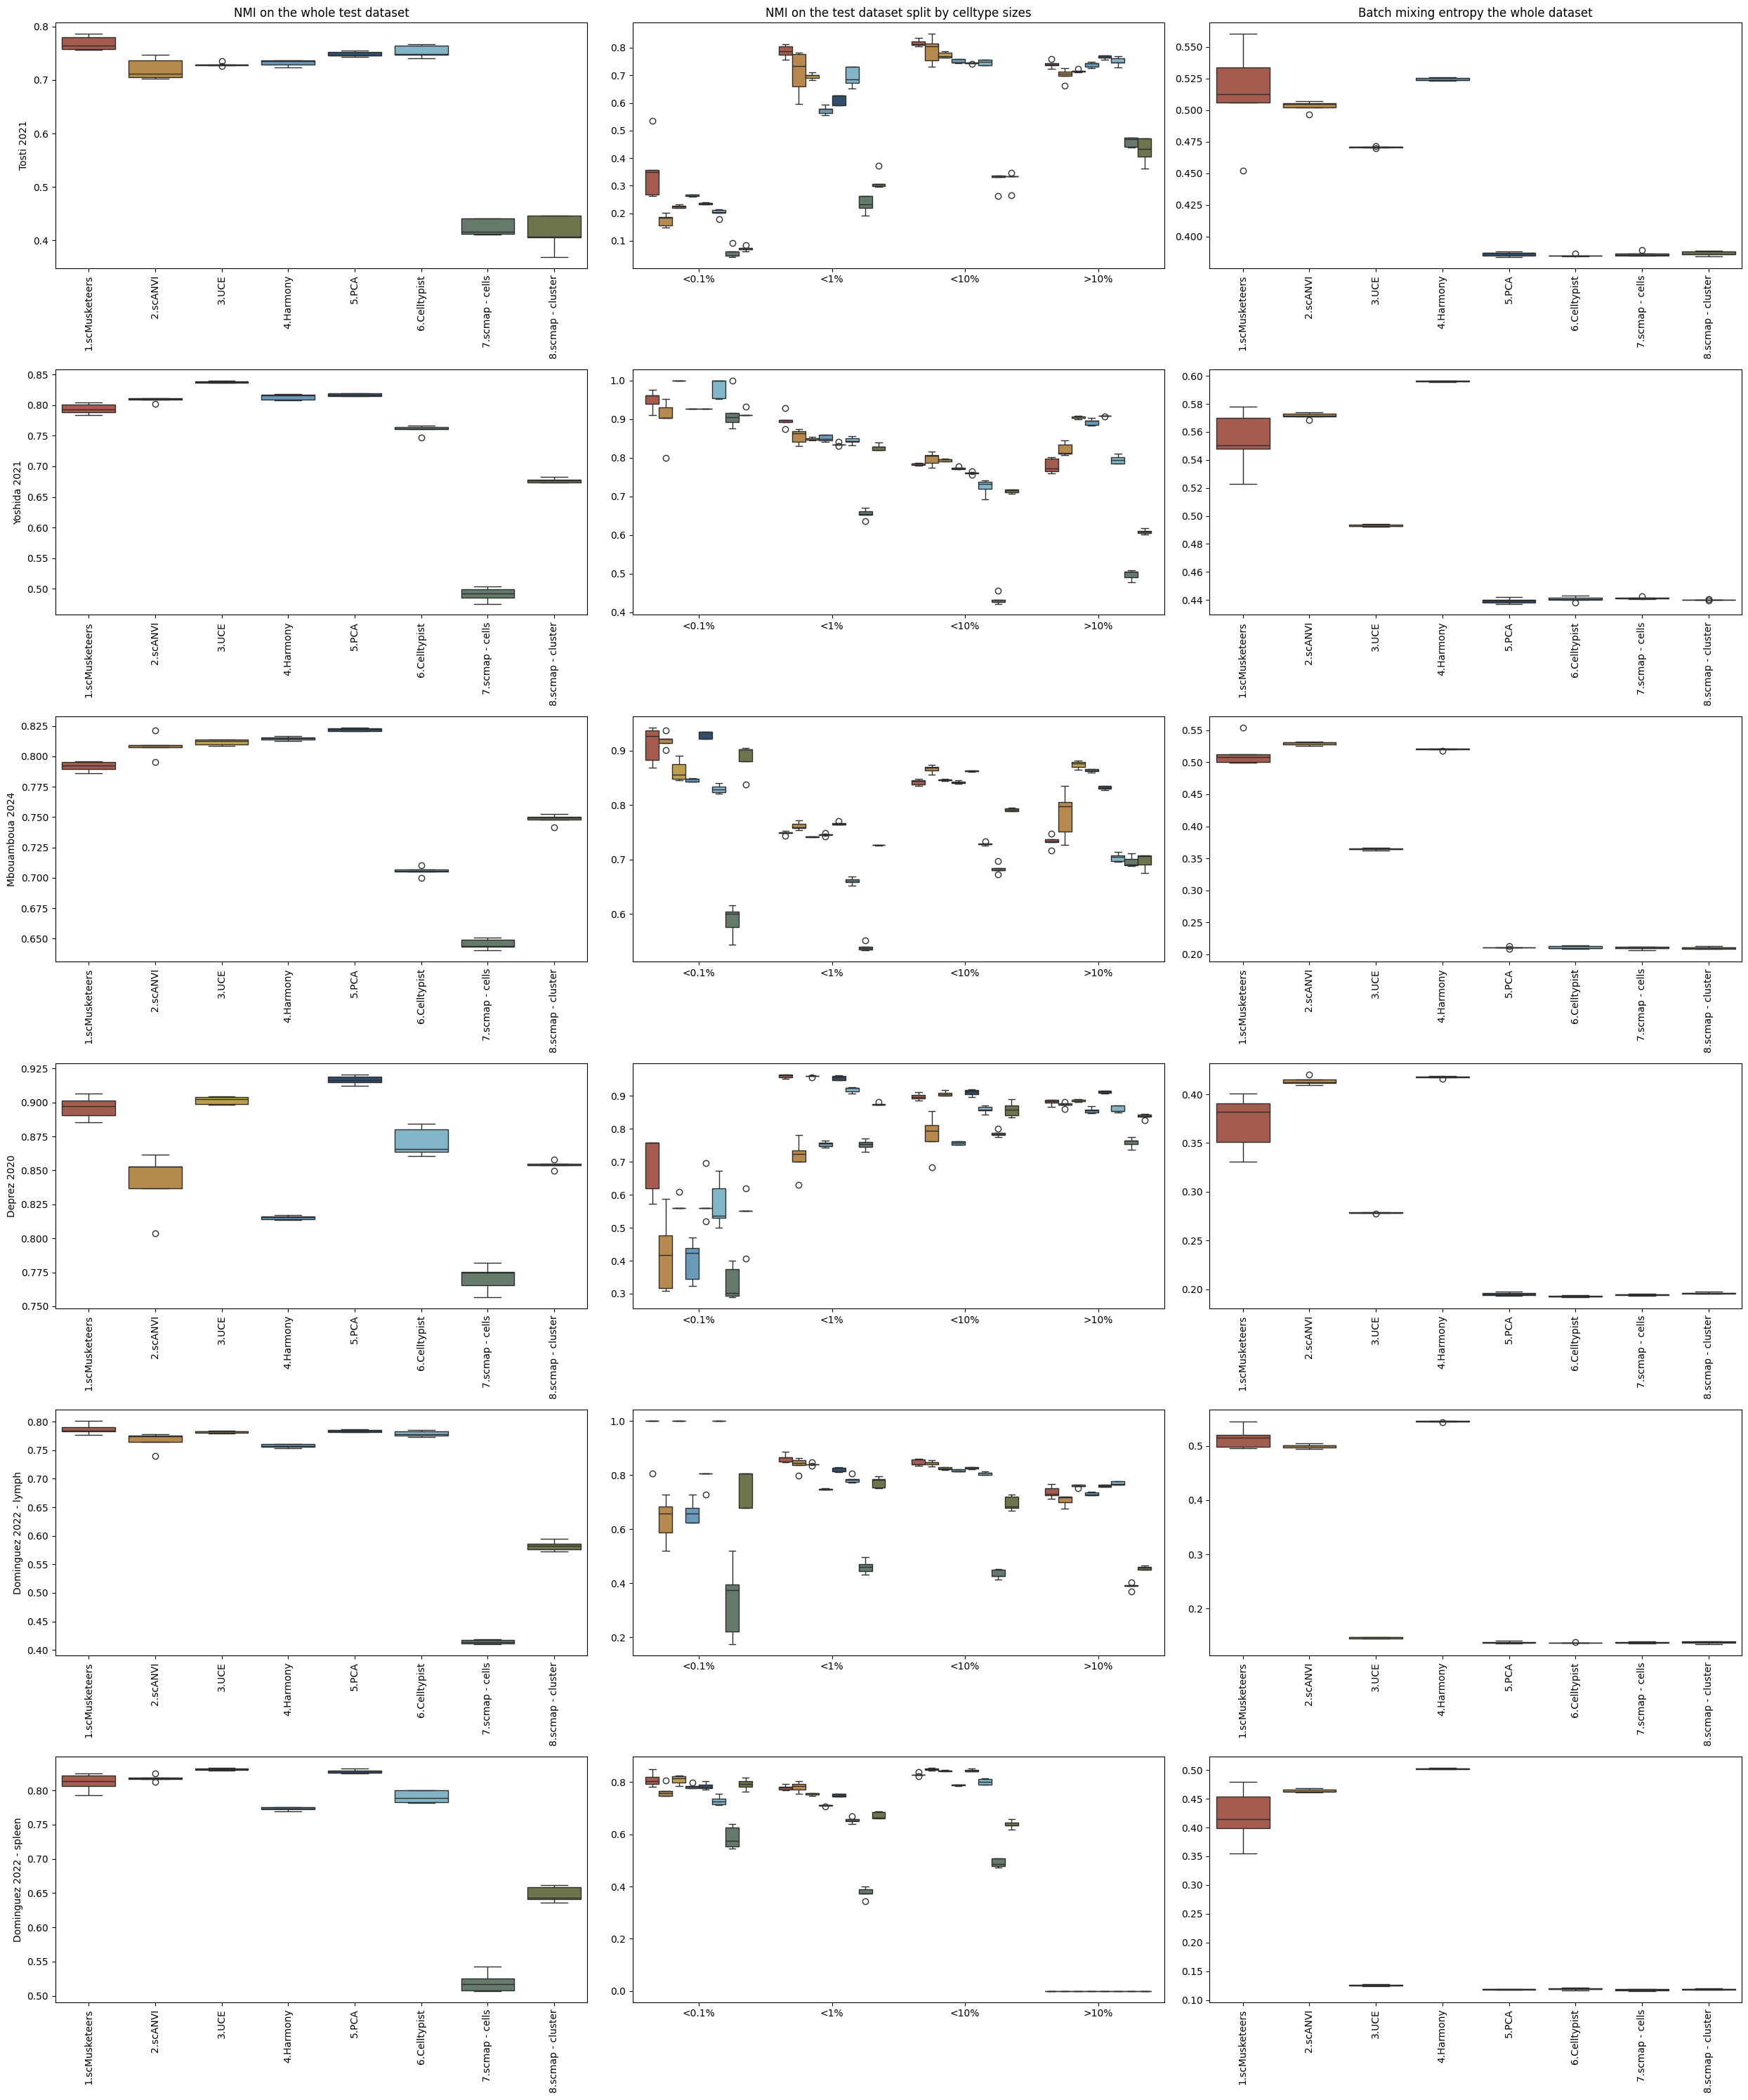

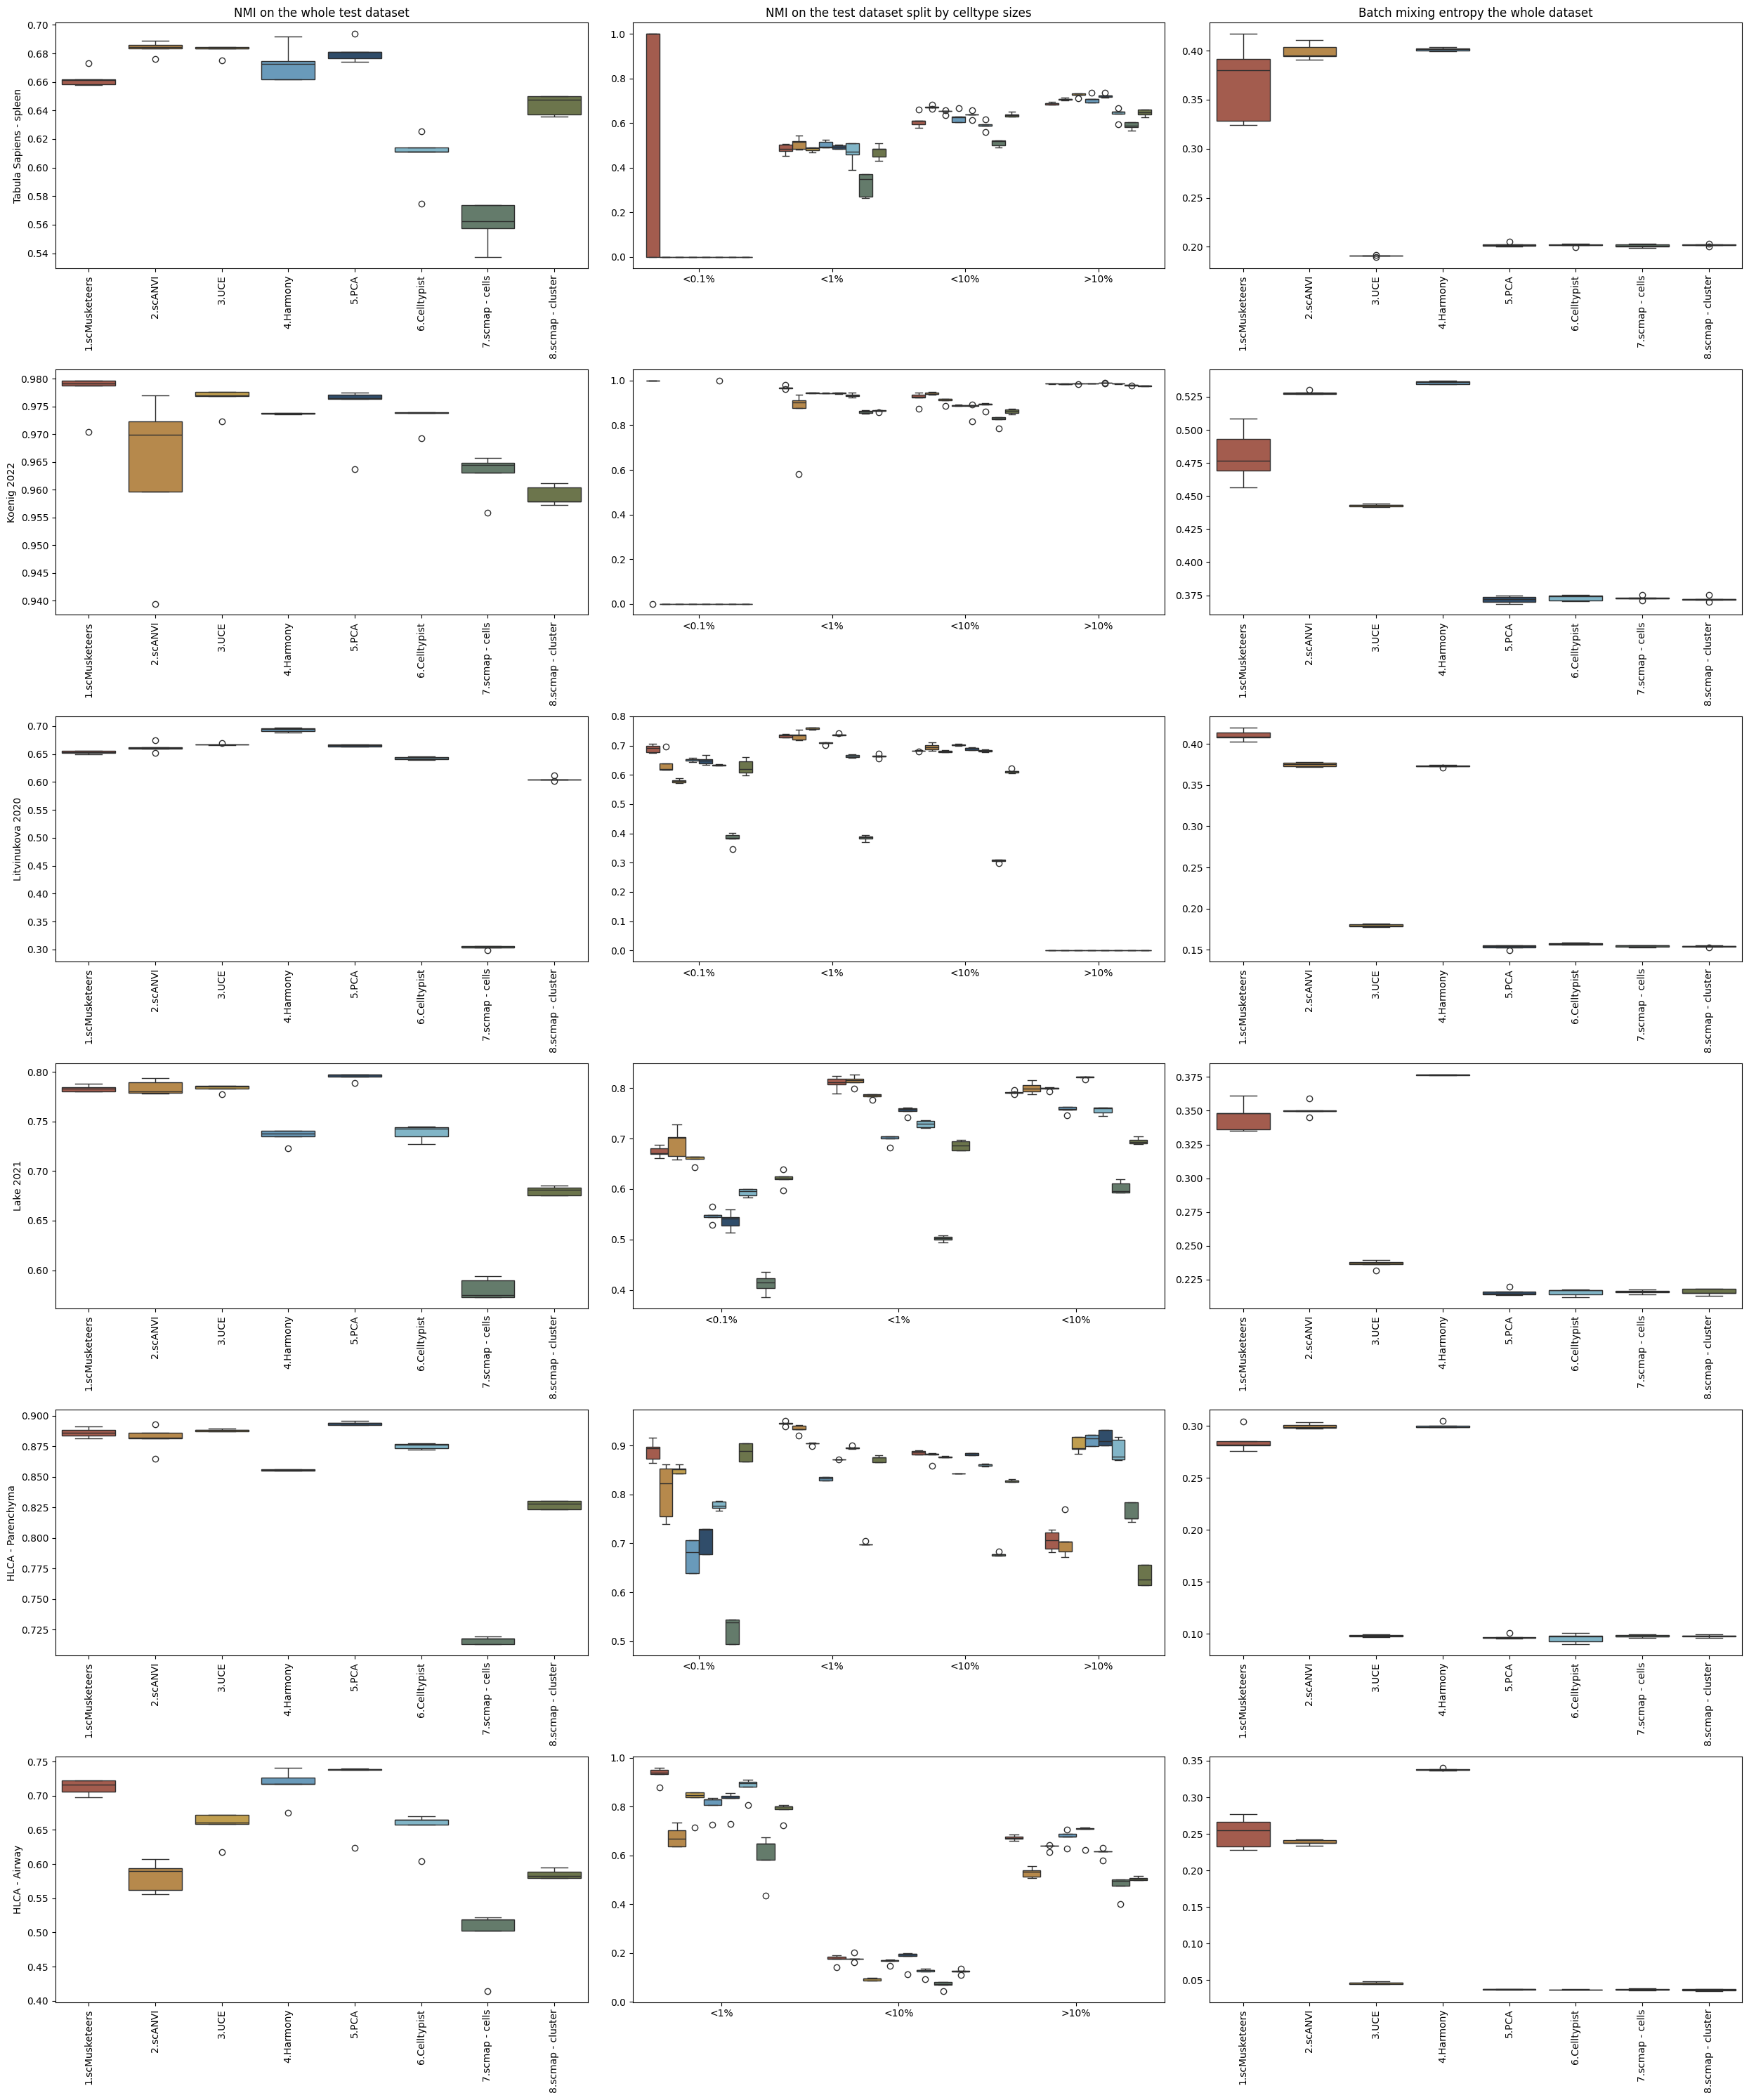

In [12]:
runs_table_df.loc[(runs_table_df['model'] == 'scPermut') & (runs_table_df['use_hvg'] == 3000),'model'] = 'scPermut_default'# VERY IMPORTANT to only consider the default params
split = 'test'
met = 'balanced_acc' # balanced_acc balanced_f1_score

show_legend = False
# exclude_ds = ['tosti_2021', 'koenig_2022', 'litvinukova_2020','hlca_par_dataset_harmonized', 'hlca_trac_dataset_harmonized']
exclude_ds = []
for met in ['acc','f1_score', 'balanced_f1_score', 'mcc', 'balanced_mcc', 'ARI', 'NMI']:
    for diff in diff_dict:
        if diff != 'dataset':
            print(f'--------- {diff} ---------')
            n_lines = max(len([ i for i in diff_dict[diff] if i not in exclude_ds]),2)
            f, axes = plt.subplots(n_lines, 3, figsize = (25,5*n_lines))
            i=0
            for dataset_name in diff_dict[diff]:
                if dataset_name not in exclude_ds:
                    
                    task_1 = runs_table_df.query("task == 'task_1'").query(f"dataset_name == '{dataset_name}'").query(f"test_fold_nb == {test_fold_selection[dataset_name]}").query('deprecated_status != True')# Don't select deprecated versions
                    task_1 = task_1.loc[task_1['model'] != 'scPermut']
                    task_1 = task_1.loc[~((task_1['model'] == 'scPermut_default') & (task_1['training_scheme'] != 'training_scheme_8')),:] # Removing the other training_schemes from the default config
                    task_1 = task_1.loc[~((task_1['model'] == 'scPermut_default') & (task_1['debug_status'] != 'fixed_1')),:]
                    
                    task_1['dataset_name'] =task_1['dataset_name'].replace(aestetic_data_name)
                    task_1['model'] =task_1['model'].replace(aestetic_model_name)
                    
                    # task_1['model'] = pd.Categorical(task_1['model'], ['scPermut', 'scanvi', 'uce', 'pca_svm', 'harmony_svm', 'celltypist', 'scmap_cells', 'scmap_cluster']) 
                    bplot1 = axes[i,0]
                    bplot2 = axes[i,1]
                    bplot3 = axes[i,2]
    
                    metric_name = metric_names[met]

                    
                    sns.boxplot(x = 'model',y =f'{split}_{met}', order = colors.keys(), hue = 'model',hue_order = colors.keys(), data = task_1, ax = bplot1, palette = sns.color_palette(colors.values()))
                    bplot1.tick_params(axis='x', rotation=90)
                    if i == 0:
                        bplot1.set_title(f'{metric_name} on the whole test dataset')
                    if i != n_lines:
                        bplot1.set_xlabel('')
                    if i == n_lines:
                        bplot1.set_xlabel('Model')
                    bplot1.set_ylabel(f'{aestetic_data_name[dataset_name]}') # - {diff} setup')
                    
                    sub =task_1[['model', 'test_fold_nb',f'{split}_{met}', f'{split}_xxsmall_{met}',f'{split}_small_{met}', f'{split}_medium_{met}', f'{split}_large_{met}']]
                    sub = pd.melt(sub, id_vars = 'model', value_vars = [f'{split}_xxsmall_{met}',f'{split}_small_{met}', f'{split}_medium_{met}', f'{split}_large_{met}'])
                    sub = sub.replace({f'{split}_xxsmall_{met}' : '<0.1%',f'{split}_small_{met}':'<1%', f'{split}_medium_{met}':'<10%',f'{split}_large_{met}':'>10%'})
    
                    # sns.lineplot(data=sub, x="variable", y="value", hue = 'model', hue_order = colors.keys(),ax = bplot2,palette = sns.color_palette(colors.values()), markers = True)
                    if dataset_name in ['hlca_trac_dataset_harmonized', aestetic_data_name['hlca_trac_dataset_harmonized']]:
                        ord =  ['<1%','<10%','>10%']
                    elif dataset_name in ['lake_2021', aestetic_data_name['lake_2021']]:
                        ord =  ['<0.1%','<1%','<10%']
                    else :
                        ord = ['<0.1%','<1%','<10%','>10%']
                        
                    sns.boxplot(x='variable',y ='value',hue = 'model',order = ord, hue_order = colors.keys(), data = sub,ax = bplot2, palette = sns.color_palette(colors.values()))
                    bplot2.tick_params(axis='x', rotation=0)
                    bplot2.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0)
                    bplot2.set_ylabel(metric_name)
                    if i == 0:
                        bplot2.set_title(f'{metric_name} on the test dataset split by celltype sizes')
                    if i != n_lines:
                        bplot2.set_xlabel('')
                    if i == n_lines:
                        bplot2.set_xlabel('Celltype size')
                    bplot2.set_ylabel('')
                    
                    sns.boxplot(x = 'model',y =f'full_batch_mixing_entropy', order = colors.keys(), hue = 'model',hue_order = colors.keys(), data = task_1, ax = bplot3, palette = sns.color_palette(colors.values()))
                    bplot3.tick_params(axis='x', rotation=90)
                    bplot3.set_ylabel('') #BE
                    if i == 0:
                        bplot3.set_title('Batch mixing entropy the whole dataset')
                    if i != n_lines:
                        bplot3.set_xlabel('')
                    if i == n_lines:
                        bplot3.set_xlabel('Model')
    
                    if not show_legend: 
                        # bplot1.get_legend().set_visible(False)
                        bplot2.get_legend().set_visible(False)
                        # bplot3.get_legend().set_visible(False)
                    
                    # f.suptitle(f'{dataset_name} - {diff} setup')
                    i+=1
                    plt.tight_layout()
                    dir = f'{fig_dir}task_1/prediction_boxplot/{split}_{met}/'
                    check_dir(dir)
                    f.savefig(dir + f'prediction_boxplot_{diff}.png', transparent=False)
                    
                

In [ ]:
import os
os.getcwd()

## Figure 2

In [13]:
diff_dict = {'homo': ['tosti_2021',  'yoshida_2021', 'htap', 'ajrccm_by_batch'], 
           'assays': ['dominguez_2022_lymph', 'dominguez_2022_spleen', 'tabula_2022_spleen'],
           'suspension': ['koenig_2022', 'litvinukova_2020', 'lake_2021'],
           'datasets': ['hlca_par_dataset_harmonized','hlca_trac_dataset_harmonized']}

In [14]:
# Creating the sub table containing the information for each batch type (cf diff_dict)

runs_table_df.loc[(runs_table_df['model'] == 'scPermut') & (runs_table_df['use_hvg'] == 3000),'model'] = 'scPermut_default'

t1 = pd.DataFrame()
task_dict = {}
for diff in diff_dict:
    if diff != 'dataset':
        print(f'--------- {diff} ---------')
        # n_lines = max(len([ i for i in diff_dict[diff] if i not in exclude_ds]),2)
        # f, axes = plt.subplots(n_lines, 3, figsize = (25,5*n_lines))
        i=0
        sub_task= pd.DataFrame()
        for dataset_name in diff_dict[diff]:
            # if dataset_name not in exclude_ds:
            task_1 = runs_table_df.query("task == 'task_1'").query(f"dataset_name == '{dataset_name}'").query(f"test_fold_nb == {test_fold_selection[dataset_name]}").query('deprecated_status != True')
            task_1 = task_1.loc[task_1['model'] != 'scPermut']
            task_1 = task_1.loc[~((task_1['model'] == 'scPermut_default') & (task_1['training_scheme'] != 'training_scheme_8')),:] # Removing the other training_schemes from the default config
            task_1 = task_1.loc[~((task_1['model'] == 'scPermut_default') & (task_1['debug_status'] != 'fixed_1')),:]
            t1 = pd.concat([t1, task_1])
            sub_task = pd.concat([sub_task, task_1])
    task_dict[diff] = sub_task.copy()

--------- homo ---------
--------- assays ---------
--------- suspension ---------
--------- datasets ---------


(('Tosti 2021', '1.scMusketeers'), ('Tosti 2021', '2.scANVI'))
(('Tosti 2021', '1.scMusketeers'), ('Tosti 2021', '3.UCE'))
(('Tosti 2021', '1.scMusketeers'), ('Tosti 2021', '4.Harmony'))
(('Tosti 2021', '1.scMusketeers'), ('Tosti 2021', '5.PCA'))
(('Tosti 2021', '1.scMusketeers'), ('Tosti 2021', '6.Celltypist'))
(('Tosti 2021', '1.scMusketeers'), ('Tosti 2021', '7.scmap - cells'))
(('Tosti 2021', '1.scMusketeers'), ('Tosti 2021', '8.scmap - cluster'))
(('Yoshida 2021', '1.scMusketeers'), ('Yoshida 2021', '2.scANVI'))
(('Yoshida 2021', '1.scMusketeers'), ('Yoshida 2021', '3.UCE'))
(('Yoshida 2021', '1.scMusketeers'), ('Yoshida 2021', '4.Harmony'))
(('Yoshida 2021', '1.scMusketeers'), ('Yoshida 2021', '5.PCA'))
(('Yoshida 2021', '1.scMusketeers'), ('Yoshida 2021', '6.Celltypist'))
(('Yoshida 2021', '1.scMusketeers'), ('Yoshida 2021', '7.scmap - cells'))
(('Yoshida 2021', '1.scMusketeers'), ('Yoshida 2021', '8.scmap - cluster'))
(('Mbouamboua 2024', '1.scMusketeers'), ('Mbouamboua 2024', 

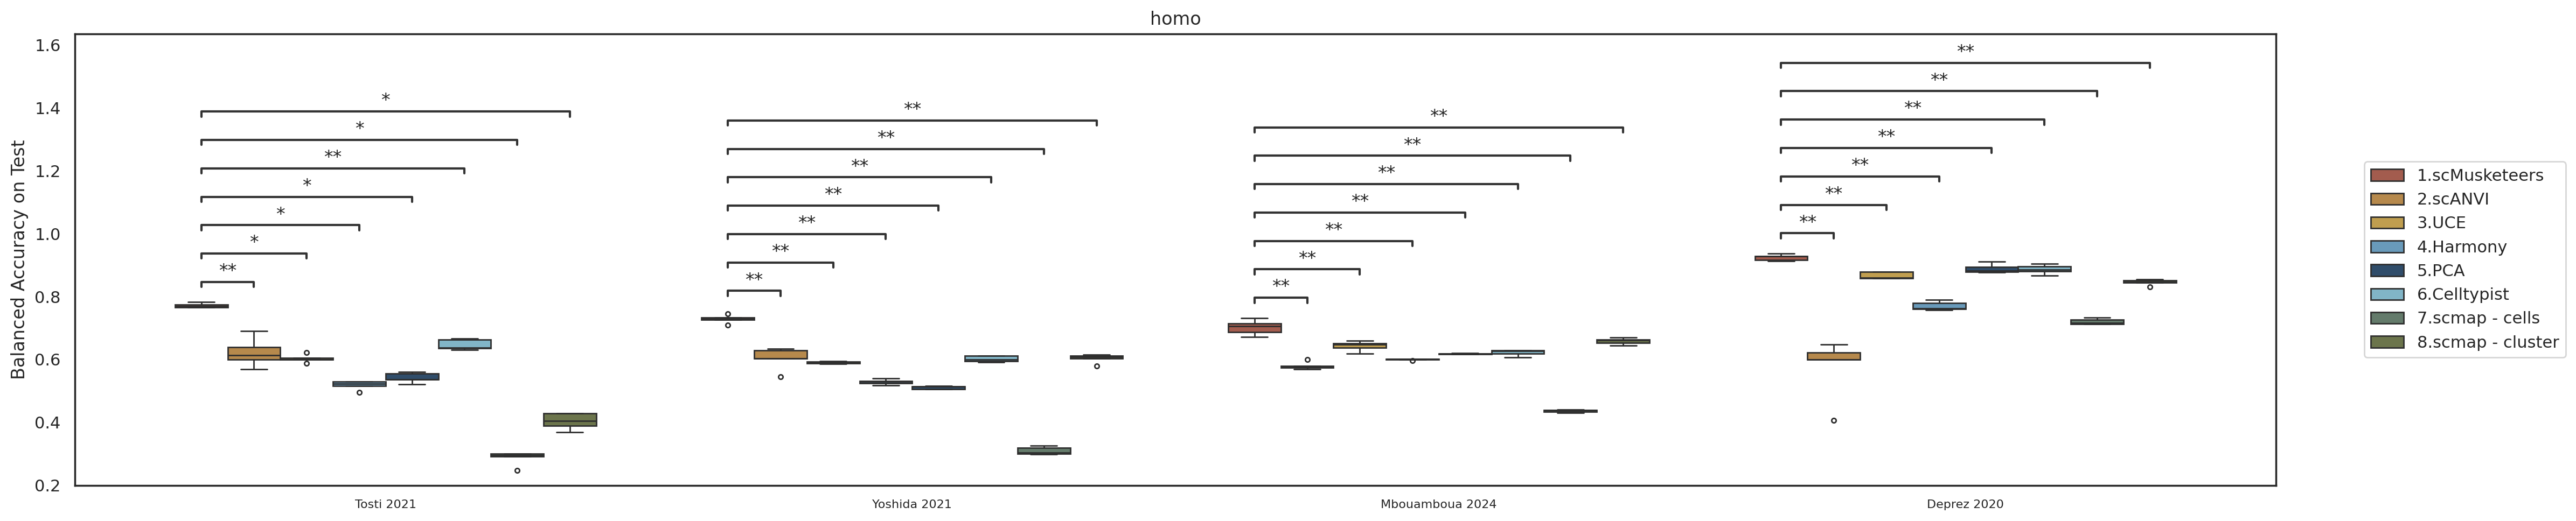

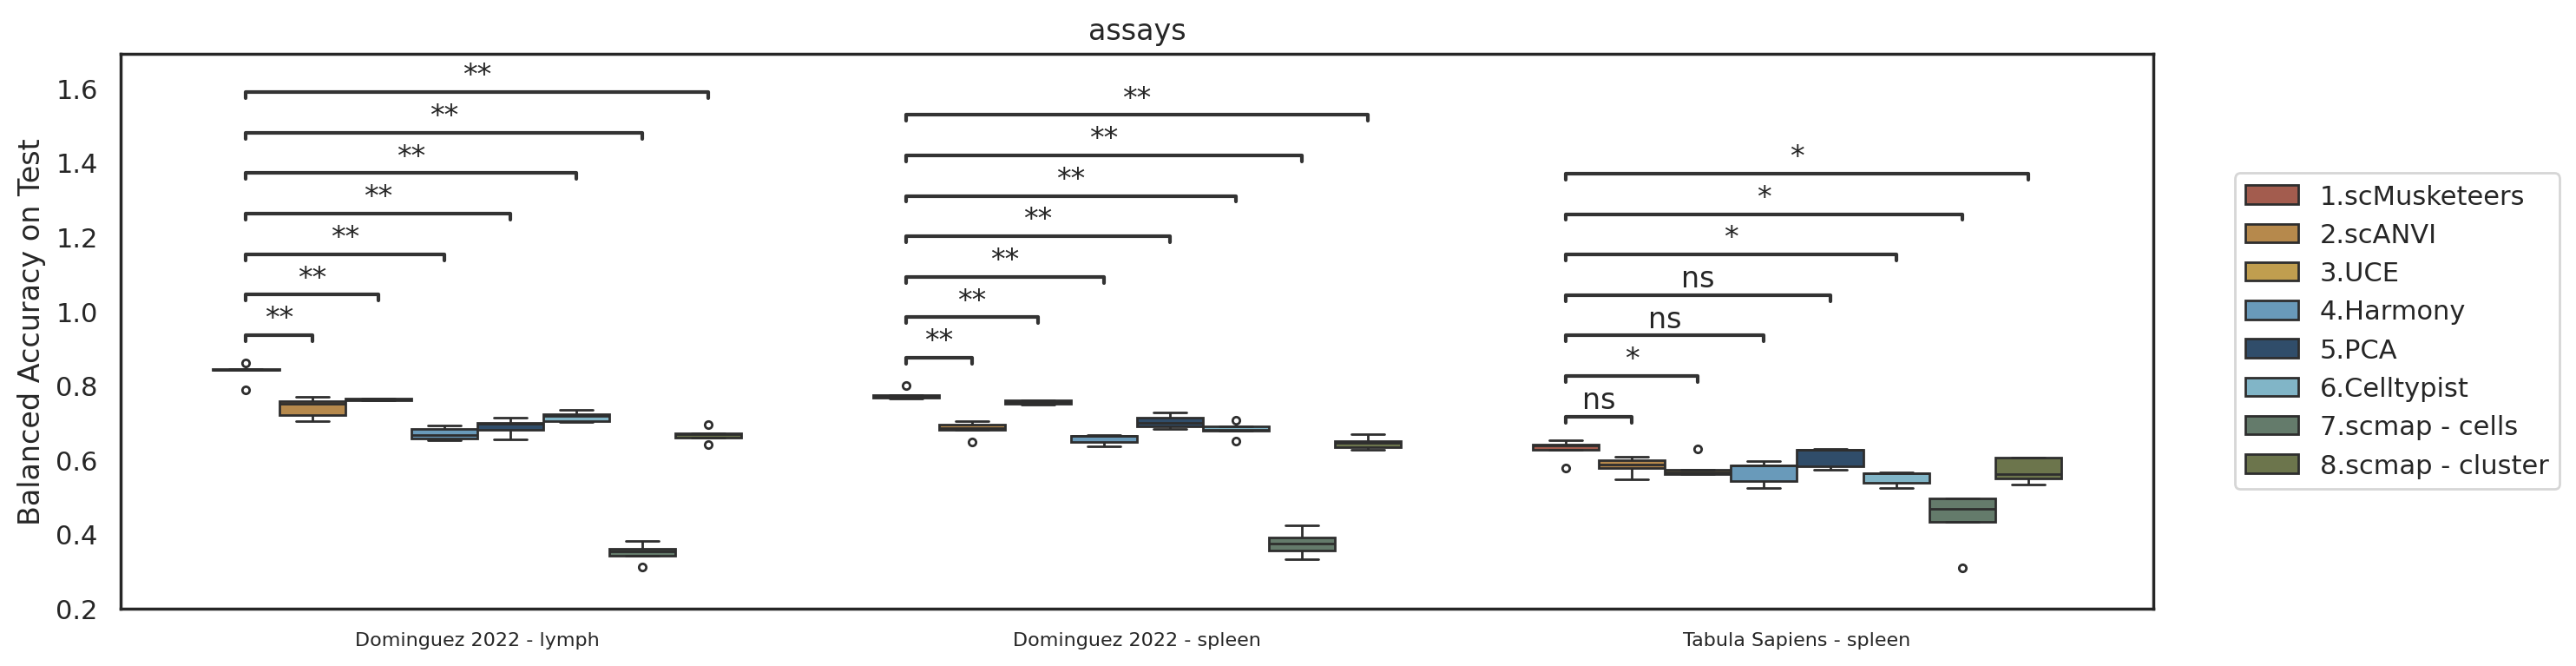

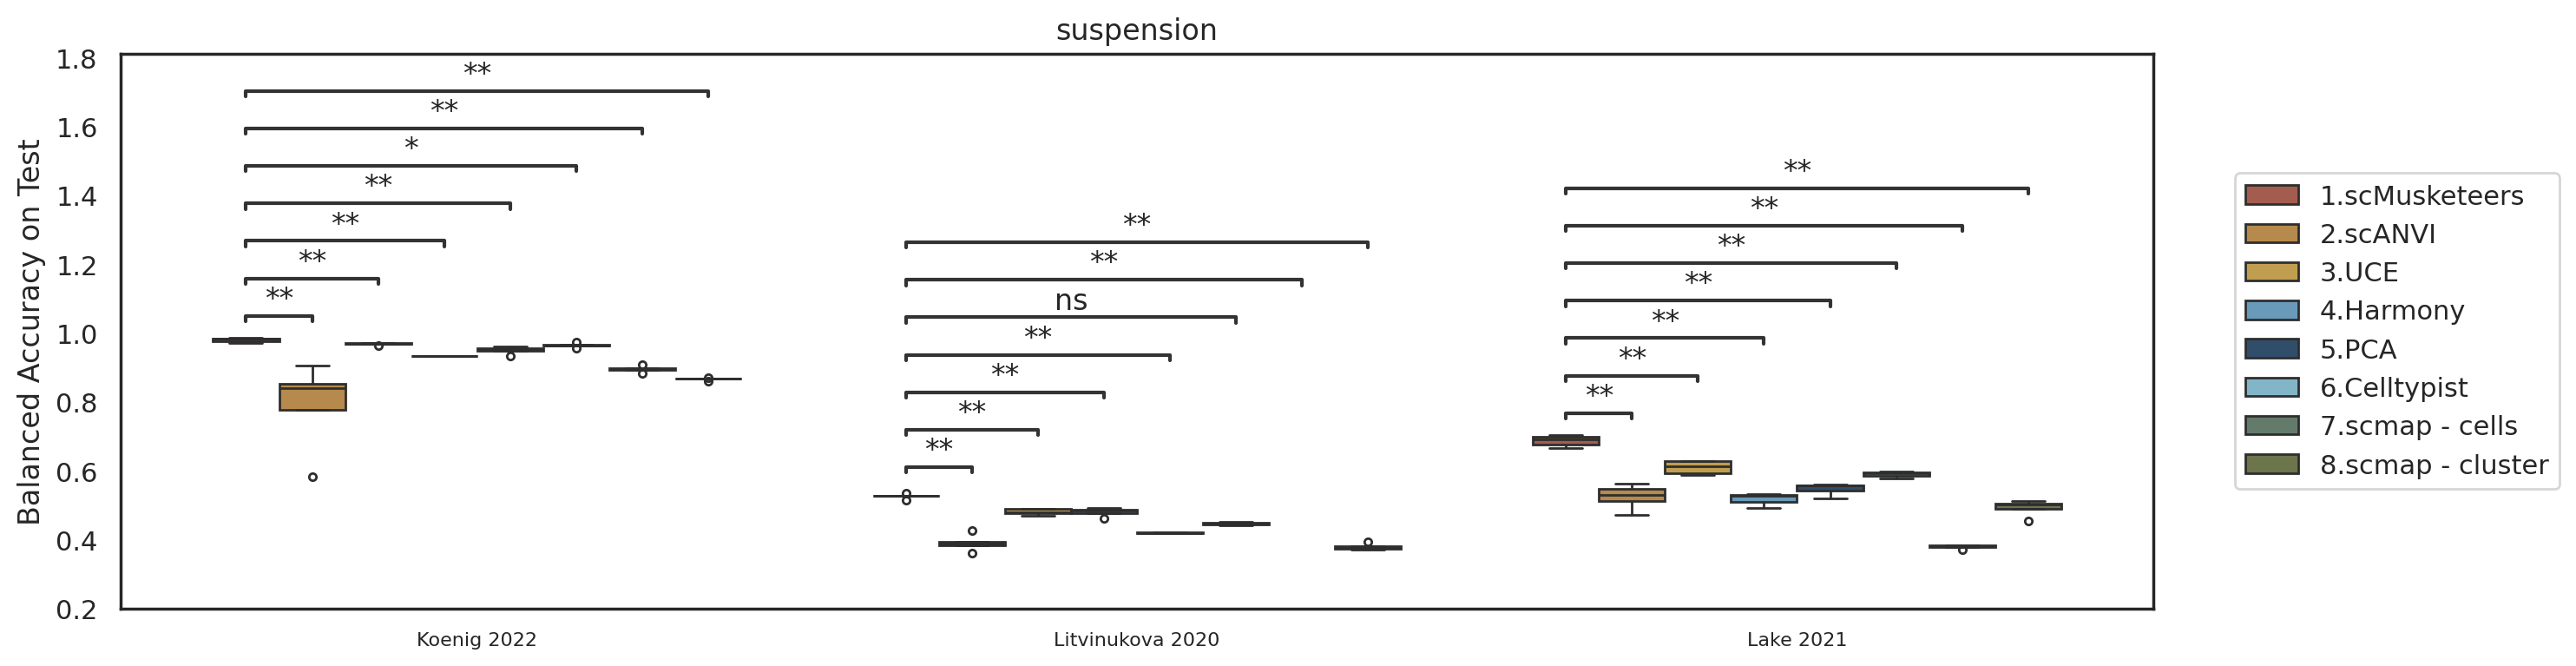

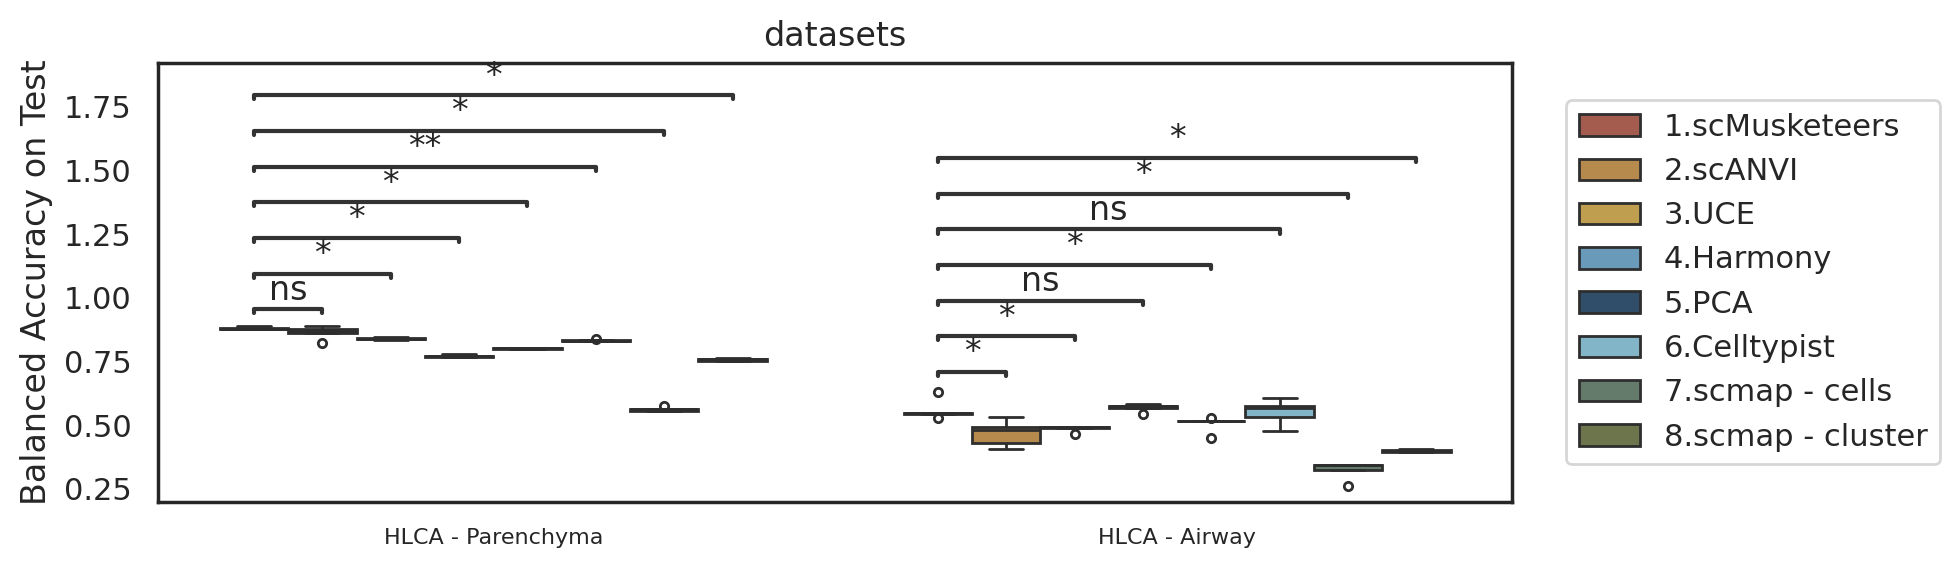

In [71]:
# Plotting acc boxplot from Figure 2 

aestetic_model_name = {'scPermut_default' : '1.scMusketeers',
                        'scanvi' : '2.scANVI',
                       'uce' : '3.UCE', 
                       'harmony_svm' : '4.Harmony',
                       'pca_svm' : '5.PCA',
                        'celltypist' : '6.Celltypist',
                       'scmap_cells' : '7.scmap - cells',
                       'scmap_cluster' : '8.scmap - cluster'}
colors = {
          'scPermut_default' : "#B15240",
          'scanvi':"#C78C3B" ,
          'uce':"#D3A53C" ,
          'harmony_svm': "#5B9DC7",
          'pca_svm':"#264D74",
          # 'pca_knn':"#264D80",
          'celltypist': "#75BAD3",
          'scmap_cells':"#607F6A" ,
          'scmap_cluster':"#707C45"}

colors = {aestetic_model_name[k]: v for k, v in colors.items()}

split = 'test'
# met = 'balanced_acc' 

i = 0
xsizes =  [24,15,15,10]
ysizes = [5,4,4,3]
for met in ['balanced_acc']:#, 'acc','f1_score', 'balanced_f1_score', 'mcc', 'balanced_mcc', 'ARI', 'NMI']: # Select the wanted metric here
    i=0
    for comp, df in task_dict.items():
        df = df.copy()
        df = df[df['model'] != 'scPermut']
        sns.set_theme(style="white")
        n_dataset = df['dataset_name'].nunique()
        f, ax = plt.subplots(1, figsize = (xsizes[i],ysizes[i]),dpi = 200)
    
        metric_name = metric_names[met]
        
        df['dataset_name'] = df['dataset_name'].replace(aestetic_data_name)
        df['model'] = df['model'].replace(aestetic_model_name)
        # print(df['model'].value_counts())
        sns.boxplot(x = 'dataset_name',y =f'{split}_{met}',  hue = 'model',data = df, hue_order = colors.keys(),  ax =ax, palette = sns.color_palette(colors.values()), orient ='v', flierprops={"marker": "."},
        )
        ax.tick_params(axis='x', rotation=0, labelsize=8)
        
        ax.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0)
        ax.set_ylabel(f'{metric_name} on Test')
        ax.set_xlabel(f'')
        ax.set(ylim = (0.2,1))
        ax.set_title(comp)

        # Add stat bars
        pairs = []
        for dataset in df['dataset_name'].unique():
            for k in range(1, len(colors.keys())):
                pair = (dataset, list(colors.keys())[0]), (dataset, list(colors.keys())[k])
                print(pair)
                pairs.append(pair)
            
        order = list(aestetic_model_name.keys())
        annotator = Annotator(ax, pairs, data=df, x='dataset_name', y=f'{split}_{met}', hue = 'model', hue_order = colors.keys())
        annotator.configure(test='Mann-Whitney', text_format='star', loc='inside')
        annotator.apply_and_annotate()
    
        plt.tight_layout()
        i+=1
        dir = f'{fig_dir}task_1/prediction_boxplot/{split}_{met}/'
        check_dir(dir)
        ax.get_figure().savefig(dir + f'prediction_boxplot_{comp}.png', transparent=False)


In [65]:
aestetic_model_name = {
                       'scPermut_default' : '1.scMusketeers',
                        'scanvi' : '2.scANVI',
                       'uce' : '3.UCE', 
                       'harmony_svm' : '4.Harmony',
                       'pca_svm' : '5.PCA',
                        'celltypist' : '6.Celltypist',
                       'scmap_cells' : '7.scmap - cells',
                       'scmap_cluster' : '8.scmap - cluster'}
colors = {
          'scPermut_default' : "#B15240",
          'scanvi':"#C78C3B" ,
          'uce':"#D3A53C" ,
          'harmony_svm': "#5B9DC7",
          'pca_svm':"#264D74",
          # 'pca_knn':"#264D80",
          'celltypist': "#75BAD3",
          'scmap_cells':"#607F6A" ,
          'scmap_cluster':"#707C45"}
colors_BE = {k:v for k, v in colors.items() if k not in ['celltypist','scmap_cells','scmap_cluster']}

colors = {aestetic_model_name[k]: v for k, v in colors.items()}
colors_BE = {aestetic_model_name[k]: v for k, v in colors_BE.items()}
pairs = []
for dataset in df['dataset_name'].unique():
    for i in range(1, len(colors_BE.keys())):
        pair = (dataset, list(colors_BE.keys())[0]), (dataset, list(colors_BE.keys())[i])
        print(pair)
        pairs.append(pair)

(('hlca_par_dataset_harmonized', '1.scMusketeers'), ('hlca_par_dataset_harmonized', '2.scANVI'))
(('hlca_par_dataset_harmonized', '1.scMusketeers'), ('hlca_par_dataset_harmonized', '3.UCE'))
(('hlca_par_dataset_harmonized', '1.scMusketeers'), ('hlca_par_dataset_harmonized', '4.Harmony'))
(('hlca_par_dataset_harmonized', '1.scMusketeers'), ('hlca_par_dataset_harmonized', '5.PCA'))
(('hlca_trac_dataset_harmonized', '1.scMusketeers'), ('hlca_trac_dataset_harmonized', '2.scANVI'))
(('hlca_trac_dataset_harmonized', '1.scMusketeers'), ('hlca_trac_dataset_harmonized', '3.UCE'))
(('hlca_trac_dataset_harmonized', '1.scMusketeers'), ('hlca_trac_dataset_harmonized', '4.Harmony'))
(('hlca_trac_dataset_harmonized', '1.scMusketeers'), ('hlca_trac_dataset_harmonized', '5.PCA'))


In [ ]:
from statannotations.Annotator import Annotator

homo
(('Tosti 2021', '1.scMusketeers'), ('Tosti 2021', '2.scANVI'))
(('Tosti 2021', '1.scMusketeers'), ('Tosti 2021', '3.UCE'))
(('Tosti 2021', '1.scMusketeers'), ('Tosti 2021', '4.Harmony'))
(('Tosti 2021', '1.scMusketeers'), ('Tosti 2021', '5.PCA'))
(('Yoshida 2021', '1.scMusketeers'), ('Yoshida 2021', '2.scANVI'))
(('Yoshida 2021', '1.scMusketeers'), ('Yoshida 2021', '3.UCE'))
(('Yoshida 2021', '1.scMusketeers'), ('Yoshida 2021', '4.Harmony'))
(('Yoshida 2021', '1.scMusketeers'), ('Yoshida 2021', '5.PCA'))
(('Mbouamboua 2024', '1.scMusketeers'), ('Mbouamboua 2024', '2.scANVI'))
(('Mbouamboua 2024', '1.scMusketeers'), ('Mbouamboua 2024', '3.UCE'))
(('Mbouamboua 2024', '1.scMusketeers'), ('Mbouamboua 2024', '4.Harmony'))
(('Mbouamboua 2024', '1.scMusketeers'), ('Mbouamboua 2024', '5.PCA'))
(('Deprez 2020', '1.scMusketeers'), ('Deprez 2020', '2.scANVI'))
(('Deprez 2020', '1.scMusketeers'), ('Deprez 2020', '3.UCE'))
(('Deprez 2020', '1.scMusketeers'), ('Deprez 2020', '4.Harmony'))
(('De

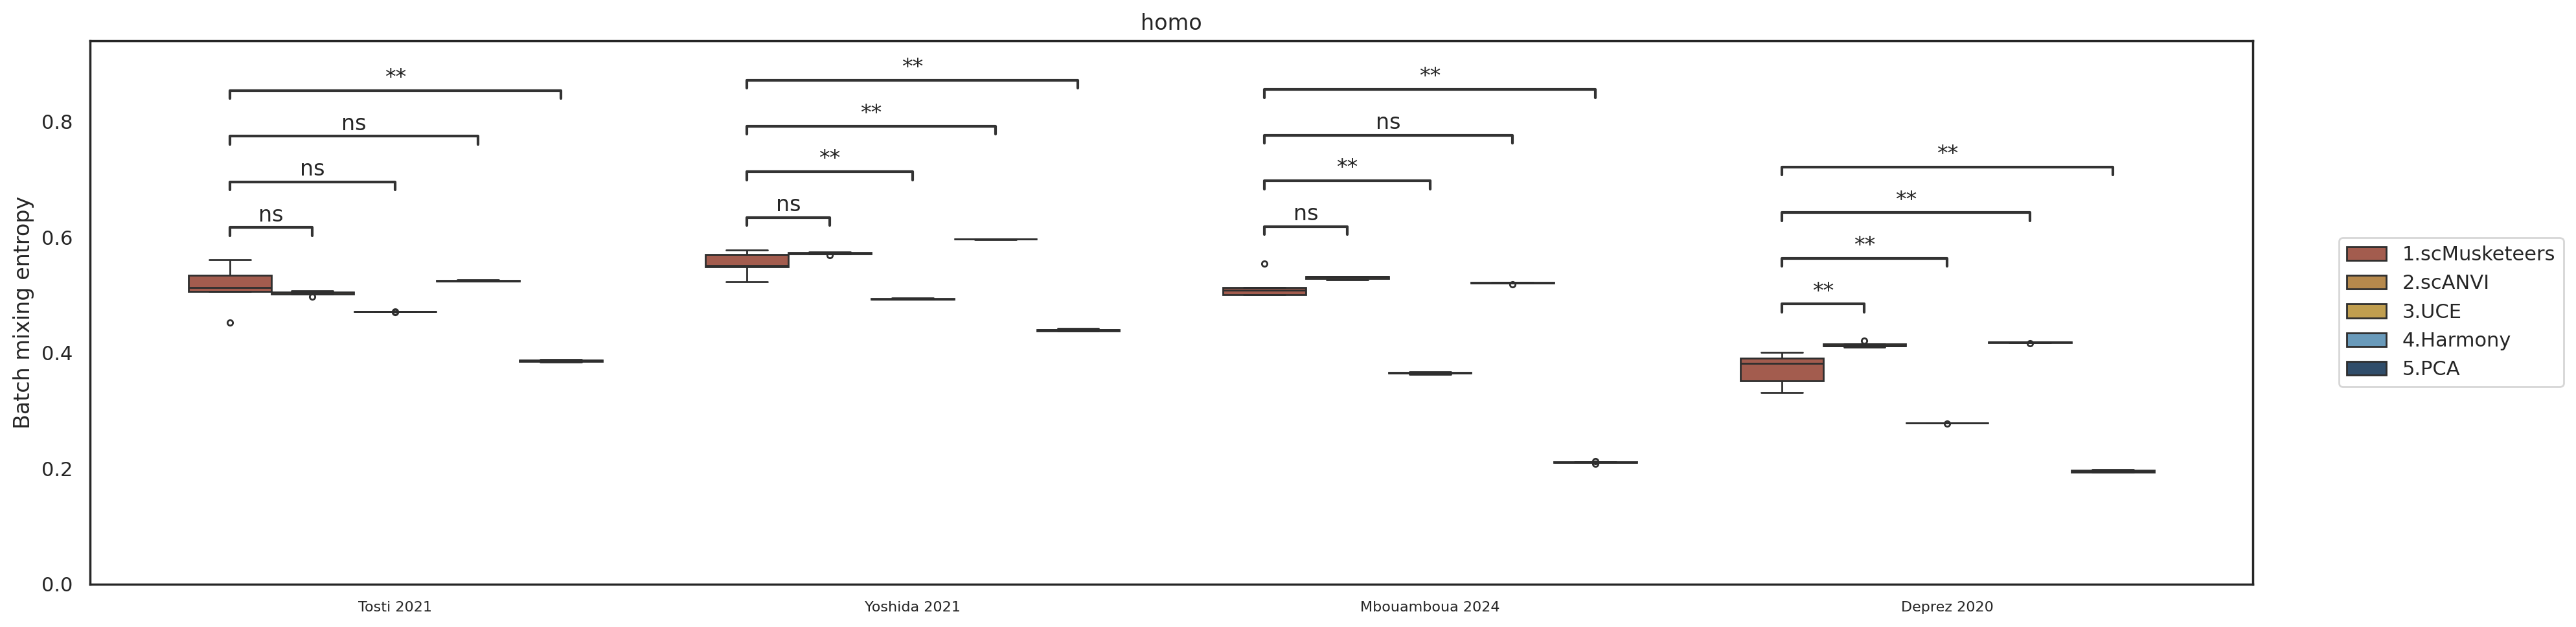

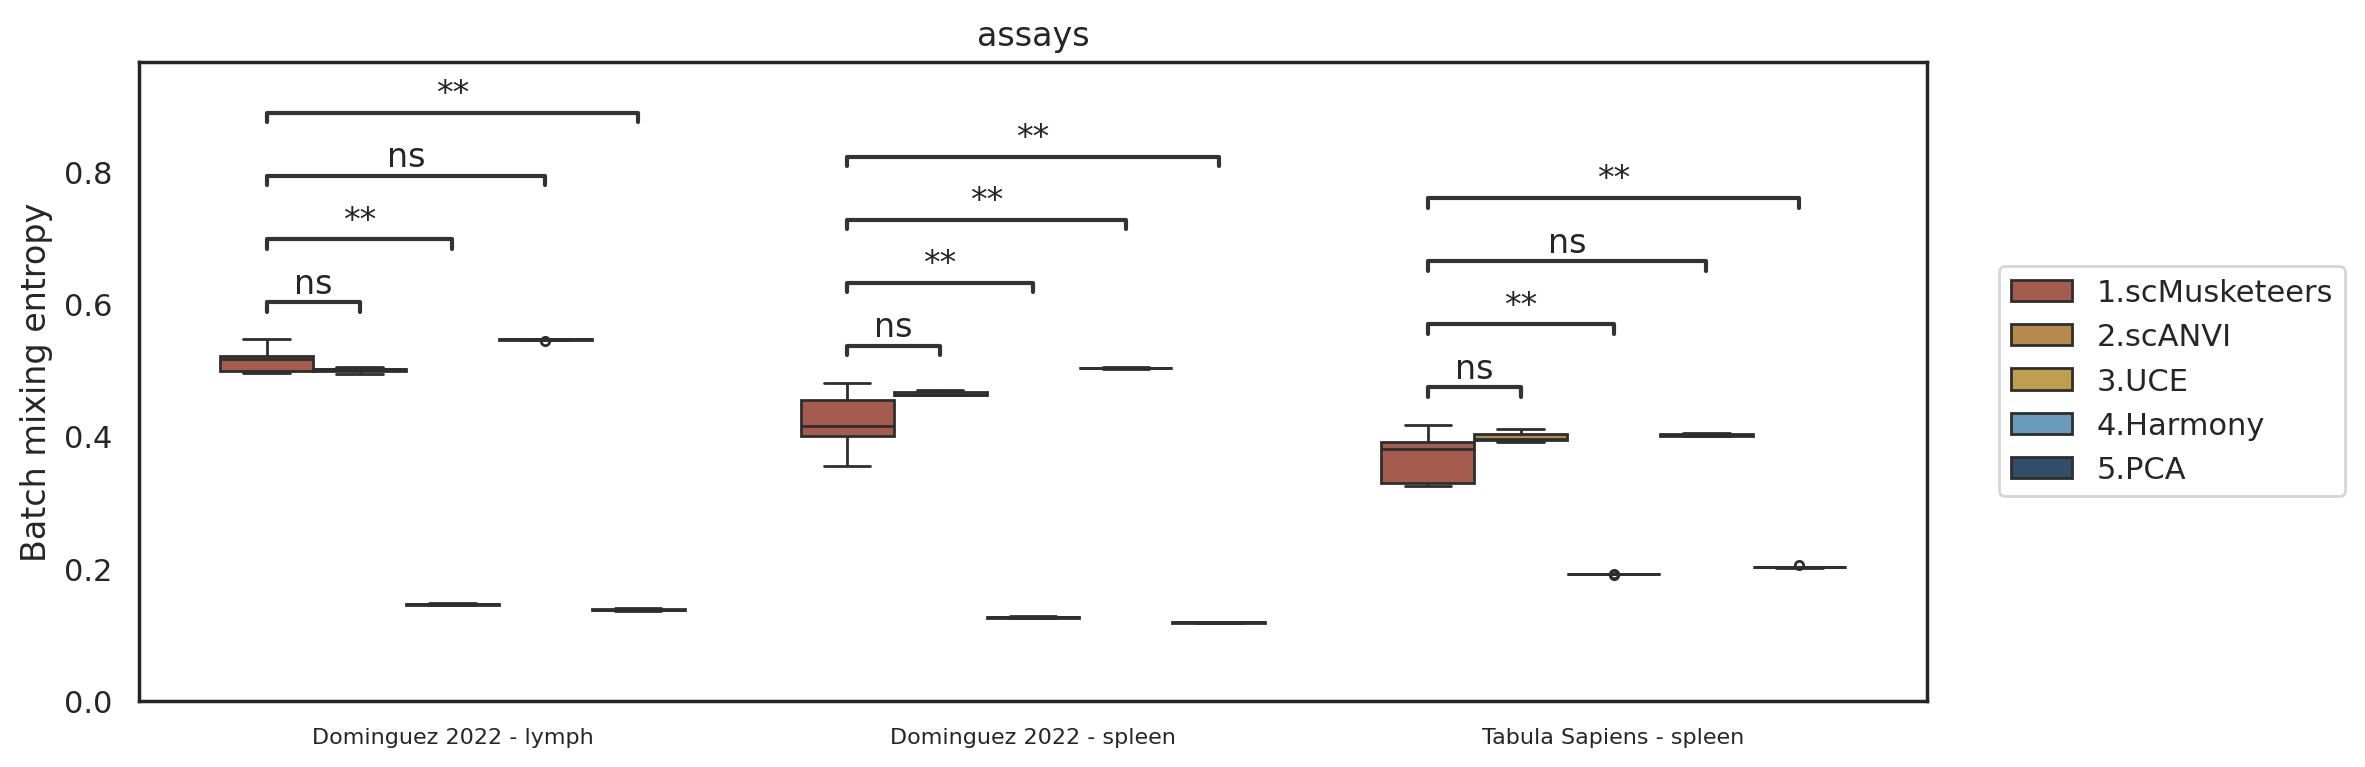

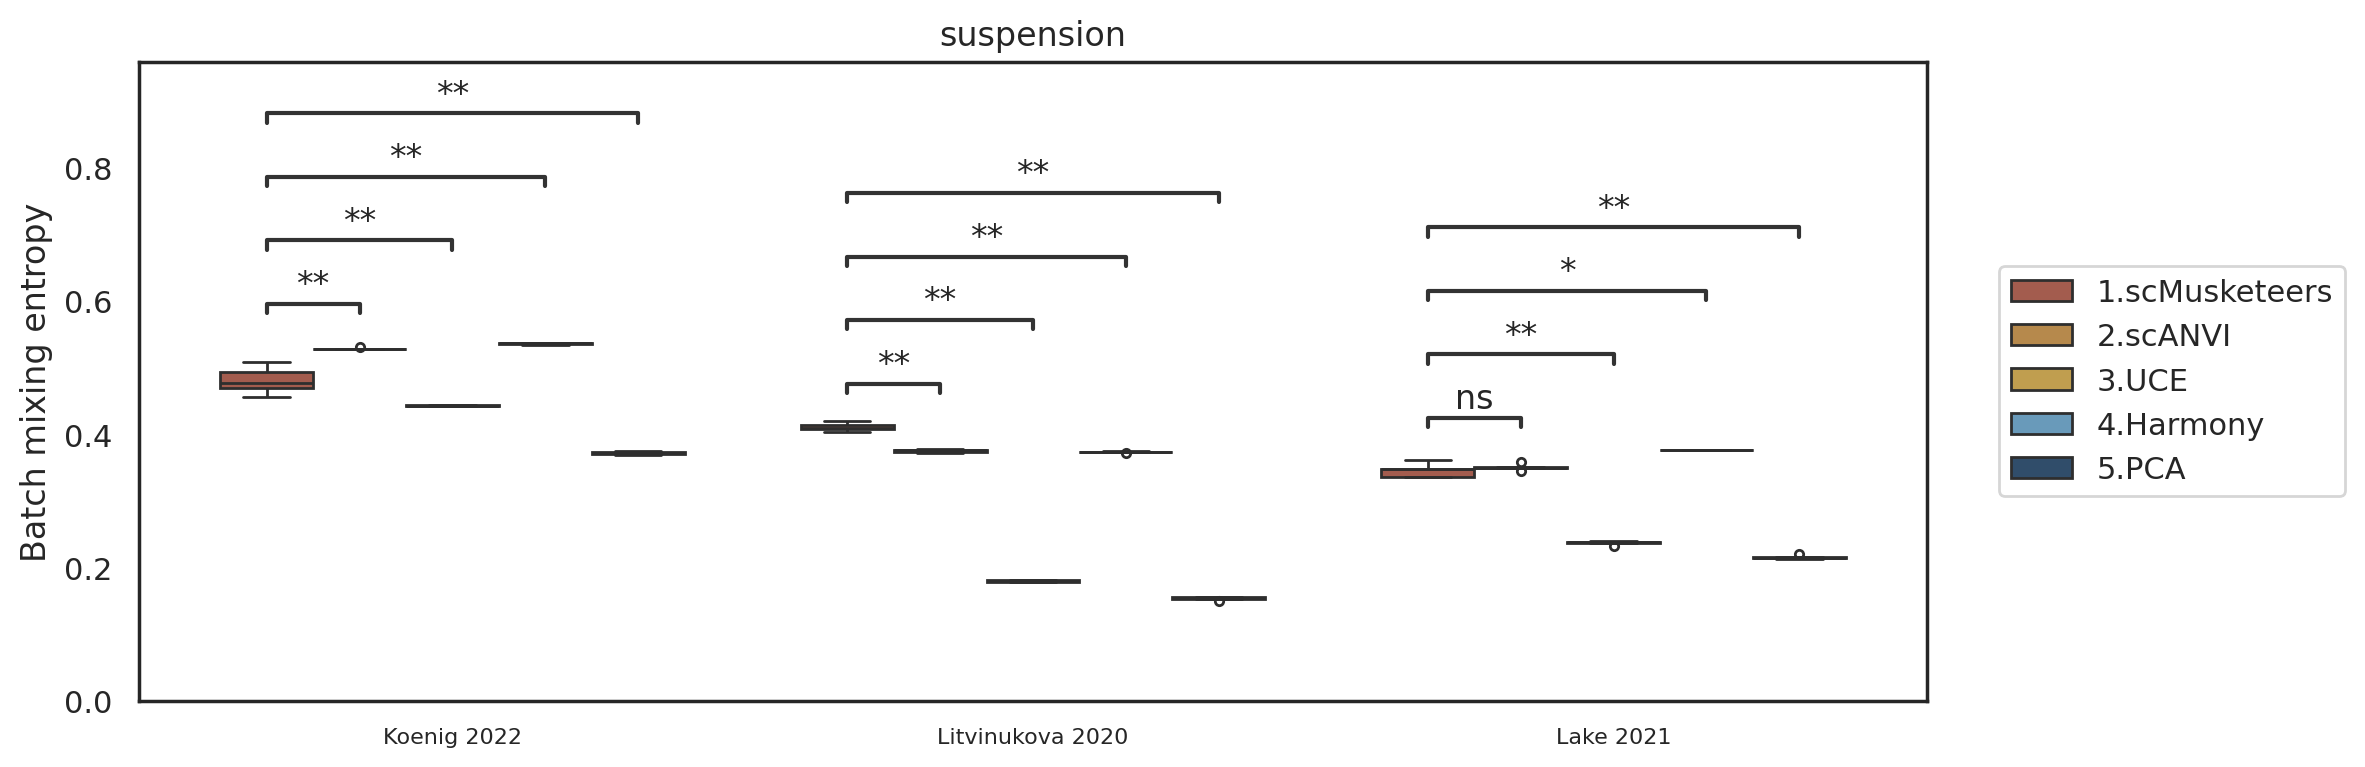

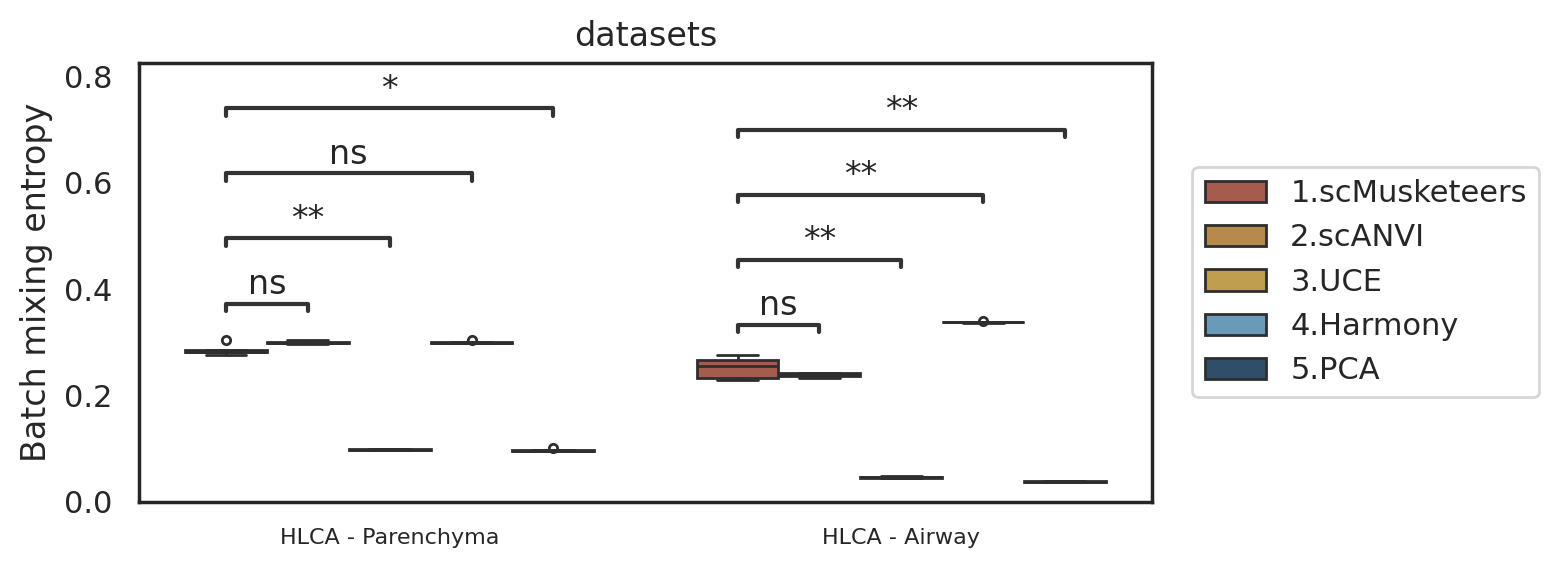

In [68]:
i = 0
xsizes =  [20,12,12,8]
ysizes = [5,4,4,3]
for comp, df in task_dict.items():
    print(comp)
    df = df.copy()
    df = df[df['model'] != 'scPermut']
    sns.set_theme(style="white")
    n_dataset = df['dataset_name'].nunique()
    split = 'full'
    met = 'batch_mixing_entropy'
    f, ax = plt.subplots(1, figsize = (xsizes[i],ysizes[i]),dpi = 200)
    
    df['model'] = df['model'].replace({'Celltypist': 'PCA',
               'scmap - cells': 'PCA',
               'scmap - cluster': 'PCA'})
    
    
    df['dataset_name'] = df['dataset_name'].replace(aestetic_data_name)
    df['model'] = df['model'].replace(aestetic_model_name)
    sns.boxplot(x = 'dataset_name',y =f'{split}_{met}',  hue = 'model',data = df, hue_order = colors_BE.keys(),  ax =ax, palette = sns.color_palette(colors_BE.values()), orient ='v', flierprops={"marker": "."},
    )
    ax.tick_params(axis='x', rotation=0, labelsize=8)
    
    ax.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0)
    ax.set_ylabel(f'Batch mixing entropy')
    ax.set_xlabel(f'')
    ax.set(ylim = (0,0.7))
    ax.set_title(comp)
    
    # Add stat bars
    pairs = []
    for dataset in df['dataset_name'].unique():
        for k in range(1, len(colors_BE.keys())):
            pair = (dataset, list(colors_BE.keys())[0]), (dataset, list(colors_BE.keys())[k])
            print(pair)
            pairs.append(pair)
        
    order = list(aestetic_model_name.keys())
    annotator = Annotator(ax, pairs, data=df, x='dataset_name', y=f'{split}_{met}', hue = 'model', hue_order = colors_BE.keys())
    annotator.configure(test='Mann-Whitney', text_format='star', loc='inside')
    annotator.apply_and_annotate()

    plt.tight_layout()
    i+=1
    ax.get_figure().savefig(f'{fig_dir}task_1/prediction_boxplot_{comp}_dataset_BE.png', transparent=False)

In [ ]:
# Old style

# sns.set_theme(style="white")
# split = 'test'
# met = 'balanced_acc'
# f, ax = plt.subplots(1, figsize = (24,5),dpi = 200)

# t1['dataset_name'] =t1['dataset_name'].replace(aestetic_data_name)
# t1['model'] =t1['model'].replace(aestetic_model_name)

# sns.boxplot(x = 'dataset_name',y =f'{split}_{met}',  hue = 'model',data = t1, hue_order = colors.keys(),  ax =ax,palette = sns.color_palette(colors.values()), orient ='v', flierprops={"marker": "."},
# )
# ax.tick_params(axis='x', rotation=0, labelsize=8)



# txt_labels = ['Homogeneous', 'Assays', 'Suspensions', 'Datasets']

# x_coordinates = [4.5, 7.5, 10.5, 12.5]  # Example x-coordinates for the lines
# for i in range(len(x_coordinates)):
#     xc = x_coordinates[i]
#     if i == 0:
#         txt_x = (xc-1)/2
#     else :
#         txt_x = (xc + x_coordinates[i-1]) / 2
#     if i < len(x_coordinates) - 1:
#         ax.axvline(x=xc, color='black', linestyle='--')
# ax.text(x=txt_x, y=ax.get_ylim()[1] + 0.01, s=txt_labels[i], ha='center')
# ax.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0)
# ax.set_ylabel(f'Balanced accuracy on Test')
# ax.set_xlabel(f'')
# plt.tight_layout()
# ax.get_figure().savefig(f'{fig_dir}task_1/prediction_boxplot_ALL_dataset.png', transparent=False)

In [ ]:
# Old style

# sns.set_theme(style="white")
# f, ax = plt.subplots(1, figsize = (24,5), dpi = 200)

# t1['dataset_name'] =t1['dataset_name'].replace(aestetic_data_name)
# t1['model'] =t1['model'].replace(aestetic_model_name)

# t1['model'] = t1['model'].replace({'Celltypist': 'PCA',
#            'scmap - cells': 'PCA',
#            'scmap - cluster': 'PCA'})
# colors_BE = {k:v for k, v in colors.items() if k not in ['Celltypist','scmap - cells','scmap - cluster']}



# sns.boxplot(x = 'dataset_name',y ='full_batch_mixing_entropy',  hue = 'model',data = t1, hue_order = colors_BE.keys(),  ax =ax,palette = sns.color_palette(colors_BE.values()), orient ='v', flierprops={"marker": "."},
# )
# ax.tick_params(axis='x', rotation=0, labelsize=8)


# txt_labels = ['Homogeneous', 'Assays', 'Suspensions', 'Datasets']

# x_coordinates = [4.5, 7.5, 10.5, 12.5]  # Example x-coordinates for the lines
# for i in range(len(x_coordinates)):
#     xc = x_coordinates[i]
#     if i == 0:
#         txt_x = (xc-1)/2
#     else :
#         txt_x = (xc + x_coordinates[i-1]) /2
#     if i < len(x_coordinates) - 1:
#         ax.axvline(x=xc, color='black', linestyle='--')
#     ax.text(x=txt_x, y=ax.get_ylim()[1] + 0.01, s=txt_labels[i], ha='center')
#     ax.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0)
#     ax.set_ylabel(f'Batch mixing entropy')
#     ax.set_xlabel(f'')
#     plt.tight_layout()
#     ax.get_figure().savefig(f'{fig_dir}task_1/Batch_entropy_boxplot_ALL_dataset.png', transparent=False)

# Figure default vs opti config

In [ ]:
runs_table_df = load_run_df()
runs_table_df.loc[(runs_table_df['model'] == 'scPermut') & (runs_table_df['use_hvg'] == 3000),'model'] = 'scPermut_default'


In [ ]:
task_1 = runs_table_df.query("task == 'task_1'").query('deprecated_status == False') #query(f"dataset_name == '{dataset_name}'").query(f"test_fold_nb == {test_fold_selection[dataset_name]}").
task_1 = task_1.loc[task_1['model'].isin(['scPermut', 'scPermut_default'])]
task_1 = task_1.loc[~((task_1['model'] == 'scPermut_default') & (task_1['training_scheme'] != 'training_scheme_8')),:]
task_1 = task_1[task_1['dataset_name'] != 'tenx_hlca']

In [ ]:
# Creating one dataframe comparing optimized vs default config

split = 'test'
met = 'balanced_acc'

res = pd.DataFrame(columns = ['Optimized', 'Default'])
for dataset_name in dataset_list:
    task_1 = runs_table_df.query("task == 'task_1'").query(f"dataset_name == '{dataset_name}'").query(f"test_fold_nb == {test_fold_selection[dataset_name]}").query('deprecated_status == False')
    task_1 = task_1.loc[task_1['model'].isin(['scPermut', 'scPermut_default'])]
    task_1 = task_1.loc[~((task_1['model'] == 'scPermut_default') & (task_1['training_scheme'] != 'training_scheme_8')),:]
    
    score = task_1.groupby('model')[f'{split}_{met}'].agg('mean')
    score = score.rename(index = {'scPermut': 'Optimized','scPermut_default': 'Default'})
    res.loc[dataset_name,:] = score.transpose()
    # mean_perm = task_1.loc[task_1['isperm'],:].groupby('training_scheme')[f'{split}_{met}'].agg('mean')
    # mean_noperm = task_1.loc[~task_1['isperm'],:].groupby('training_scheme')[f'{split}_{met}'].agg('mean')


res = res.rename(index = aestetic_data_name)

order=  ['Deprez 2020' ,'Koenig 2022',
            'HLCA - Parenchyma' , 'Dominguez 2022 - lymph' , 
            'Dominguez 2022 - spleen' , 'Tosti 2021' , 'Mbouamboua 2024' , 
            'Yoshida 2021' , 
            'Lake 2021' , 
            'Tabula Sapiens - spleen' , 
            'HLCA - Airway' ,
            'Litvinukova 2020']

res_toplot = pd.melt(res, id_vars=["Dataset"], var_name="Opti", value_name="Balanced accuracy")
res_toplot['Dataset'] = pd.Categorical(res_toplot['Dataset'], categories =order )

                                                                            

df_diff = res.copy()
df_diff = df_diff.loc[order,:]
df_diff['Difference'] = df_diff['Default'] - df_diff['Optimized']
df_diff['Difference'] = df_diff['Difference'] * 100

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x = 'Dataset', y = 'Balanced accuracy', hue = 'Opti', hue_order =['Default', 'Optimized'], 
            data = res_toplot, ax = ax, palette = ["#B15236", "#feca28"])

for i, dataset in enumerate(df_diff["Dataset"]):
    permutation_value = df_diff.loc[df_diff["Dataset"] == dataset, "Default"].values[0]
    no_permutation_value = df_diff.loc[df_diff["Dataset"] == dataset, "Optimized"].values[0]
    difference = df_diff.loc[df_diff["Dataset"] == dataset, "Difference"].values[0]
    
    diff_text = f'{difference:+.2f}%'
    
    ax.text(i, max(permutation_value, no_permutation_value) + 0.01, diff_text, 
            ha='center', va='bottom', color='black')
ax.legend().set_title('')
ax.set_ylim(bottom= 0.4)
plt.xticks(rotation = 90)
ax.set_xlabel(f'')
ax.get_figure().savefig(fig_dir + '/default_config.png')

# Effect of the training scheme

In [ ]:
runs_table_df = load_run_df()
runs_table_df.loc[(runs_table_df['model'] == 'scPermut') & (runs_table_df['use_hvg'] == 3000),'model'] = 'scPermut_default'


In [ ]:
test_fold_selection = load_json(working_dir + 'experiment_script/benchmark/hp_test_folds')
test_obs = load_json(working_dir + 'experiment_script/benchmark/hp_test_obs')

In [ ]:
# runs_table_df = pd.read_csv('/home/acollin/scPermut/analysis_notebooks/t1_tempo.csv', index_col = 0)

In [ ]:
from neptune.utils import stringify_unsupported

In [ ]:
colors = {'scPermut':"#B15236",
          'scPermut_default' : "#B15240",
          'scanvi':"#C78C3B" ,
          'uce':"#D3A53C" ,
          'harmony_svm': "#5B9DC7",
          'pca_svm':"#264D74",
          'pca_knn':"#264D80",
          'celltypist': "#75BAD3",
          'scmap_cells':"#607F6A" ,
          'scmap_cluster':"#707C45"}

col = [hex2rgb(i) for i in colors.values()]

In [ ]:
datasets = ['tosti_2021','yoshida_2021', 'htap',  'ajrccm_by_batch',"lake_2021"] 

In [ ]:
tr_sc_order_rename = {#'training_scheme_12':'A+/C-',
                      # 'training_scheme_17':'AC+/C-',
                      'training_scheme_23':'F+',
                      'training_scheme_13':'F+/C',
                      'training_scheme_6' : 'D+/F+',
                      'training_scheme_8': 'D+/F-/C',
                      'training_scheme_11':'D+/F-/C/F+/C',
                      # 'training_scheme_22':'A+/D+/F-/C',
                      # 'training_scheme_7' : 'D+/F-',
                      # 'training_scheme_4': 'D-/A+/C',
                      # 'training_scheme_9': 'D-/F+/C',
                      # 'training_scheme_16':'D+/F+/C-',
                      # 'training_scheme_15':'D+train/F-/C-',
                      'training_scheme_24':'F-',
                      'training_scheme_14':'F-/C',
                      'training_scheme_5' : 'D-/F-',
                      'training_scheme_19':'D-/F-/C',
                      # 'training_scheme_20':'D-semi/F-/C-',                     
                      'training_scheme_18':'Autoclass-like (AC-/C)',
                      'training_scheme_25':'scNym-like (CD)'}


scanpy_102 = get_scanpy_cmap() # Colors



color_schemes = scanpy_102[:13]

In [ ]:
color_schemes =['#E3B505',
               '#95190C',
                '#610345',
                '#107E7D',
                '#044B7F',]

col1 = ['#E3B505',
       '#95190C',
        '#610345',]

col2 =['#71B48D',
       '#107E7D',
        '#044B7F',]

col_consistent = ['#E8EBE4','#8AD0AA', '#5FBF8A', '#40A06B', '#296644']
import matplotlib.colors as mcolors
n_colors = len(tr_sc_order_rename)
def extrapolate_colors(col_list, n_col):
    cmap = mcolors.LinearSegmentedColormap.from_list("my_palette", col_list)
    col_list = [cmap(i / (n_colors - 1)) for i in range(n_colors)]
    return col_list

In [ ]:
# All over the place
color_schemes = extrapolate_colors(color_schemes, n_colors)


In [ ]:
# Highlight the scheme we use & the no perm schemes
color_schemes = extrapolate_colors(col_consistent, n_colors)
color_schemes[3] = '#B15236'
color_schemes[-1] = '#8789C0'
color_schemes[-2] = '#8789C0'
color_schemes[-3] = '#B8BACF'
color_schemes[-4] = '#B8BACF'
color_schemes[-5] = '#B8BACF'
color_schemes[-6] = '#B8BACF'

# color_schemes[-4] = '#B8BACF'

In [ ]:
import matplotlib.pyplot as plt

# Définir les couleurs pastels
color_schemes = [
     "#dcedc1", "#c5e1a5","#8AD0AA", # Vert
     "#B15236","#ff8a80",        # Rouge
      "#80deea","#b3e5fc", "#bbdefb","#c5cae9", # Bleu
    "#f8bbd0" ,"#f48fb1",             # Rose
]

In [ ]:
perm_ts = ['training_scheme_23',
          'training_scheme_13',
          'training_scheme_6' ,
          'training_scheme_8',
          'training_scheme_11']

noperm_ts = ['training_scheme_24',
            'training_scheme_14',
            'training_scheme_5',
            'training_scheme_19']
res = pd.DataFrame(columns = [True, False])
for dataset_name in datasets:
    task_1 = runs_table_df.query("task == 'task_1'").query(f"dataset_name == '{dataset_name}'").query(f"test_fold_nb == {test_fold_selection[dataset_name]}").query('deprecated_status == False').query('use_hvg == 3000').query("model == 'scPermut_default'")
    task_1 = task_1.loc[task_1['training_scheme'].isin(perm_ts + noperm_ts),:]
    task_1['isperm'] = task_1['training_scheme'].isin(perm_ts)
    score = task_1.groupby('isperm')[f'{split}_{met}'].agg('mean')
    
    res.loc[dataset_name,:] = score.transpose()
    # mean_perm = task_1.loc[task_1['isperm'],:].groupby('training_scheme')[f'{split}_{met}'].agg('mean')
    # mean_noperm = task_1.loc[~task_1['isperm'],:].groupby('training_scheme')[f'{split}_{met}'].agg('mean')


In [ ]:
res.rename(index = aestetic_data_name,columns = {True:'Permutation', False:'No Permutation'}).to_csv(f'{fig_dir}task_1/training_schemes/permutation_effect.csv')

In [ ]:
res = pd.read_csv(f'{fig_dir}task_1/training_schemes/permutation_effect.csv', index_col = 0)

In [ ]:
res['Dataset'] = res.index

In [ ]:
res = res.loc[['Deprez 2020', 'Tosti 2021', 'Yoshida 2021', 'Mbouamboua 2024',  'Lake 2021'],:]

In [ ]:
res_toplot = pd.melt(res, id_vars=["Dataset"], var_name="Permutation", value_name="Balanced accuracy")
res_toplot['Dataset'] = pd.Categorical(res_toplot['Dataset'], categories = ['Deprez 2020', 'Tosti 2021', 'Yoshida 2021', 'Mbouamboua 2024',  'Lake 2021'])

In [ ]:
df_diff = res.copy()
df_diff['Difference'] = df_diff['Permutation'] - df_diff['No Permutation']
df_diff['Difference'] = df_diff['Difference'] * 100

## Supp Figure perm vs no perm

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x = 'Dataset', y = 'Balanced accuracy', hue = 'Permutation', data = res_toplot, ax = ax, palette = ["#B15236", "#80deea"])

for i, dataset in enumerate(df_diff["Dataset"]):
    permutation_value = df_diff.loc[df_diff["Dataset"] == dataset, "Permutation"].values[0]
    no_permutation_value = df_diff.loc[df_diff["Dataset"] == dataset, "No Permutation"].values[0]
    difference = df_diff.loc[df_diff["Dataset"] == dataset, "Difference"].values[0]
    
    diff_text = f'{difference:+.2f}%'
    
    ax.text(i, max(permutation_value, no_permutation_value) + 0.01, diff_text, 
            ha='center', va='bottom', color='black')
ax.legend().set_title('')
ax.set_ylim(bottom= 0.6)
ax.set_xlabel(f'')
ax.get_figure().savefig(fig_dir + '/permutation_effect.png')

## Supp Figure Comparison of training schemes

In [ ]:
n_lines = len(datasets)
f, axes = plt.subplots(n_lines, 3, figsize = (25,5*n_lines))
i=0

show_legend = False

for dataset_name in datasets:
    task_1 = runs_table_df.query("task == 'task_1'").query(f"dataset_name == '{dataset_name}'").query(f"test_fold_nb == {test_fold_selection[dataset_name]}").query('deprecated_status == False').query('use_hvg == 3000').query("model == 'scPermut_default'")

    bplot1 = axes[i,0]
    bplot2 = axes[i,1]
    bplot3 = axes[i,2]    
    
    task_1['training_scheme'] = task_1['training_scheme'].replace(tr_sc_order_rename)
    
        
    sns.boxplot(x = 'model',y =f'{split}_{met}', hue = 'training_scheme', data = task_1, ax = bplot1, hue_order = list(tr_sc_order_rename.values()),palette = sns.color_palette(color_schemes[:n_colors]))
    bplot1.tick_params(axis='x', rotation=0)
    if i == 0:
        bplot1.set_title('Balanced accuracy on the test dataset')
    if i != n_lines:
        bplot1.set_xlabel('')
    if i == n_lines:
        bplot1.set_xlabel('Model')
    bplot1.set_xticks([])
    bplot1.set_ylabel(f'{aestetic_data_name[dataset_name]}')
    bplot1.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0)
    sub =task_1[['training_scheme', 'test_fold_nb',f'{split}_{met}', f'{split}_xxsmall_{met}',f'{split}_small_{met}', f'{split}_medium_{met}', f'{split}_large_{met}']]
    sub = pd.melt(sub, id_vars = 'training_scheme', value_vars = [f'{split}_xxsmall_{met}',f'{split}_small_{met}', f'{split}_medium_{met}', f'{split}_large_{met}'])
    sub = sub.replace({f'{split}_xxsmall_{met}' : '<0.1%',f'{split}_small_{met}':'<1%', f'{split}_medium_{met}':'<10%',f'{split}_large_{met}':'>10%'})
    
    # sns.lineplot(data=sub, x="variable", y="value", hue = 'model', hue_order = colors.keys(),ax = bplot2,palette = sns.color_palette(colors.values()), markers = True)
    if dataset_name in ['tran_2021',aestetic_data_name['tran_2021'], 
                        'hlca_trac_dataset_harmonized', aestetic_data_name['hlca_trac_dataset_harmonized']]:
        ord =  ['<1%','<10%','>10%']
    elif dataset_name in ['lake_2021', aestetic_data_name['lake_2021']]:
        ord =  ['<0.1%','<1%','<10%']
    else :
        ord = ['<0.1%','<1%','<10%','>10%']
            
    sns.boxplot(x='variable',y ='value',hue = 'training_scheme',order = ord, data = sub,ax = bplot2, hue_order = list(tr_sc_order_rename.values()), palette = sns.color_palette(color_schemes[:n_colors]))
    bplot2.tick_params(axis='x', rotation=0)
    bplot2.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0)
    if i == 0:
        bplot2.set_title('Balanced accuracy on the test dataset split by celltype sizes')
    if i != n_lines:
        bplot2.set_xlabel('')
    if i == n_lines :
        bplot2.set_xlabel('Celltype size')
    
    bplot2.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0)
    sns.boxplot(x = 'model',y =f'full_batch_mixing_entropy', hue = 'training_scheme', data = task_1, ax = bplot3, hue_order = list(tr_sc_order_rename.values()), palette = sns.color_palette(color_schemes[:n_colors]))
    bplot3.tick_params(axis='x', rotation=0)
    if i == 0:
        bplot3.set_title('Batch mixing entropy the whole dataset')
    if i != n_lines:
        bplot3.set_xlabel('')
    if i == n_lines:
        bplot3.set_xlabel('Model')
    bplot3.set_ylabel('BE')
    bplot3.set_xlabel('')
    bplot3.set_xticks([])

    bplot3.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0)
    i+=1

    if not show_legend: 
        bplot1.get_legend().set_visible(False)
        bplot2.get_legend().set_visible(False)
        #bplot3.get_legend().set_visible(False)

plt.tight_layout()
f.savefig(f'{fig_dir}task_1/training_schemes/prediction_boxplot_{len(datasets)}_datasets.png', transparent=False)

# Small subtypes

In [ ]:
runs_table_df = load_run_df()
runs_table_df.loc[(runs_table_df['model'] == 'scPermut') & (runs_table_df['use_hvg'] == 3000),'model'] = 'scPermut_default'


In [ ]:
split = 'test'
met = 'balanced_acc'

In [ ]:
def load_fold_t1(runs_table_df,dataset_name, fold):
    """
    Loads every anndata from one specific fold for one model. Returns a list where the key is the model and the value is the anndata with corresponding latent space and predictions 
    """
    task_1 = runs_table_df.query("task == 'task_1'").query(f"dataset_name == '{dataset_name}'").query(f"test_fold_nb == {test_fold_selection[dataset_name]}").query('deprecated_status == False').query('use_hvg == 3000')
    task_1 = task_1.loc[~((task_1['model'] == 'scPermut_default') & (task_1['training_scheme'] != 'training_scheme_8')),:]
    task_1 = task_1.query(f"val_fold_nb == {fold}")
    ad_list = {}
    for model in np.unique(task_1['model']):
        # if model == 'scPermut':
        #     sub = task_1.query(f'model == "{model}"').query('training_scheme == "training_scheme_8"')
        # else:
        sub = task_1.query(f'model == "{model}"')
        if not sub.loc[sub[f'{split}_{met}'] == sub[f'{split}_{met}'].max(),'sys_id'].empty :
            fold_id = sub.loc[sub[f'{split}_{met}'] == sub[f'{split}_{met}'].max(),'sys_id'].values[0]
            ad = load_expe(fold_id,working_dir)
            ad_list[model] = ad
    return ad_list


In [ ]:
model_list = ['scPermut_default','uce', 'scanvi','harmony_svm','celltypist','pca_svm', 'scmap_cells', 'scmap_cluster']
ad_list = {i: load_fold_t1(runs_table_df,dataset_name, fold=i) for i in range(5)}


## Figure 3 Heatmaps

In [ ]:
# # Generate celltype_df_list for best expe

# celltype_df_list = {}
# split = 'test'
# met = 'balanced_acc'
# model_list = ['scPermut_default','uce', 'scanvi','harmony_svm','celltypist','pca_svm', 'scmap_cells', 'scmap_cluster']

# detection_th = 0.4

# for size in ['xxsmall','small','medium','large']:
#     n_celltypes_df = pd.DataFrame(index = dataset_list, columns = model_list)
#     for dataset_name in dataset_list:
#         ad_list = load_best_t1(runs_table_df, dataset_name)
#         sizes = get_sizes(ad_list)
#         for model in model_list:
#             if model in ad_list:
#                 sub = ad_list[model][ad_list[model].obs['split'] == 'test']
#                 sub_small = sub[sub.obs['true'].isin(sizes[size])]
        
                
#                 conf_mat, conf_mat_prop = plot_confusion_matrix(sub,sub_small, return_mat = True)
#                 detected_ct = np.diag(conf_mat_prop) > detection_th
#                 detected_ct = conf_mat_prop.index[detected_ct]
                
        
#                 n_celltypes_df.loc[dataset_name, model] = len(detected_ct)
#         n_total_ct = len(sizes[size])
#         n_celltypes_df.loc[dataset_name, 'Total'] = n_total_ct
#     print(size)
#     n_celltypes_df = n_celltypes_df.fillna(0)
#     celltype_df_list[size] = n_celltypes_df
#     clust_map = sns.clustermap(n_celltypes_df, annot=True,fmt='g')
#     plt.title(size)

In [ ]:
# # Generate celltype_df_list for average of 5 expe

# from tqdm.notebook import tqdm

# celltype_df_list = {}
# split = 'test'
# met = 'balanced_acc'
# model_list = ['scPermut_default','uce', 'scanvi','harmony_svm','celltypist','pca_svm', 'scmap_cells', 'scmap_cluster']

# detection_th = 0.2
# import warnings
# warnings.filterwarnings('ignore')

# for size in tqdm(['xxsmall','small','medium','large']):
#     n_celltypes_df = pd.DataFrame(index = dataset_list, columns = model_list)
#     for dataset_name in tqdm(dataset_list):
#         print(dataset_name)
#         mega_ad_list = {i: load_fold_t1(runs_table_df,dataset_name, fold=i) for i in range(5)}
#         sizes = get_sizes(mega_ad_list[0])
#         for model in model_list:
#             conf_mat_list = []
#             detection_list = []
#             n_ct_detected = []
#             for i in range(5):
#                 ad_list = mega_ad_list[i]
#                 if model in ad_list:
#                     sub = ad_list[model][ad_list[model].obs['split'] == 'test']
#                     sub_small = sub[sub.obs['true'].isin(sizes[size])]
            
#                     conf_mat, conf_mat_prop = plot_confusion_matrix(sub,sub_small, return_mat = True)
#                     conf_mat_list.append(conf_mat_prop)
#                     ct_detected = pd.Series(np.diag(conf_mat_prop) > detection_th, index =conf_mat_prop.index)
#                     detection_list.append(ct_detected)
#                     n_ct_detected.append(ct_detected.sum())
#             avg_nct_detected = np.mean(n_ct_detected)
#             n_celltypes_df.loc[dataset_name, model] = avg_nct_detected
#             # average_array = pd.Series(np.mean(np.stack(detection_list), axis=0), index = conf_mat_prop.index )
#             #average_array = pd.DataFrame(np.mean(np.stack(conf_mat_list), axis=0),index = conf_mat_list[0].index, columns = conf_mat_list[0].columns)
#             # detected_ct = np.diag(conf_mat_prop) > detection_th
#             # detected_ct = average_array.index[detected_ct]
#         n_total_ct = len(sizes[size])
#         n_celltypes_df.loc[dataset_name, 'Total'] = n_total_ct
#     # n_celltypes_df = n_celltypes_df.fillna(0)
#     celltype_df_list[size] = n_celltypes_df

In [ ]:
# # Saving 

# for s, df in celltype_df_list.items():
#     df.fillna(0)
#     df.to_csv(f'/home/acollin/scPermut/analysis_notebooks/figures/task_1/celltype_size_heatmap_csv/{s}.csv')

In [ ]:
# Start here if already saved. Else run above cells

celltype_df_list = dict()
for s in ['xxsmall', 'small', 'medium', 'large']:
    df = pd.read_csv(f'/home/acollin/scPermut/analysis_notebooks/figures/task_1/celltype_size_heatmap_csv/{s}.csv', index_col = 0)
    df = df.loc[df.index != 'tran_2021',:]
    celltype_df_list[s] = df.copy()

In [ ]:
import matplotlib.colors as mcolors

heatmap_colors = ["lightgray","#FFF7EC", "#FEE8C8", "#FDD49E",
          "#FDBB84", "#FC8D59", "#EF6548" ]#], "#D7301F", "#B30000"]#, "#7F0000"]

cmap = mcolors.LinearSegmentedColormap.from_list("my_palette", heatmap_colors)

In [ ]:
import matplotlib.colors as mcolors
cm_df = celltype_df_list['xxsmall'].copy().fillna(0)
cm_val = cm_df.values
cm_val = cm_val / cm_val.max(axis = 1, keepdims=True)
cm_plot = pd.DataFrame(cm_val, index= cm_df.index, columns = cm_df.columns)

In [ ]:
sc.set_figure_params(dpi=100, figsize=(6,6), scanpy=False, 
                     frameon=False, vector_friendly=False, color_map=None, facecolor=None, transparent=True, ipython_format='png2x')
sns.set_theme(style = "white")
detection_th = 0.2
for size, df in celltype_df_list.items():
    df = df.sort_values(axis = 0,by = 'Total', ascending = False)
    df = df.fillna(0)
    if size == 'xxsmall' :
        df = df.drop(index = ['hlca_trac_dataset_harmonized']) #'tran_2021',
    if size == 'large' :
        df = df.drop(index = 'lake_2021')
    plt.figure()
    df = df.loc[:, list(aestetic_model_name.keys()) + ['Total']]
    df= df.rename(index = aestetic_data_name, columns = aestetic_model_name)
    
    cm_df = df.copy()
    cm_val = cm_df.values 
    cm_val = cm_val / cm_val.max(axis = 1, keepdims=True)# row scaling
    cm_plot = pd.DataFrame(cm_val, index= cm_df.index, columns = cm_df.columns)
    
    f = sns.heatmap(cm_plot, annot=cm_df,fmt='g',annot_kws={"fontsize":10}, linecolor = 'white', cmap = cmap,cbar = False)
    plt.title(size)
    plt.tight_layout()
    f.get_figure().savefig(f'{fig_dir}task_1/celltype_size_heatmap/heatmap_{size}_th_{detection_th}_scaled_colors.png', transparent=False)

    plt.figure()
    f = sns.heatmap(cm_plot, annot=True,fmt='.0%',annot_kws={"fontsize":7}, linecolor = 'white', cmap = cmap,cbar = False)
    plt.title(size)
    plt.tight_layout()
    f.get_figure().savefig(f'{fig_dir}task_1/celltype_size_heatmap/heatmap_{size}_th_{detection_th}_scaled_pct.png', transparent=False)
    
    plt.figure()
    f = sns.heatmap(cm_df, annot=True,fmt='g',annot_kws={"fontsize":10}, linecolor = 'white', cmap = cmap,cbar = False)
    plt.title(size)
    plt.tight_layout()
    f.get_figure().savefig(f'{fig_dir}task_1/celltype_size_heatmap/heatmap_{size}_th_{detection_th}_no_scaling.png', transparent=False)

# Exemples on Lake 2021

In [ ]:
runs_table_df = load_run_df()
runs_table_df.loc[(runs_table_df['model'] == 'scPermut') & (runs_table_df['use_hvg'] == 3000),'model'] = 'scPermut_default'


In [ ]:
dataset_name = 'lake_2021'

adata_list = load_best_t1(runs_table_df, 'lake_2021')
sizes = get_sizes(adata_list)

## Celltype proportions

In [ ]:
lake = adata_list['scPermut_default']
size_df = df_to_dict(dict_to_df(sizes), key_column = 'values', value_column= 'keys', singleton_to_str = True)
ct_prop = list(adata_list.values())[0].obs['true'].value_counts()/ list(adata_list.values())[0].n_obs

In [ ]:
import matplotlib as mpl
from matplotlib.patches import Patch

In [ ]:
# # Barplots, NOT USED IN PAPER

# sns.set_style("ticks",{'axes.linewidth': 0.5})
# f, ax = plt.subplots(figsize = (10,5))
# sns.histplot(lake.obs['true'].value_counts(),  ax=ax, bins = 10, log_scale=True)
# f.set_dpi(200)
# ax.set_xlabel('Celttype size')
# ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
# ax.set_xticks([100, 1000, 10000])
# ax.set_ylabel('Number of celltypes')
# ax.tick_params(axis='x', length = 1, width = 1, size = 4,color ='black')
# for i in range(3):
#     ax.patches[i].set_facecolor('#BBB891')
# for i in range(3, 7):
#     ax.patches[i].set_facecolor('#99B2DD')
# for i in range(7,10):
#     ax.patches[i].set_facecolor('#37505C')
# legend_patches = [
#     Patch(color='#BBB891', label='Tiny (11 celltypes, 567 cells)'),
#     Patch(color='#99B2DD', label='Small (31 celltypes, 14K cells)'),
#     Patch(color='#37505C', label='Medium (32 cellsypes, 90K cells)' )
# ]

# # Ajouter la légende personnalisée
# plt.legend(handles=legend_patches,frameon=False, bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.tight_layout()
# f.savefig(working_dir + 'analysis_notebooks/figures/lake_ct_prop.png')



In [ ]:
save_p = '/home/acollin/scPermut/analysis_notebooks/figures/task_1/piechart/lake/'

In [ ]:
# # Piecharts, NOT USED IN PAPER

# lake.obs['size'] = lake.obs['true'].replace(size_df)
# ct_prop = lake.obs['size'].value_counts()
# # library
# import matplotlib.pyplot as plt
# plt.rcParams["figure.figsize"] = (10,10)

# labels = []
# colors = ['#37505C',
#           '#99B2DD',
#           '#BBB891',
#           ]
# for pct in [None, '%1.1f%%']:
#     # Create a pieplot
#     plt.pie(ct_prop.values, 
#             labels=ct_prop.index, 
#             labeldistance=1.05,colors=colors,autopct=pct,
#             wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' })
#     if pct:
#         plt.savefig(save_p + 'size_pie_w_pct.png')
#     else :
#         plt.savefig(save_p + 'size_pie_no_pct.png')
#     plt.show()


In [ ]:
uniform_colors(lake)
z = lake[lake.obs['size'] == 'xxsmall']

In [ ]:
# Piecharts, NOT USED IN PAPER

# for s in ['xxsmall', 'small', 'medium']:
#     z = lake[lake.obs['size'] == s]
#     ct_prop = z.obs['true'].value_counts()
#     colors = [col[ct] for ct in ct_prop.index]
#     # library
#     import matplotlib.pyplot as plt
#     plt.rcParams["figure.figsize"] = (40,10)
    
#     labels = []
#     for pct in [None, '%1.1f%%']:
#         # Create a pieplot
#         plt.pie(ct_prop.values, 
#                 labels=ct_prop.index, 
#                 labeldistance=1.05,colors = colors,autopct=pct,
#                 wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' })
#         if pct:
#             plt.savefig(save_p + f'ct_{s}_pie_w_pct.png')
#         else :
#             plt.savefig(save_p + f'ct_{s}_pie_no_pct.png')
#         plt.show()

## Treemaps, used in Fig3 of paper

In [ ]:
df = pd.DataFrame(columns = ['celltype', 'pct', 'medium', 'rare', 'tiny'], index = ct_prop.index)
df['celltype'] = ct_prop.index
df['pct'] = ct_prop
def f(ct,val):
    if val > 0.01:
        return ct
    elif val > 0.001 :
        return 'Rare'
    else : 
        return 'Tiny'
df['medium'] = df.apply(lambda x: f(x.celltype, x.pct), axis=1)

def g(ct,val):
    if val > 0.01:
        return 'Medium'
    elif val < 0.001:
        return 'Tiny'
    else :
        return ct

df['rare'] = df.apply(lambda x: g(x.celltype, x.pct), axis=1)

def h(ct,val):
    if val > 0.01:
        return 'Medium'
    elif (val < 0.01) & (val > 0.001) :
        return 'Rare'
    else :
        return ct

df['tiny'] = df.apply(lambda x: h(x.celltype, x.pct), axis=1)


In [ ]:
uniform_colors(lake)
col_dict = {k:v for k,v in zip(lake.obs['true'].cat.categories, lake.uns['true_colors'])}
col_dict['Medium'] = '#37505C'
col_dict['Rare'] = '#99B2DD'
col_dict['Tiny'] = '#BBB891'


In [ ]:
import pandas as pd

def move_to_end(df, n):
    df = df.reset_index().drop('index', axis = 1)
    row_n = df.iloc[n]  
    data_without_n = df.drop(index=n)  
    # print(data_without_n)
    rearranged_data = pd.concat([data_without_n, pd.DataFrame([row_n])], ignore_index=True)
    return rearranged_data


### Medium Treemap

In [ ]:
agg_data = df.groupby('medium')['pct'].sum().reset_index()
agg_data['colors'] = agg_data['medium'].replace(col_dict)
agg_data  = agg_data.sort_values('pct', ascending = False)
agg_data = move_to_end(agg_data, 0)

In [ ]:
# create a color palette
import squarify # pip install squarify (algorithm for treemap)
import matplotlib.pyplot as plt
from pypalettes import load_cmap
import pandas as pd
# from highlight_text import fig_text


# set a higher resolution
plt.rcParams['figure.dpi'] = 300

fig, ax = plt.subplots(figsize=(10,10))
ax.set_axis_off()

# add treemap
squarify.plot(
   sizes=agg_data.pct,
   label=agg_data.medium,
    color = agg_data.colors,
    ec = 'white',
   ax=ax
)
plt.savefig('/home/acollin/scPermut/analysis_notebooks/figures/task_1/Treemap/medium_treemap.png')

# display plot
plt.show()

### Rare Treemap

In [ ]:
df_sub = df[df['rare'] != 'Medium']


In [ ]:
agg_data = df_sub.groupby('rare')['pct'].sum().reset_index()
agg_data['colors'] = agg_data['rare'].replace(col_dict)
agg_data  = agg_data.sort_values('pct', ascending = False)


In [ ]:
agg_data.iloc[[5, 11]] = agg_data.iloc[[11, 5]].values


In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
ax.set_axis_off()

# add treemap
squarify.plot(
   sizes=agg_data.pct,
   label=agg_data.rare,
    color = agg_data.colors,
    ec = 'white',
   ax=ax
)
plt.savefig('/home/acollin/scPermut/analysis_notebooks/figures/task_1/Treemap/rare_treemap.png')

# display plot
plt.show()

### Tiny Treemap

In [ ]:
df_sub = df[~df['tiny'].isin(['Medium', 'Rare'])]


In [ ]:
agg_data = df_sub.groupby('tiny')['pct'].sum().reset_index()
agg_data['colors'] = agg_data['tiny'].replace(col_dict)
agg_data  = agg_data.sort_values('pct', ascending = False)


In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
ax.set_axis_off()

# add treemap
squarify.plot(
   sizes=agg_data.pct,
   label=agg_data.tiny,
    color = agg_data.colors,
    ec = 'white',
   ax=ax
)
plt.savefig('/home/acollin/scPermut/analysis_notebooks/figures/task_1/Treemap/tiny_treemap.png')
# display plot
plt.show()


# Fig 4 Umaps

In [ ]:
sc.set_figure_params(dpi=200, figsize=(15,9))
min_size = 5
max_size = 200
plt.ioff()

model_list = ['scPermut_default','uce', 'scanvi','harmony_svm','celltypist','pca_svm', 'scmap_cells', 'scmap_cluster']
for model in model_list:
    save_dir = f'{fig_dir}task_1/UMAP/{dataset_name}/'
    check_dir(save_dir)
    point_size = np.array([min_size] * adata_list[model].n_obs)
    for s in sizes:
        big_points = adata_list[model].obs['true'].isin(sizes[s])
        point_size[big_points] = max_size
        
        uniform_colors(adata_list[model])
        
        f1 = sc.pl.umap(adata_list[model], color = ['true'], groups = sizes[s], legend_loc=  'right margin',legend_fontsize ='xx-small',
                       size = point_size, title = [f'{model} - true'], show= False)
    
        f1.get_figure().savefig(save_dir + f'umap_{s}_true_{model}_ptsize_{max_size}.png', transparent=False)
        
        point_size = np.array([min_size] * adata_list[model].n_obs)
        big_points = adata_list[model].obs['pred'].isin(sizes[s])
        point_size[big_points] = max_size
        f2 = sc.pl.umap(adata_list[model], color = ['pred'], groups = sizes[s],legend_loc=  'right margin',legend_fontsize ='xx-small',
                        size = point_size, title = [f'{model} - pred'], show= False)
        f2.get_figure().savefig(save_dir + f'umap_{s}_pred_{model}_ptsize_{max_size}.png', transparent=False)   


# Fig 4 Silhouettes

## For one model

In [ ]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score

In [ ]:
uniform_colors(lake)


In [ ]:
# For one model, propably possible to put it in a function for next cell

sub = tiny_lake
model = 'uce'

sample_silhouette_values = np.array(sub.obs['sil_true'])
cluster_labels = np.array(sub.obs['true'])
colors = {k : sub.uns['true_colors'][i] for i,k in enumerate(sub.obs['true'].cat.categories)}
n_clusters = len(np.unique(cluster_labels))

f, ax1 = plt.subplots()
f.set_size_inches(7, 18)

gap = int(sub.n_obs / 50)

lowxlim = 0.2 * np.floor(min(sample_silhouette_values)/0.2)
highxlim = 0.2 * np.ceil(max(sample_silhouette_values)/0.2)

ax1.set_xlim([lowxlim, highxlim])
# The (n_clusters+1)*10 is for inserting blank space between silhouette
# plots of individual clusters, to demarcate them clearly.
ax1.set_ylim([0, sub.n_obs + (n_clusters + 1) * gap])

y_lower = gap
for i, ct in enumerate(pd.Series(cluster_labels).value_counts(ascending = True).index):
    
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == ct]
    
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    # color = cm.nipy_spectral(float(i) / n_clusters)
    color = colors[ct]
    ax1.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        facecolor=color,
        edgecolor=color,
        alpha=0.7,
    )

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(highxlim +0.01, y_lower + 0.5 * size_cluster_i, str(ct), fontweight = 'bold')

    avg_sil = np.mean(ith_cluster_silhouette_values)
    
    # ax1.text(highxlim - 0.10, y_lower + 0.5 * size_cluster_i, str('{:.2f}'.format(avg_sil)), fontweight = 'bold')
    ax1.text(0, y_upper - 7, str('{:.2f}'.format(avg_sil)), fontweight = 'bold')
    
    # Compute the new y_lower for next plot
    y_lower = y_upper + gap  # 10 for the 0 samples
    
    ax1.set_title(aestetic_model_name[model])
    ax1.set_xlabel("Silhouette coefficient")
    
    # Horizontal line separating celltypes
    # ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    
    # The vertical line for average silhouette score of all the values
    # ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks(np.arange(lowxlim,highxlim, 0.2))
    
plt.show()


In [ ]:
#  Compute silhouettes for every models

plt.ioff()
for dataset_name in aestetic_data_name :
    if dataset_name not in ['tosti_2021','tran_2021','yoshida_2021','htap']:
        adata_list = {}
        for model in aestetic_model_name : 
            p = f'/home/acollin/scPermut/analysis_notebooks/results/silhouettes/{dataset_name}/{dataset_name}_{model}.h5ad'
            if os.path.exists(p):
                adata_list[model] = sc.read_h5ad(p)
        print(dataset_name)
        sizes = get_sizes(adata_list)
        for group in ['train', 'val', 'test', 'full']:
            for show_avg in [True, False]:
                for model, ad in adata_list.items():
                    for s in ['xxsmall', 'small', 'medium', 'large']:
                        uniform_colors(ad)
                        sub = ann_subset(ad, 'true', sizes[s])
                        if group != 'full':
                            sub = ann_subset(sub, 'split', group)
                        sub = sub[sub.obs['true'] != 'Unassig',:]
                        if sub.n_obs != 0:
                            sample_silhouette_values = np.array(sub.obs['sil_true'])
                            cluster_labels = np.array(sub.obs['true'])
                            colors = {k : sub.uns['true_colors'][i] for i,k in enumerate(sub.obs['true'].cat.categories)}
                            n_clusters = len(np.unique(cluster_labels))
                            
                            f, ax1 = plt.subplots()
                            f.set_size_inches(7, 18)
                            
                            gap = int(sub.n_obs / 50)
                            
                            lowxlim = -0.8 # 0.2 * np.floor(min(sample_silhouette_values)/0.2)
                            highxlim = 0.8 # 0.2 * np.ceil(max(sample_silhouette_values)/0.2)
                            
                            ax1.set_xlim([lowxlim, highxlim])
                            # The (n_clusters+1)*10 is for inserting blank space between silhouette
                            # plots of individual clusters, to demarcate them clearly.
                            ax1.set_ylim([0, sub.n_obs + (n_clusters + 1) * gap])
                            
                            y_lower = gap
                            for i, ct in enumerate(pd.Series(cluster_labels).value_counts(ascending = True).index):
                                
                                ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == ct]
                                
                                ith_cluster_silhouette_values.sort()
                            
                                size_cluster_i = ith_cluster_silhouette_values.shape[0]
                                y_upper = y_lower + size_cluster_i
                            
                                # color = cm.nipy_spectral(float(i) / n_clusters)
                                color = colors[ct]
                                ax1.fill_betweenx(
                                    np.arange(y_lower, y_upper),
                                    0,
                                    ith_cluster_silhouette_values,
                                    facecolor=color,
                                    edgecolor=color,
                                    alpha=0.7)
                            
                                # Label the silhouette plots with their cluster numbers at the middle
                                ax1.text(highxlim +0.01, y_lower + 0.5 * size_cluster_i, str(ct), fontweight = 'bold')
                                
                                if show_avg : 
                                    avg_sil = np.mean(ith_cluster_silhouette_values)
                                    ax1.text(0, y_upper - sub.n_obs/81, str('{:.2f}'.format(avg_sil)), fontweight = 'bold')
                                # Compute the new y_lower for next plot
                                y_lower = y_upper + gap  # 10 for the 0 samples
                                
                                ax1.set_title(aestetic_model_name[model])
                                ax1.set_xlabel("Silhouette coefficient")
                                
                                # Horizontal line separating celltypes
                                # ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
                                
                                # The vertical line for average silhouette score of all the values
                                # ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
                                
                                ax1.set_yticks([])  # Clear the yaxis labels / ticks
                                ax1.set_xticks(np.arange(lowxlim,highxlim, 0.2))
                    
                            save_dir = f'/home/acollin/scPermut/analysis_notebooks/figures/task_1/silhouettes/{dataset_name}/{s}/{group}/show_avg_{show_avg}/'
                            check_dir(save_dir)
                            p = save_dir + model + '.png'
                            f.savefig(p)
                            plt.close()
                    
        

In [ ]:
# Start here if already computed

lake_list = {}
for k in aestetic_model_name :    
    p = f'/home/acollin/scPermut/analysis_notebooks/results/silhouettes/lake_2021/lake_2021_{k}.h5ad'
    if os.path.exists(p):
        lake_list[k] = sc.read_h5ad(p)

## Avg silhouette per celltype, NOT USED IN PAPER

In [ ]:
avg_results = pd.DataFrame(index = aestetic_data_name.keys(), columns = aestetic_model_name.keys())
avg_results_dict = {}
for s in ['xxsmall', 'small', 'medium', 'large']:
    avg_results_dict[s] = {}
    for group in ['train', 'val', 'test', 'full']:
        avg_results_dict[s][group] = avg_results.copy()
    
for dataset_name in aestetic_data_name :
    adata_list = {}
    for model in aestetic_model_name : 
        p = f'/home/acollin/scPermut/analysis_notebooks/results/silhouettes/{dataset_name}/{dataset_name}_{model}.h5ad'
        if os.path.exists(p):
            adata_list[model] = sc.read_h5ad(p)
    print(dataset_name)
    sizes = get_sizes(adata_list)
    for model, ad in adata_list.items():
        for group in ['train', 'val', 'test', 'full']:
            for s in ['xxsmall', 'small', 'medium', 'large']:
                uniform_colors(ad)
                sub = ann_subset(ad, 'true', sizes[s])
                if group != 'full':
                    sub = ann_subset(sub, 'split', group)
                if sub.n_obs != 0:
                    sample_silhouette_values = np.array(sub.obs['sil_true'])
                    avg_results_dict[s][group].loc[dataset_name, model] = np.mean(sample_silhouette_values)

In [ ]:
# Silhouette by celltype size

import matplotlib.colors as mcolors

for group in ['train', 'val', 'test', 'full']:
    for s in ['xxsmall', 'small', 'medium', 'large']:
        plt.figure()
        toplot = avg_results_dict[s][group].copy()
        toplot = toplot.loc[:,~toplot.columns.isin(['celltypist','scmap_cells','scmap_cluster'])]
        toplot = toplot.dropna(axis = 0 ,how = 'all').dropna(axis = 1 ,how = 'all').astype(float)
        ma = toplot.max().max()
        mi = toplot.min().min()
        cmap = mcolors.LinearSegmentedColormap.from_list('custom_cmap', 
                                                 [(0, '#8ca6ff'), (-mi/(ma - mi), 'white'), (1, '#ff4218')])
        toplot = toplot.rename(index = aestetic_data_name, columns = aestetic_model_name)
        sns.heatmap(toplot,  cmap = cmap, annot = True,fmt = '.2f')
        plt.title(s)
        p = f'/home/acollin/scPermut/analysis_notebooks/figures/task_1/silhouettes/heatmap/{s}/'
        check_dir(p)
        plt.savefig( p + f'{group}_{s}_avg_sil_true.png')

# Supplementary Confusion matrices

In [ ]:
sub = adata_list['scanvi'][adata_list['scPermut_default'].obs['split'] == 'test']


In [ ]:
cm_raw, cm_norm = plot_confusion_matrix(sub,sub, return_mat =True)

In [ ]:
cm_raw, cm_norm = plot_confusion_matrix(adata_list['scanvi'],adata_list['scanvi'], return_mat =True)

In [ ]:
anno_df = pd.DataFrame({'# cells':cm_raw.sum(axis = 1)})

In [ ]:
import os,sys
%matplotlib inline
import matplotlib.pylab as plt
import pickle
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi']=300
sys.path.append(os.path.expanduser("~/Projects/Github/PyComplexHeatmap"))
import PyComplexHeatmap
print(PyComplexHeatmap.__version__)
from PyComplexHeatmap import *



In [ ]:
# `label_kws` in `HeatmapAnnotation` control the heatmap annotaiton labels

annot = cm_norm.applymap(lambda x:"{:.2f}".format(x) if x >= 0.01 else '')

right_ha = HeatmapAnnotation(axis=0,orientation='right',
                             nb_cells=anno_barplot(anno_df['# cells'],legend=True,height=10,linewidth=0.1),
                             label=anno_label(anno_df['# cells'].apply(lambda x:str(round(x,1))),height=1,colors='black',relpos=(0,0.5)),
                             verbose=0, label_side='top', label_kws={'horizontalalignment': 'right','rotation':45,'visible':False})

# `xticklabels_kws` and `yticklabels_kws` control the ticklabels for the heatmap.
plt.figure(figsize=(20, 20))
cm = ClusterMapPlotter(data=cm_norm, right_annotation=right_ha,
                       # col_split_order="cluster_between_groups",
                       col_cluster=False,
                       row_cluster=False,col_dendrogram=False,
                       show_rownames=True,show_colnames=True,verbose=0,legend_gap=7,annot_kws={ 'fontsize':6.3 },

                       annot=annot,fmt=None,linewidths=0.0,linecolor='gold',cmap='magma',

                       xticklabels_kws=dict(labelrotation=-90,labelcolor='black',labelsize=11),
                       #more parameters for [x/y]_ticklabels_kws, see: matplotlib.axes.Axes.tick_params or ?ax.tick_params
                      )
plt.show()

In [ ]:
right_ann = pch.HeatmapAnnotation(axis=0,orientation='right',
                                     **{genes_ct_level:pch.anno_simple(annot_var[genes_ct_level], add_text=False,legend=False,colors = colors[genes_ct_level])},
                                      legend=False,
                                    # Mean=pch.anno_barplot(annot_var['mean_expr'],legend=False,height=15,linewidth=0.1, cmap=cmap),
                                    # label=pch.anno_label(annot_var['mean_expr'].apply(lambda x:str(round(x,1))),colors="black",
                                    #                  height=1,relpos=(0,0.5)),
                                    verbose=0, label_side='top',
                                    label_kws={'horizontalalignment': 'left','rotation':45,'visible':False, 'fontsize':3})

In [ ]:
f, ax = plot_confusion_matrix(sub,sub)


In [ ]:
model_list = ['scPermut_default','uce', 'scanvi','harmony_svm','celltypist','pca_svm', 'scmap_cells', 'scmap_cluster']
dataset_name = 'lake_2021'
for s in list(sizes.keys()) + ['full']:
    for model in model_list:
        sub = adata_list[model][adata_list['scPermut_default'].obs['split'] == 'test']
        if s != 'full':
            sub_small = sub[sub.obs['true'].isin(sizes[s])]
        else:
            sub_small = sub
        if sub_small.n_obs > 0 :
            f, ax = plot_confusion_matrix(sub, sub_small)
            plt.title(f'{model} on {s}')
            save_dir = working_dir + f'/analysis_notebooks/figures/task_1/confusion_matrix/{dataset_name}/{s}/'
            check_dir(save_dir)
            p = save_dir + f'{aestetic_model_name[model]}_on_{s}.png'
            f.savefig(p)
            plt.close()


## Sub confusion matrices for specific datasets

In [ ]:
dataset_name = 'tabula_2022_spleen'
ct_prop = adatas[dataset_name].obs['Original_annotation'].value_counts()/adatas[dataset_name].n_obs
sizes = {'xxsmall' : list(ct_prop[ct_prop < 0.001].index), 
        'small': list(ct_prop[(ct_prop >= 0.001) & (ct_prop < 0.01)].index),
        'medium': list(ct_prop[(ct_prop >= 0.01) & (ct_prop < 0.1)].index),
        'large': list(ct_prop[ct_prop >= 0.1].index)}

In [ ]:
task_1 = runs_table_df.query("task == 'task_1'").query(f"dataset_name == '{dataset_name}'").query(f"test_fold_nb == {test_fold_selection[dataset_name]}").query('deprecated_status == False').query('use_hvg == 3000')
ad_list = {}
for model in np.unique(task_1['model']):
    if model == 'scPermut':
        sub = task_1.query(f'model == "{model}"').query('training_scheme == "training_scheme_8"')
    else:
        sub = task_1.query(f'model == "{model}"')
    if not sub.loc[sub[f'{split}_{met}'] == sub[f'{split}_{met}'].max(),'sys_id'].empty :
        best_id = sub.loc[sub[f'{split}_{met}'] == sub[f'{split}_{met}'].max(),'sys_id'].values[0]
        ad = load_expe(best_id,working_dir)
        ad_list[model] = ad

In [ ]:
sub = ad_list['scPermut'][ad_list['scPermut'].obs['split'] == 'test']
sub_xsmall = sub[sub.obs['true'].isin(sizes['xxsmall'])]
sub_small = sub[sub.obs['true'].isin(sizes['small'])]
sub_large = sub[sub.obs['true'].isin(sizes['large'])]

In [ ]:
plot_confusion_matrix(sub, sub_small)
plot_confusion_matrix(sub, sub_xsmall)
plot_confusion_matrix(sub, sub_large)

In [ ]:
sc.set_figure_params(dpi=200, figsize=(15,9))
model_list = ['scPermut','uce', 'scanvi','harmony_svm','celltypist','pca_svm', 'scmap_cells', 'scmap_cluster']
for model in model_list:
    f = sc.pl.umap(ad_list[model], color = ['true', 'pred'], groups = sizes['xxsmall'], size = 10, title = [f'{model} - true', f'{model} - pred'])

In [ ]:
model_list = ['scPermut','uce', 'scanvi','harmony_svm','celltypist','pca_svm', 'scmap_cells', 'scmap_cluster']
for model in model_list:
    sub = ad_list[model][ad_list['scPermut'].obs['split'] == 'test']
    sub_small = sub[sub.obs['true'].isin(sizes['xxsmall'])]
    plot_confusion_matrix(sub, sub_small)
    plt.title(model)

# Computation time

In [ ]:
ad_dict = {d: load_dataset(d, dataset_dir = '/home/acollin/scPermut/data') for d,p in dataset_names.items()}

In [ ]:
n_cells = {ds : ad.n_obs for ds, ad in ad_dict.items()}
n_cells = {aestetic_data_name[ds] : n_cell for ds, n_cell in n_cells.items() if ds != 'tran_2021'}

In [ ]:
df = pd.concat(task_dict.values())
df = df[['training_time', 'dataset_name', 'model']]
df['n_cells'] = df["dataset_name"].replace(n_cells)

In [ ]:
df['training_time'] = df['training_time']/3600

In [ ]:
df = df[df['model'] != 'pca_knn']

In [ ]:
# plt.figure(figsize  = (12,8))
f, ax = plt.subplots(1, figsize = (12,8),dpi = 100)
df['dataset_name'] = df['dataset_name'].replace(aestetic_data_name)
df['model'] = df['model'].replace(aestetic_model_name)

sns.lineplot(
            data=df,
            x="n_cells", y="training_time", hue = 'model',palette = colors,
        )
ax.set_ylabel(f'Training time (hours)')
ax.set_xlabel(f'Number of cells')
xlabels = ['{:,.0f}'.format(x) + 'K' for x in ax.get_xticks()/1000]
ax.set_xticklabels(xlabels)

ax.get_figure().savefig(fig_dir + f'/task_1/training_time.png', transparent=False)

# Compare Umaps between models (not in paper)

In [ ]:
model_list = ['scPermut','uce', 'scanvi','harmony_svm','celltypist']

In [ ]:
scanpy_102 = get_scanpy_cmap()

In [ ]:
pred_list = []
batch_list = []

for diff in diff_dict:
    for dataset_name in diff_dict[diff]:
        task_1 = runs_table_df.query("task == 'task_1'").query(f"dataset_name == '{dataset_name}'").query(f"test_fold_nb == {test_fold_selection[dataset_name]}").query('deprecated_status == False').query('use_hvg == 3000')
        n_lines = 1
        n_col = len(model_list)
        f, axes = plt.subplots(n_lines, n_col, figsize = (25,5*n_lines))
        for i, model in enumerate(model_list):
            if model == 'scPermut':
                sub = task_1.query(f'model == "{model}"').query('training_scheme == "training_scheme_8"')
            else:
                sub = task_1.query(f'model == "{model}"')
            if not sub.loc[sub[f'{split}_{met}'] == sub[f'{split}_{met}'].max(),'sys_id'].empty :
                best_id = sub.loc[sub[f'{split}_{met}'] == sub[f'{split}_{met}'].max(),'sys_id'].values[0]
                ad = load_expe(best_id,working_dir)
                ad.obs['true'] = pd.Categorical(ad.obs['true'])
                ad.obs['pred'] = pd.Categorical(ad.obs['pred'])
                # Defining colors
                n_col = len(np.unique(ad.obs['true']))
                colors = scanpy_102[:n_col]
                # colors = sns.color_palette(n_colors= n_col)
                color_dict = {k: v for k, v in zip(ad.obs['true'].cat.categories, colors)}
                color_dict['Unassigned'] = scanpy_102[-1]
                
                ad.uns['pred_colors'] = [color_dict[ct] for ct in ad.obs['pred'].cat.categories]
                if i == 4 :
                    sc.pl.umap(ad, color = 'pred', ax = axes[i], title  = model, legend_loc = 'right margin')
                else:
                    sc.pl.umap(ad, color = 'pred', ax = axes[i], title  = model, legend_loc = None)
        f.suptitle(dataset_name)
        pred_list.append(f)
        batch_list.append(f)
                # plot = axes[0,i]
                # sc.pl.umap()
                
                #         sns.boxplot(x = 'model',y =f'{split}_{met}', order = colors.keys(), hue = 'model',hue_order = colors.keys(), data = task_1, ax = bplot1, palette = sns.color_palette(colors.values()))
                #         bplot1.tick_params(axis='x', rotation=90)
                #         if i == 0:
                #             bplot1.set_title('Balanced accuracy on the whole test dataset')
                #         if i != n_lines:
                #             bplot1.set_xlabel('')
                #         if i == n_lines:
                #             bplot1.set_xlabel('Model')
                #         bplot1.set_ylabel(f'{dataset_name} - {diff} setup')
                        
                #         sub =task_1[['model', 'test_fold_nb',f'{split}_{met}', f'{split}_xxsmall_{met}',f'{split}_small_{met}', f'{split}_medium_{met}', f'{split}_large_{met}']]
                #         sub = pd.melt(sub, id_vars = 'model', value_vars = [f'{split}_xxsmall_{met}',f'{split}_small_{met}', f'{split}_medium_{met}', f'{split}_large_{met}'])
                #         sub = sub.replace({f'{split}_xxsmall_{met}' : '<0.1%',f'{split}_small_

In [ ]:
pred_list[0]

In [ ]:
pred_list[1]

In [ ]:
pred_list[2]

In [ ]:
pred_list[3] 

In [ ]:
pred_list[4]

In [ ]:
pred_list[5]

In [ ]:
pred_list[6]

In [ ]:
pred_list[7]

In [ ]:
pred_list[8]

In [ ]:
pred_list[9]

In [ ]:
pred_list[10]

In [ ]:
pred_list[11]

In [ ]:
pred_list[12]